# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
'''**************************************************************************************************************************'''

<span style="font-size:20px;">Section 1: Business Objective:</span>

The primary objective is to identify key drivers that influence used car prices. The analysis will involve performing regression analysis on a dataset of used cars to quantify the relationship between various features and the target variable: price.

Key features selected for analysis include manufacturer, model, year, odometer reading, condition, transmission, and title status, all of which significantly impact pricing. The analysis aims to answer critical questions such as:

<ul>
    <li>How do different categories (e.g., fuel type, transmission) affect consumer choices?</li>
    <li>What price ranges should the dealership focus on for different types of cars?</li>
</ul>

By employing statistical methods to analyze these relationships, we will highlight significant predictors and provide practical insights for the dealership. This will help optimize pricing strategies and improve inventory selection.


In [ ]:
'''**************************************************************************************************************************'''

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
'''**************************************************************************************************************************'''

<span style="font-size:20px;">Section 2: Data Understanding</span>

To get acquainted with the dataset and identify any quality issues, I started by viewing its basic structure using commands like head(), info(), and describe(). This will help me understand the dataset's organization, data types, summary statistics, and dimensions.

I will examine the data types to ensure they are appropriate for each column, distinguishing between numerical, ordinal, and nominal types. Missing values will be identified using isnull().sum(), and we will calculate the percentage of missing data for each column to assess the extent of this issue.

I will also checke for negative values and hidden characters in the data using .str.contains(r'[^a-zA-Z0-9\s]', na=False) and cleaned the data accordingly for all scenarios. I will removed zero and near-zero values for price and odometer values because these will significantly skew the data.

Additionally, I will check for duplicates using duplicated().sum(). For categorical columns, I will utilize unique() and value_counts() to explore the categories and their distributions. Visualizing distributions through box plots or histograms will allow me to identify potential outliers that may require attention.

Furthermore, I will perform correlation analysis through a correlation matrix and analyze average prices by categorical features to gain insights. Lastly, a multivariate analysis will help us explore interactions between multiple features to assess their combined effect on the target variable price.

In [ ]:
'''**************************************************************************************************************************'''

In [1560]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1562]:
# Load the used cars dataset from the specified CSV file into a pandas DataFrame
used_cars = pd.read_csv('/Users/rickymekonen/Documents/AI_and_ML/Modul_11/practical_application_II_starter/data/vehicles.csv')

In [1347]:
# Display the first five rows of the used cars DataFrame to get an overview of the dataset
used_cars.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [121]:
# Basic Overview and Descriptive Statistics

In [1564]:
# Checking for missing values and data types
print("\nData Types and Non-null Counts:\n")
print(used_cars.info())  # Display the data types and non-null counts for each column

# Count missing values
missing_values = used_cars.isnull().sum()  # Calculate the number of missing values in each column
print("\nMissing Values Count:\n")

# Filter to show only columns with missing values and sort in ascending order
missing_values = missing_values[missing_values > 0].sort_values()

# If there are missing values, display them; otherwise, indicate that there are none
if not missing_values.empty:
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values which is {(count / len(used_cars)) * 100:.2f} %")
else:
    print("No missing values in the dataset.")


Data Types and Non-null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         

<span style="font-size:20px;">Handling Missing Values, Special Characters, and Negative or Non-numeric Values for Numerical Columns</span>

Handling missing values is a critical part of data preprocessing. We need to consider the importance of each feature relative to the analysis goals. Some features may be crucial, while others may not contribute significantly to understanding car prices.

Key features that significantly impact price include:
- **Manufacturer**
- **Model**
- **Year**
- **Odometer**
- **Title Status**
- **Condition**
- **Transmission**

Next, we will use several strategies to handle missing values, minimizing data loss while maintaining data integrity.


In [1569]:
# Let's divide the features into the following 4 groups 

# Group 1: High Missing Value Columns
high_missing_columns = ['size']  # Columns with significant missing values

# Group 2: Numerical Columns
numerical_columns = ['year', 'odometer']  # Features representing quantitative measurements

# Group 3: Ordinal Columns
ordinal_columns = ['condition', 'title_status', 'cylinders']  # Features with a natural order or ranking

# Group 4: Nominal Columns
nominal_columns = ['manufacturer', 'model', 'fuel', 'transmission', 'VIN', 'type', 'paint_color', 'drive', 
                   'state', 'region']  # Categorical features without a specific order

In [1573]:
# High Missing Value Columns
# The 'size' column has 306,361 missing values, which accounts for 71.77%. 
# Given this high percentage, we will drop the 'size' column to maintain data quality.
used_cars_no_null = used_cars.drop(columns='size')

In [1575]:
# Missing values for numerical columns (such as price, year, and odometer) will be replaced with the median. 
# Using the median instead of the mean helps to mitigate the impact of outliers.

# Replacing missing values for numerical columns
for column in numerical_columns:
    used_cars_no_null[column] = used_cars_no_null[column].fillna(used_cars[column].median())

# There are no null values for price, but I noticed there are some zero values for price. 
# Although these could represent junk cars, I will remove them from the dataset below.

In [1577]:
# Replacing missing values for ordinal columns, such as condition, title_status, and cylinders, with the category "Not Specified."
# "Not Specified" indicates that the data is missing, rather than forcing a potentially misleading assumption about the missing values.
# This approach allows for the possibility that the missingness itself carries information.

for column in ordinal_columns:
    used_cars_no_null[column] = used_cars_no_null[column].fillna('Not Specified')

In [1579]:
# Replacing missing values for nominal columns, such as manufacturer, model, fuel, etc., with the mode.
# By using the mode, you're maintaining the existing distribution of the data, rather than introducing a potentially arbitrary value.
# Since there’s no inherent order, using the most common value is a straightforward approach that makes logical sense.

for column in nominal_columns:
    # Select the first mode value (the most frequently occurring value in the given column)
    used_cars_no_null[column] = used_cars_no_null[column].fillna(used_cars[column].mode()[0])

In [1581]:
# Evaluate the Results of Handling Missing Values
# After handling missing values, it's always necessary to check the resulting dataset to ensure it was done correctly:

missing_values_after = used_cars_no_null.isnull().sum()

# Filter to show only columns with missing values
missing_values_after = missing_values_after[missing_values_after > 0]

# Summary Output
if not missing_values_after.empty:
    print("Missing Values After Handling:\n")
    for column, count in missing_values_after.items():
        print(f"{column}: {count} missing values")
else:
    print("No missing values remain in the dataset.")

No missing values remain in the dataset.


In [1583]:
# Check for Hidden Characters: Use a regular expression to identify any unexpected characters.
# Check for hidden characters in string columns
for column in used_cars_no_null.select_dtypes(include=['object']):
    has_special_characters = used_cars_no_null[column].str.contains(r'[^a-zA-Z0-9\s]', na=False)
    
    if has_special_characters.any():
        # Displaying the specific rows with special characters
        special_rows = used_cars_no_null[has_special_characters]
        print(f"The column '{column}' contains special characters:")

The column 'region' contains special characters:
The column 'manufacturer' contains special characters:
The column 'model' contains special characters:
The column 'VIN' contains special characters:
The column 'type' contains special characters:


In [1586]:
# Define the columns that may contain special characters
columns_with_special_chars = ['manufacturer', 'model', 'VIN', 'type']

# Clean the specified columns
for column in columns_with_special_chars:
    used_cars_no_null[column] = used_cars_no_null[column].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Verify the cleaning process
for column in columns_with_special_chars:
    contains_special_chars = used_cars_no_null[column].str.contains(r'[^a-zA-Z0-9\s]', na=False)
    if contains_special_chars.any():
        print(f"The column '{column}' still contains special characters.")
    else:
        print(f"The column '{column}' has been cleaned successfully.")

The column 'manufacturer' has been cleaned successfully.
The column 'model' has been cleaned successfully.
The column 'VIN' has been cleaned successfully.
The column 'type' has been cleaned successfully.


In [1588]:
# Basic statistics
description = used_cars_no_null.describe()
print("\nBasic Statistics of Numerical Features:\n")
print(description)

# Additional information for better understanding
print("\nStatistical Insights:")
for column in description.columns:
    mean = description[column]['mean']
    median = description[column]['50%']
    std_dev = description[column]['std']
    print(f"- {column}: Mean = {mean:.2f}, Median = {median:.2f}, Standard Deviation = {std_dev:.2f}")


Basic Statistics of Numerical Features:

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  426880.000000  4.268800e+05
mean   7.311487e+09  7.519903e+04    2011.240173  9.791454e+04
std    4.473170e+06  1.218228e+07       9.439234  2.127801e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.813000e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.330000e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

Statistical Insights:
- id: Mean = 7311486634.22, Median = 7312620821.00, Standard Deviation = 4473170.41
- price: Mean = 75199.03, Median = 13950.00, Standard Deviation = 12182282.17
- year: Mean = 2011.24, Median = 2013.00, Standard Deviation = 9.44
- odometer: Mean = 97914.54, Median = 85548.00, Standard Deviation = 212780.11


In [1591]:
# Loop through numerical columns and check for negative and non-numeric values
numerical_columns_price = numerical_columns + ['price']  # Include 'price' in the list of numerical columns to check

for column in numerical_columns_price:
    # Identify negative values in the current column
    negative_values = used_cars_no_null[used_cars_no_null[column] < 0]
    
    # Identify non-numeric values in the current column
    non_numeric_values = used_cars_no_null[~used_cars_no_null[column].apply(lambda x: isinstance(x, (int, float)))]

    # Check if any negative values are found
    if not negative_values.empty:
        print(f"Negative values found in '{column}':")
        print(negative_values)

    # Check if any non-numeric values are found
    if not non_numeric_values.empty:
        print(f"Non-numeric values found in '{column}':")
        print(non_numeric_values)

    # If no negative or non-numeric values are found, print a confirmation message
    if negative_values.empty and non_numeric_values.empty:
        print(f"No negative or non-numeric values found in '{column}'.")

No negative or non-numeric values found in 'year'.
No negative or non-numeric values found in 'odometer'.
No negative or non-numeric values found in 'price'.


In [1593]:
# Check for non-numeric values in each numerical column and convert the columns to numeric

for column in numerical_columns_price:
    # Identify non-numeric values (including empty strings)
    non_numeric_values = used_cars_no_null[used_cars_no_null[column].astype(str).str.strip() == '']
    
    # Check if any non-numeric values are found
    if not non_numeric_values.empty:
        print(f"Non-numeric values found in '{column}':")
        print(non_numeric_values)
    else:
        print(f"No non-numeric values found in '{column}'.")

    # Attempt to convert the column to numeric, coercing any errors to NaN
    used_cars_no_null[column] = pd.to_numeric(used_cars_no_null[column], errors='coerce')

    # Count NaN values that may have resulted from the conversion
    nan_count = used_cars_no_null[column].isnull().sum()
    print(f"NaN values in '{column}' after conversion: {nan_count}")

No non-numeric values found in 'year'.
NaN values in 'year' after conversion: 0
No non-numeric values found in 'odometer'.
NaN values in 'odometer' after conversion: 0
No non-numeric values found in 'price'.
NaN values in 'price' after conversion: 0


In [1595]:
# Check if there are any zero values in the numerical columns

# Loop through numerical columns and check for zero values
for column in numerical_columns + ['price']:
    # Check if the current column contains any zero values
    contains_zero = (used_cars_no_null[column] == 0).any()
    
    # Print the result based on the presence of zero values
    if contains_zero:
        print(f"The '{column}' column contains zero values.")
    else:
        print(f"The '{column}' column does not contain any zero values.")

The 'year' column does not contain any zero values.
The 'odometer' column contains zero values.
The 'price' column contains zero values.


In [1597]:
# Check for duplicates in the dataset
# Count the number of duplicate rows in the DataFrame
duplicate_count = used_cars_no_null.duplicated().sum()

# Print the total number of duplicate rows found
print(f'Total duplicate rows: {duplicate_count}')

Total duplicate rows: 0


**Visualizing the distribution before and after handling missing values for numerical columns: ['year', 'odometer']**

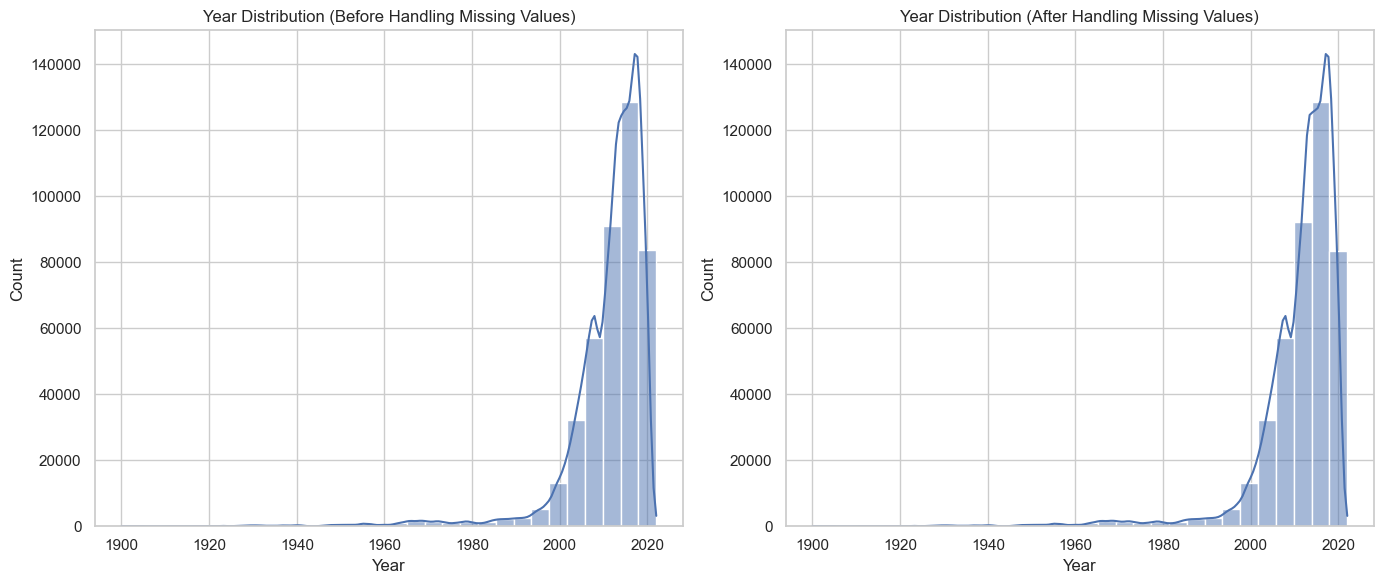

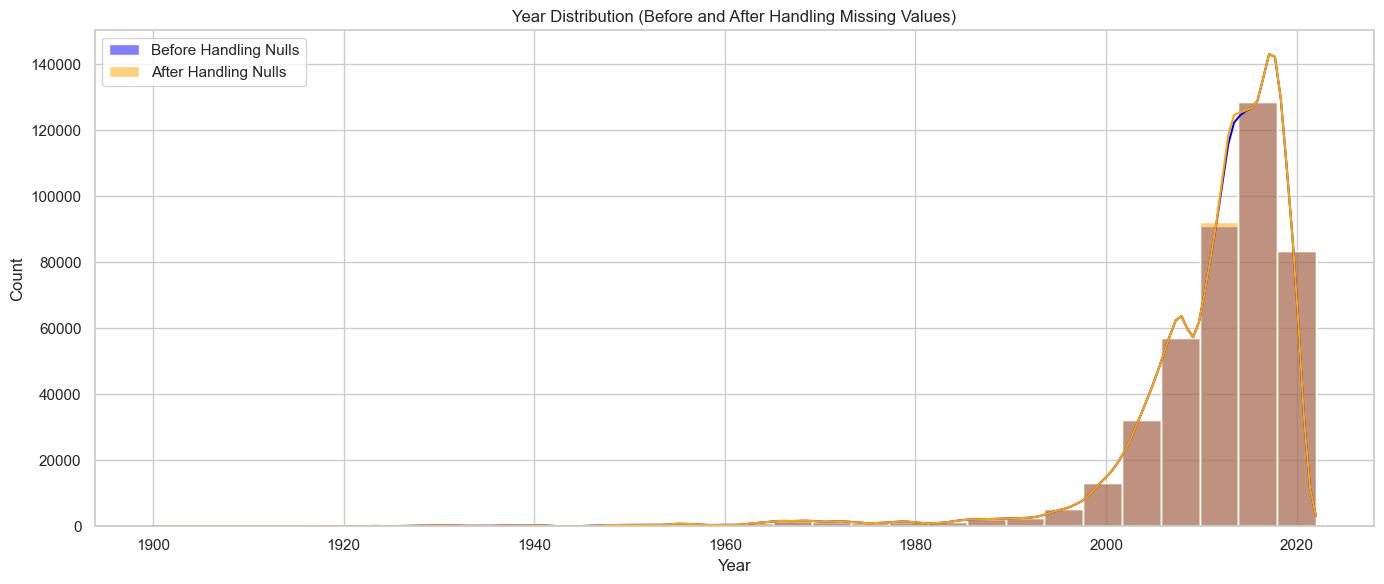

In [1599]:
# Plotting the 'year' column 

# Set up the matplotlib figure
plt.figure(figsize=(14, 6)) 

# Plot for 'year' before handling missing values 
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data=used_cars, x='year', bins=30, kde=True)  # Using histplot for 'year'
plt.title('Year Distribution (Before Handling Missing Values)')
plt.xlabel('Year')
plt.ylabel('Count')

# Plot for 'year' after handling missing values 
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data=used_cars_no_null, x='year', bins=30, kde=True)  # Using histplot for 'year'
plt.title('Year Distribution (After Handling Missing Values)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Set up the matplotlib figure for combined visualization
plt.figure(figsize=(14, 6))

# Plot for 'year' before handling missing values
sns.histplot(data=used_cars, x='year', bins=30, kde=True, color='blue', label='Before Handling Nulls', alpha=0.5)

# Plot for 'year' after handling missing values
sns.histplot(data=used_cars_no_null, x='year', bins=30, kde=True, color='orange', label='After Handling Nulls', alpha=0.5)

# Add titles and labels
plt.title('Year Distribution (Before and After Handling Missing Values)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()  # Add a legend to differentiate the plots

# Show the plot
plt.tight_layout()
plt.show()

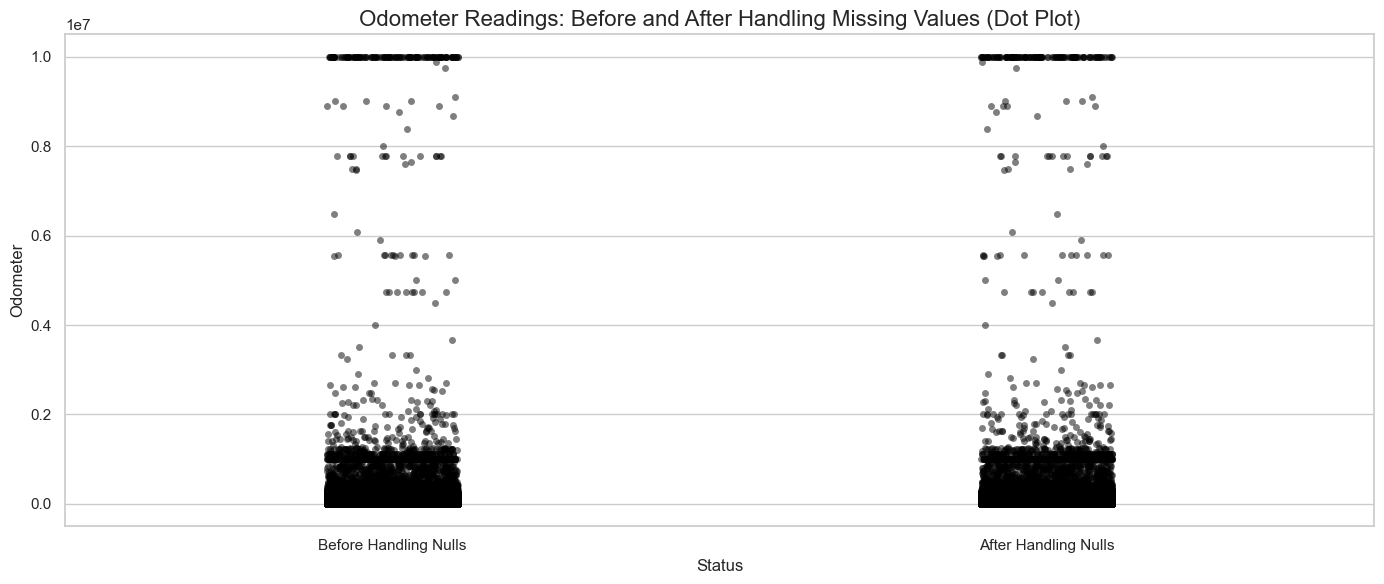

In [1601]:
# Plotting the 'odometer' column
# Create a DataFrame for both before and after handling missing values
used_cars['status'] = 'Before Handling Nulls'
used_cars_no_null['status'] = 'After Handling Nulls'
combined_data = pd.concat([used_cars[['odometer', 'status']], used_cars_no_null[['odometer', 'status']]], ignore_index=True)

# Set up the dot plot
plt.figure(figsize=(14, 6))
sns.stripplot(x='status', y='odometer', data=combined_data, jitter=True, color='black', alpha=0.5)

# Add titles and labels
plt.title('Odometer Readings: Before and After Handling Missing Values (Dot Plot)', fontsize=16)
plt.xlabel('Status')
plt.ylabel('Odometer')

# Show the plot
plt.tight_layout()
plt.show()

**Visualizing the distribution before and after handlling missing values for ordinal_columns = ['condition', 'title_status', 'cylinders']**

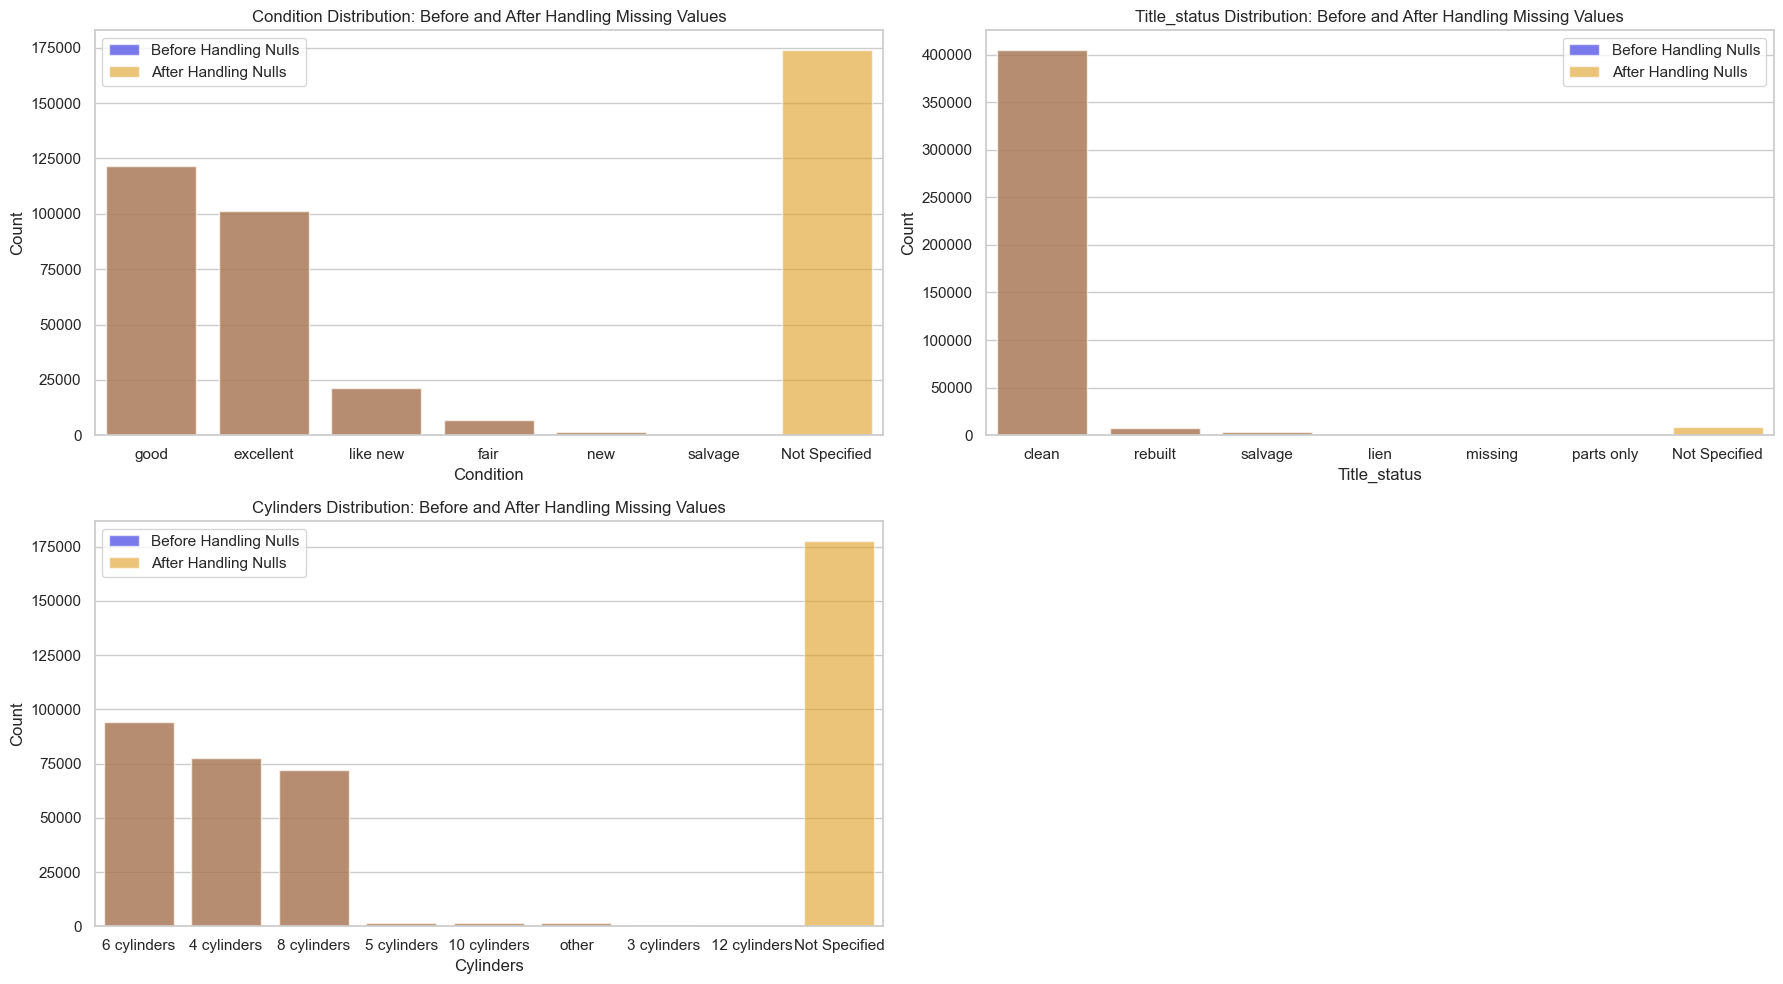

In [1603]:
# Set up the figure for the plots
plt.figure(figsize=(18, 10))

# Loop through each ordinal column to create count plots
for i, column in enumerate(ordinal_columns):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.countplot(data=used_cars, x=column, order=used_cars[column].value_counts().index, color='blue', alpha=0.6, label='Before Handling Nulls')
    sns.countplot(data=used_cars_no_null, x=column, order=used_cars_no_null[column].value_counts().index, color='orange', alpha=0.6, label='After Handling Nulls')
    
    plt.title(f'{column.capitalize()} Distribution: Before and After Handling Missing Values')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Condition:** 174,104 missing values, which is 40.79%  
**Cylinders:** 177,678 missing values, which is 41.62%  
Although they have many missing values, I decided not to drop them but to replace them, as these features are crucial for my analysis.

In [1605]:
# Finding unique values for each ordinal column
print('Unique condition values are:', used_cars_no_null['condition'].unique())
print('Unique cylinder values are:', used_cars_no_null['cylinders'].unique())
print('Unique title status values are:', used_cars_no_null['title_status'].unique())

Unique condition values are: ['Not Specified' 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
Unique cylinder values are: ['Not Specified' '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders'
 'other' '3 cylinders' '10 cylinders' '12 cylinders']
Unique title status values are: ['Not Specified' 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']


In [1607]:
# Define the mappings for ordinal features
condition_mapping = {
    'new': 6,
    'like new': 5,
    'excellent': 4,
    'good': 3,
    'fair': 2,
    'salvage': 1,
    'not specified': 0
}

cylinders_mapping = {
    '12 cylinders': 8,      
    '10 cylinders': 7,
    '8 cylinders': 6,
    '6 cylinders': 5,
    '5 cylinders': 4,
    '4 cylinders': 3,
    '3 cylinders': 2,
    'other': 1,
    'not specified': 0
}

title_status_mapping = {
    'clean': 6,
    'rebuilt': 5,
    'salvage': 4,
    'lien': 3,
    'parts only': 2,
    'not specified': 1,
    'missing': 0
}

# Clean the data: Convert to lowercase and strip leading/trailing spaces
used_cars_no_null['condition'] = used_cars_no_null['condition'].str.lower().str.strip()
used_cars_no_null['cylinders'] = used_cars_no_null['cylinders'].str.lower().str.strip()
used_cars_no_null['title_status'] = used_cars_no_null['title_status'].str.lower().str.strip()

# Replace values using the defined mappings
used_cars_no_null['condition'] = used_cars_no_null['condition'].map(condition_mapping)
used_cars_no_null['cylinders'] = used_cars_no_null['cylinders'].map(cylinders_mapping)
used_cars_no_null['title_status'] = used_cars_no_null['title_status'].map(title_status_mapping)

# Print the resulting DataFrame for verification
print(used_cars_no_null[['condition', 'cylinders', 'title_status']].head())
print(used_cars_no_null[['condition', 'cylinders', 'title_status']].isnull().sum())

   condition  cylinders  title_status
0          0          0             1
1          0          0             1
2          0          0             1
3          0          0             1
4          0          0             1
condition       0
cylinders       0
title_status    0
dtype: int64


**Handling outliers for numerical columns 'price', 'odometer' 'year'**

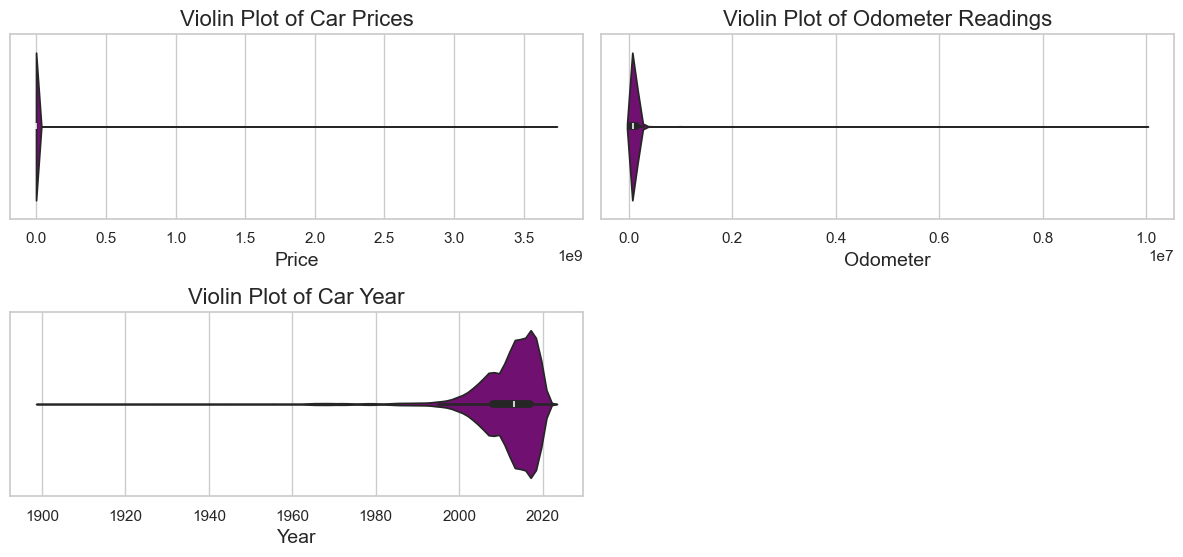

In [1609]:
# Set up the figure for each subplot
plt.figure(figsize=(12, 8))

# Violin plot for price
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, 1st subplot
sns.violinplot(x=used_cars_no_null['price'], color='purple')
plt.title('Violin Plot of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)

# Violin plot for odometer
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, 2nd subplot
sns.violinplot(x=used_cars_no_null['odometer'], color='purple')
plt.title('Violin Plot of Odometer Readings', fontsize=16)
plt.xlabel('Odometer', fontsize=14)

# Violin plot for year
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, 3rd subplot
sns.violinplot(x=used_cars_no_null['year'], color='purple')
plt.title('Violin Plot of Car Year', fontsize=16)
plt.xlabel('Year', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [1611]:
# Define a threshold of $500; you will not find a functional car below $501 at any dealer.
threshold = 501

# Count the number of entries with a price less than the threshold
count = (used_cars_no_null['price'] < threshold).sum()

# Count entries with a price of $0
close_to_zero_count = (used_cars_no_null['price'] < 0.01).sum()

# Print the results
print(f'Number of entries with a price of $0: {close_to_zero_count}')
print(f'Number of entries with a price less than ${threshold}: {count}')

Number of entries with a price of $0: 32895
Number of entries with a price less than $501: 43115


In [1613]:
# Drop entries with a price below the defined threshold
used_cars_no_null = used_cars_no_null[used_cars_no_null['price'] >= threshold]

In [1615]:
# Define a threshold for 5000 miles; anything below that is considered "new"
threshold = 5000

# Count the number of entries with an odometer reading less than the threshold
count = (used_cars_no_null['odometer'] < threshold).sum()

# Count entries with an odometer reading close to zero
close_to_zero_count = (used_cars_no_null['odometer'] < 0.01).sum()

# Print the results
print(f'Number of entries with an odometer reading of zero: {close_to_zero_count}')
print(f'Number of entries with an odometer reading less than {threshold} miles: {count}')

Number of entries with an odometer reading of zero: 1071
Number of entries with an odometer reading less than 5000 miles: 15306


In [1617]:
# Drop entries with an odometer reading below the threshold
used_cars_no_null = used_cars_no_null[used_cars_no_null['odometer'] >= threshold]

In [1619]:
# Calculate the Interquartile Range (IQR)

# Define a function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Identify outliers
    
    return lower_bound, upper_bound, outliers

# Define columns to check for outliers
columns_to_check = ['price', 'odometer', 'year']

# Initialize a dictionary to hold the outlier information
outlier_info = {}

# Detect outliers for each column
for column in columns_to_check:
    lower_bound, upper_bound, outliers = detect_outliers_iqr(used_cars_no_null, column)
    outlier_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }

# Combine outliers into a single DataFrame
combined_outliers = pd.concat([info['outliers'] for info in outlier_info.values() if not info['outliers'].empty], ignore_index=True).drop_duplicates()

# Print results
for column in columns_to_check:
    print(f"Number of outliers in {column}: {len(outlier_info[column]['outliers'])}")

print(f"Number of combined outliers: {len(combined_outliers)}")

Number of outliers in price: 7178
Number of outliers in odometer: 3775
Number of outliers in year: 13221
Number of combined outliers: 23259


In [1621]:
# Extract relevant details of outliers for analysis
outlier_details = combined_outliers[['year', 'price', 'odometer']]

# Display basic statistics of the outlier details
print(outlier_details.describe())

               year         price      odometer
count  23259.000000  2.325900e+04  2.325900e+04
mean    1992.832796  9.074552e+05  1.961502e+05
std       21.718773  4.774928e+07  7.238112e+05
min     1900.000000  5.150000e+02  5.000000e+03
25%     1978.000000  6.000000e+03  3.480250e+04
50%     1992.000000  1.500000e+04  7.775800e+04
75%     2016.000000  5.990000e+04  1.511850e+05
max     2022.000000  3.736929e+09  1.000000e+07


**The statistics indicate that:** there are some extremely high values in the price and odometer columns, as evidenced by the high mean and maximum values. This suggests that the outliers are significantly skewing the dataset. Instead of removing the outliers, I decided to replace them with the calculated outlier boundaries because these entries are significant. Additionally, removing them would not greatly impact the dataset, as the total number of outliers is 12,524, which is relatively small compared to the entire dataset.

In [1623]:
# Capping outliers for each column
for column in columns_to_check:
    lower_bound = outlier_info[column]['lower_bound']
    upper_bound = outlier_info[column]['upper_bound']
    
    used_cars_no_null[column] = np.where(used_cars_no_null[column] > upper_bound, upper_bound, used_cars_no_null[column])
    used_cars_no_null[column] = np.where(used_cars_no_null[column] < lower_bound, lower_bound, used_cars_no_null[column])

# Verify the changes
print("Statistics after capping:")
print(used_cars_no_null[['year', 'price', 'condition', 'title_status', 'odometer', 'cylinders']].describe())

Statistics after capping:
                year          price      condition   title_status  \
count  368459.000000  368459.000000  368459.000000  368459.000000   
mean     2011.671181   18687.941038       2.192556       5.852054   
std         6.305021   13371.630922       1.800805       0.755828   
min      1994.500000     501.000000       0.000000       0.000000   
25%      2008.000000    7800.000000       0.000000       6.000000   
50%      2013.000000   15590.000000       3.000000       6.000000   
75%      2017.000000   27343.000000       4.000000       6.000000   
max      2022.000000   56657.500000       6.000000       6.000000   

            odometer      cylinders  
count  368459.000000  368459.000000  
mean    96784.630586       2.778154  
std     61932.193153       2.470221  
min      5000.000000       0.000000  
25%     43242.000000       0.000000  
50%     91000.000000       3.000000  
75%    138000.000000       5.000000  
max    280137.000000       8.000000  


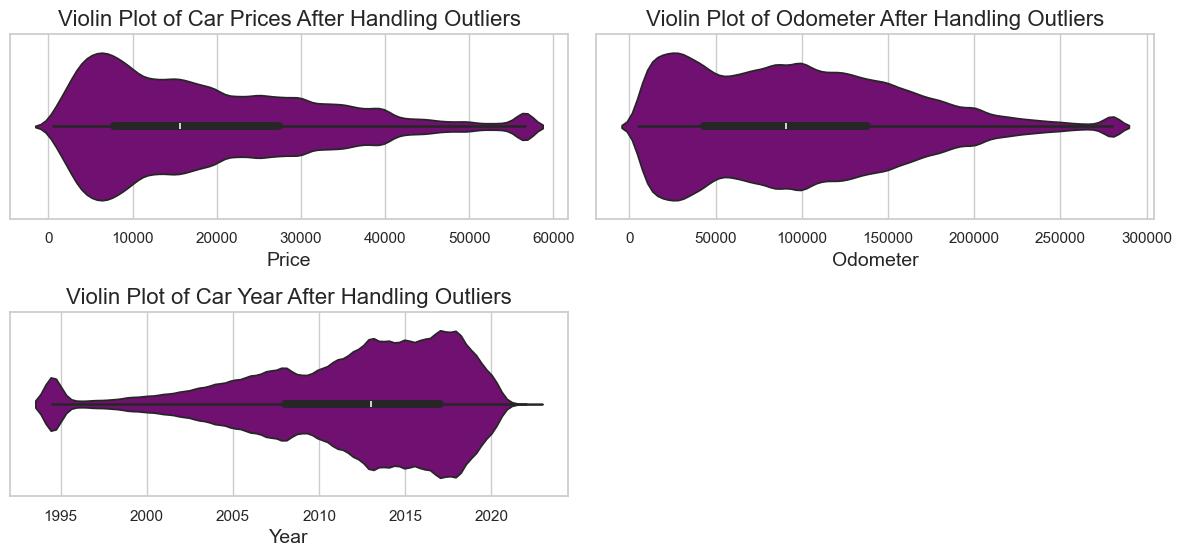

In [1625]:
# Visualizing the change
# Set up the figure for each subplot
plt.figure(figsize=(12, 8))

# Violin plot for price after handling outliers 
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, 1st subplot
sns.violinplot(x=used_cars_no_null['price'], color='purple')
plt.title('Violin Plot of Car Prices After Handling Outliers', fontsize=16)
plt.xlabel('Price', fontsize=14)

# Violin plot for odometer after handling outliers
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, 2nd subplot
sns.violinplot(x=used_cars_no_null['odometer'], color='purple')
plt.title('Violin Plot of Odometer After Handling Outliers', fontsize=16)
plt.xlabel('Odometer', fontsize=14)

# Violin plot for year after handling outliers
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, 3rd subplot
sns.violinplot(x=used_cars_no_null['year'], color='purple')
plt.title('Violin Plot of Car Year After Handling Outliers', fontsize=16)
plt.xlabel('Year', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

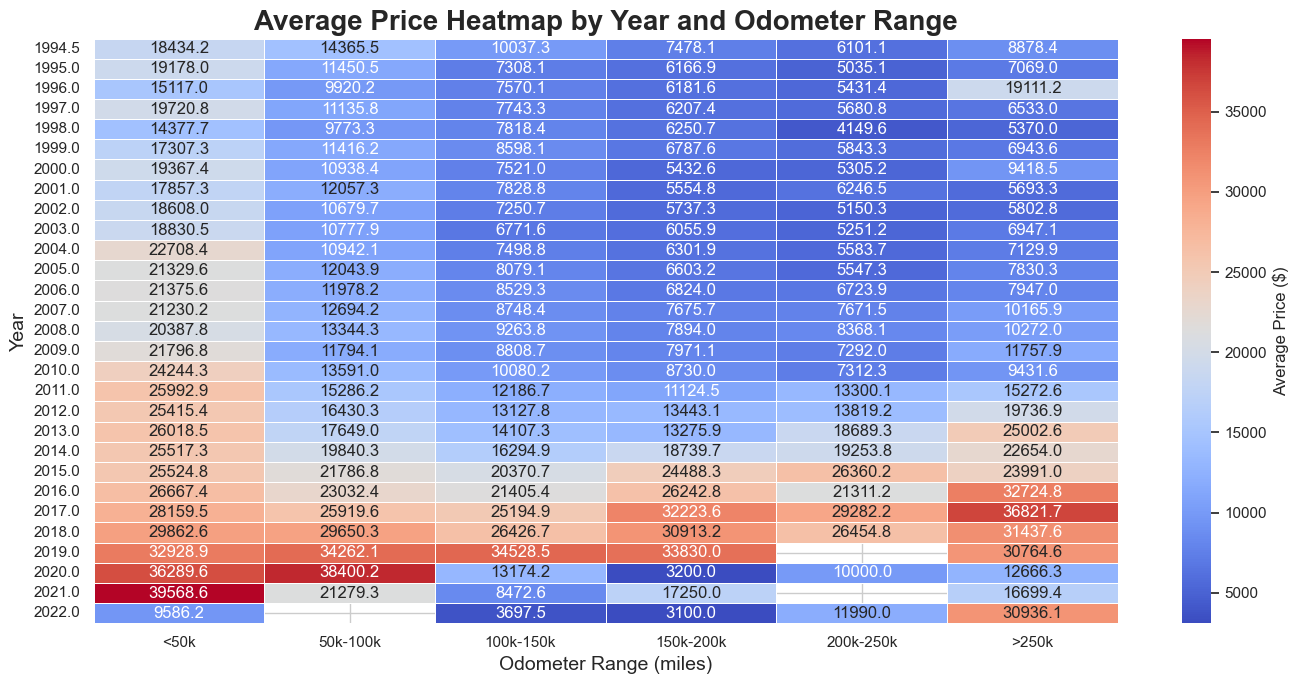

In [1627]:
# Average Price Heatmap by Year and Odometer Range
# Create mileage ranges
used_cars_no_null['odometer_range'] = pd.cut(
    used_cars_no_null['odometer'],
    bins=[0, 50000, 100000, 150000, 200000, 250000, np.inf],
    labels=['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '>250k'],
    right=False  # This means the intervals will be left-inclusive
)

# Create a pivot table for heatmap data
heatmap_data = used_cars_no_null.pivot_table(
    values='price',
    index='year',
    columns='odometer_range', 
    aggfunc='mean', 
    observed=True  # Set observed=True or False as needed
)

# Create the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Average Price ($)'})

# Improve aesthetics
plt.title('Average Price Heatmap by Year and Odometer Range', fontsize=20, weight='bold')
plt.xlabel('Odometer Range (miles)', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

**From the heatmap**, I notice multiple inconsistencies in the 2022 data—such as significant outliers and unrealistic values. It might be wise to drop the entire year from my analysis to ensure that my dataset reflects more reliable and valid data points.

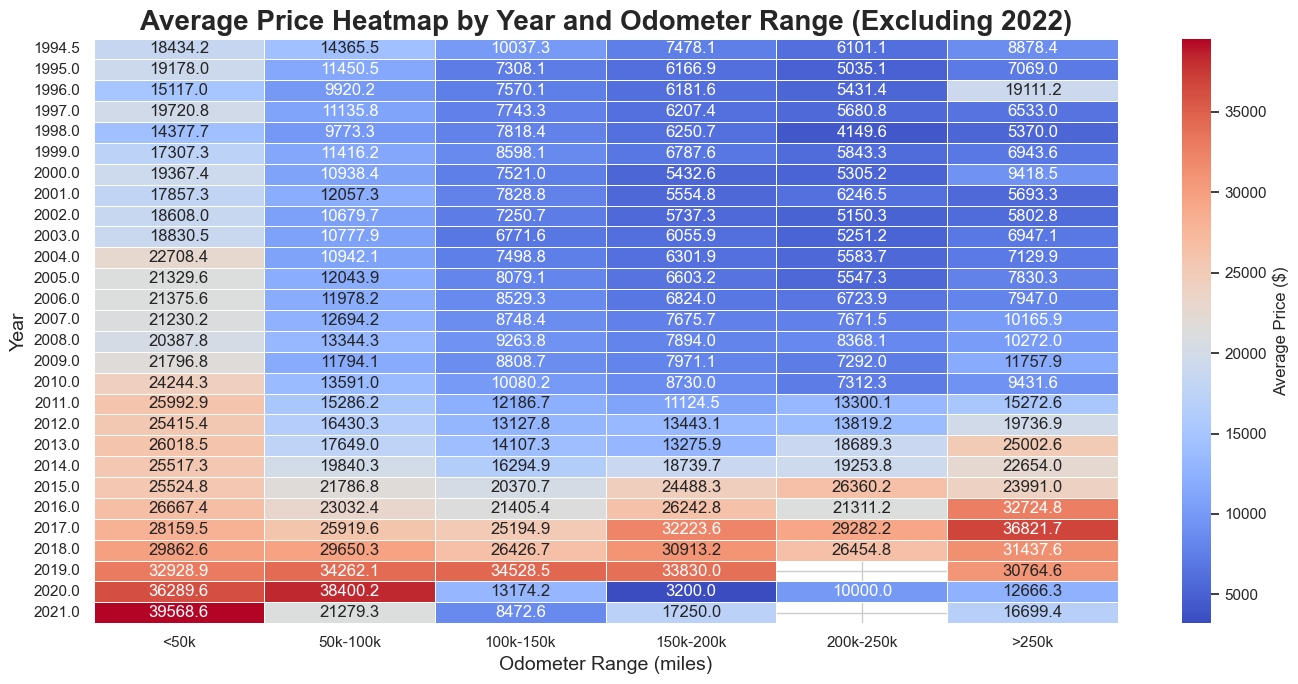

In [1644]:
# Drop the rows corresponding to the year 2022 to eliminate potential outliers or unrealistic values
used_cars_no_null = used_cars_no_null[used_cars_no_null['year'] != 2022]

# Create a pivot table for the heatmap, calculating the mean price for each year and odometer range
heatmap_data = used_cars_no_null.pivot_table(values='price', index='year', columns='odometer_range', 
                                              aggfunc='mean', observed=True)

# Set up the figure for the heatmap
plt.figure(figsize=(14, 7))

# Create the heatmap using seaborn, with annotations for clarity
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Average Price ($)'})

# Improve aesthetics with a title and axis labels
plt.title('Average Price Heatmap by Year and Odometer Range (Excluding 2022)', fontsize=20, weight='bold')
plt.xlabel('Odometer Range (miles)', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Adjust layout for better visualization
plt.tight_layout()

# Display the heatmap
plt.show()

Correlation Matrix:
                    id     price      year  condition  cylinders  odometer  \
id            1.000000 -0.072905 -0.086129   0.016534   0.042887  0.053694   
price        -0.072905  1.000000  0.547060  -0.082202   0.000651 -0.544903   
year         -0.086129  0.547060  1.000000  -0.062551  -0.183353 -0.557909   
condition     0.016534 -0.082202 -0.062551   1.000000   0.329297 -0.024961   
cylinders     0.042887  0.000651 -0.183353   0.329297   1.000000  0.119958   
odometer      0.053694 -0.544903 -0.557909  -0.024961   0.119958  1.000000   
title_status  0.017246  0.058774  0.012431  -0.043448  -0.051944 -0.003391   

              title_status  
id                0.017246  
price             0.058774  
year              0.012431  
condition        -0.043448  
cylinders        -0.051944  
odometer         -0.003391  
title_status      1.000000  


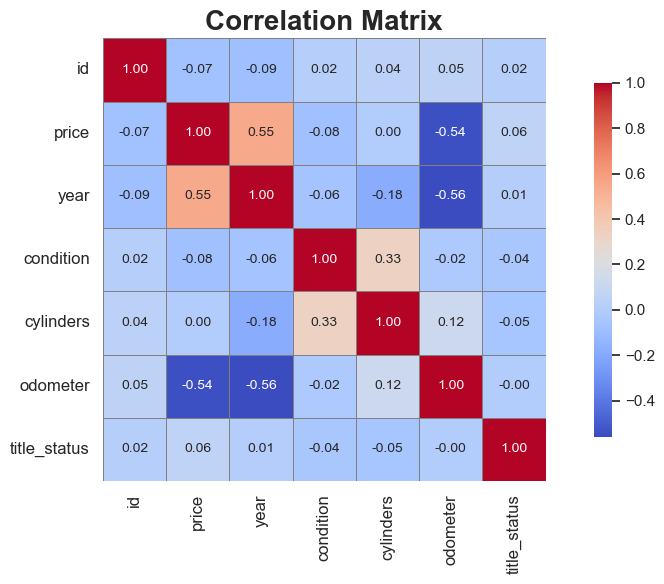

In [1646]:
# Correlation matrix

# Identify numeric columns in the DataFrame for correlation analysis
numeric_columns = used_cars_no_null.select_dtypes(include=['number']).columns

# Compute the correlation matrix for the identified numeric columns
correlation_matrix = used_cars_no_null[numeric_columns].corr()

# Print the resulting correlation matrix to the console for inspection
print("Correlation Matrix:")
print(correlation_matrix)

# Set the style for seaborn visualizations
sns.set(style='whitegrid')

# Set up the figure for the heatmap visualization
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn to visualize the correlation matrix
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation coefficients on the heatmap
    fmt=".2f",  # Format for the annotation text
    cmap='coolwarm',  # Color map for the heatmap
    square=True,  # Make cells square-shaped
    cbar_kws={"shrink": .8},  # Adjust color bar size
    linewidths=0.5,  # Add lines between cells for clarity
    linecolor='gray',  # Color of the lines between cells
    annot_kws={"size": 10},  # Font size for the annotations
)

# Add a title and set font sizes for x and y ticks
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the heatmap
plt.show()

### Observations from the Correlation Matrix:

• **Price and Year:**  
There is a positive correlation (**0.55**) between price and year, suggesting that newer cars tend to have higher prices.

• **Price and Odometer:**  
The negative correlation (**-0.54**) between price and odometer indicates that cars with higher mileage generally have lower prices, which aligns with typical market behavior.

• **Year and Odometer:**  
The negative correlation (**-0.56**) between year and odometer suggests that newer cars have lower mileage, which is also expected.

• **Condition and Cylinders:**  
The positive correlation (**0.33**) between condition and cylinders might imply that cars with more cylinders tend to be in better condition. However, since condition is categorical, this relationship may require further investigation (e.g., analyzing mean price by condition and cylinders).

• **Price and Condition:**  
The correlation coefficient of **-0.08** indicates a very weak negative correlation, suggesting that condition may not have a strong linear relationship with price in this dataset.

• **Title Status and Other Variables:**  
The correlation coefficients between title status and other variables are relatively low, indicating that title status does not have a strong linear relationship with the other attributes.

• **Overall:**  
The matrix shows that price is primarily influenced by year and odometer, which makes sense in the context of the used car market.

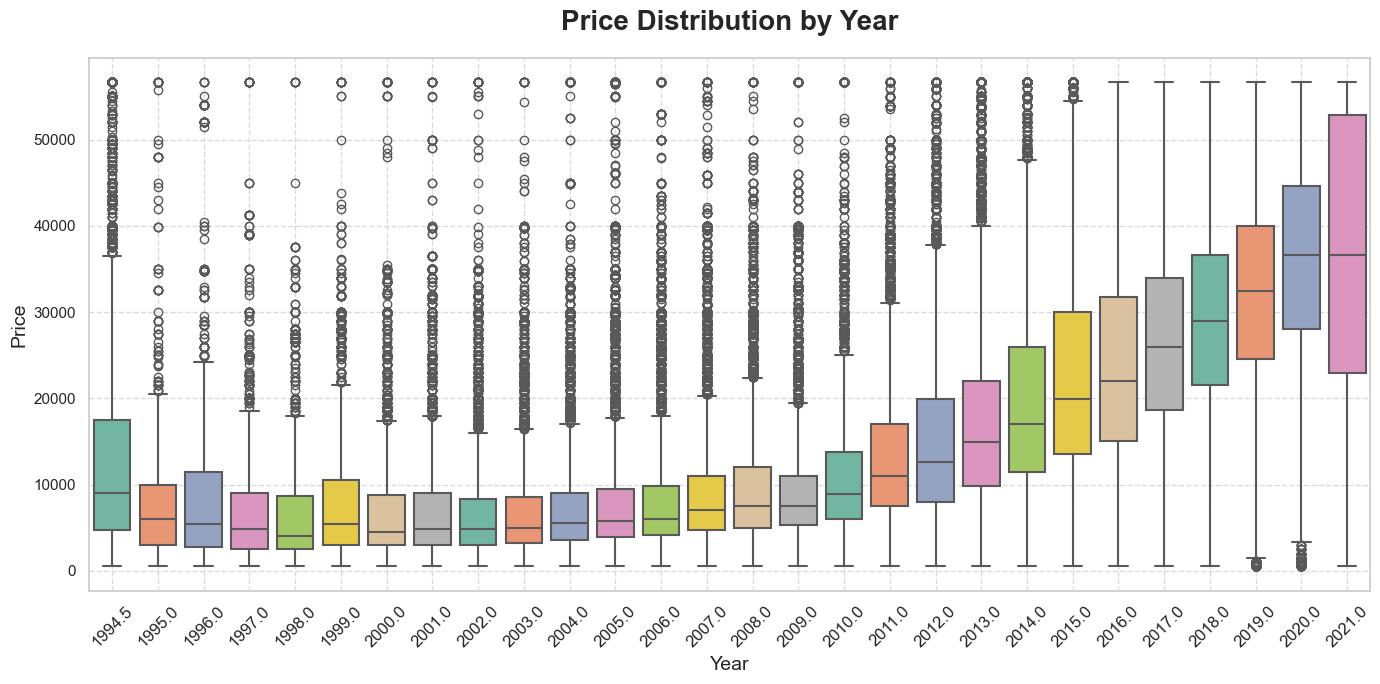

In [1651]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create the box plot to visualize price distribution by year
plt.figure(figsize=(14, 7))  # Set figure size
box_plot = sns.boxplot(
    data=used_cars_no_null, 
    x='year', 
    y='price', 
    hue='year',  # Color by year
    palette='Set2',  # Color palette
    linewidth=1.5,  # Line width of box edges
    legend=False  # Disable legend for clarity
)

# Improve aesthetics
plt.title('Price Distribution by Year', fontsize=20, weight='bold', pad=20)  # Title with padding
plt.xlabel('Year', fontsize=14)  # X-axis label
plt.ylabel('Price', fontsize=14)  # Y-axis label
plt.xticks(rotation=45, fontsize=12)  # Rotate x-ticks for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

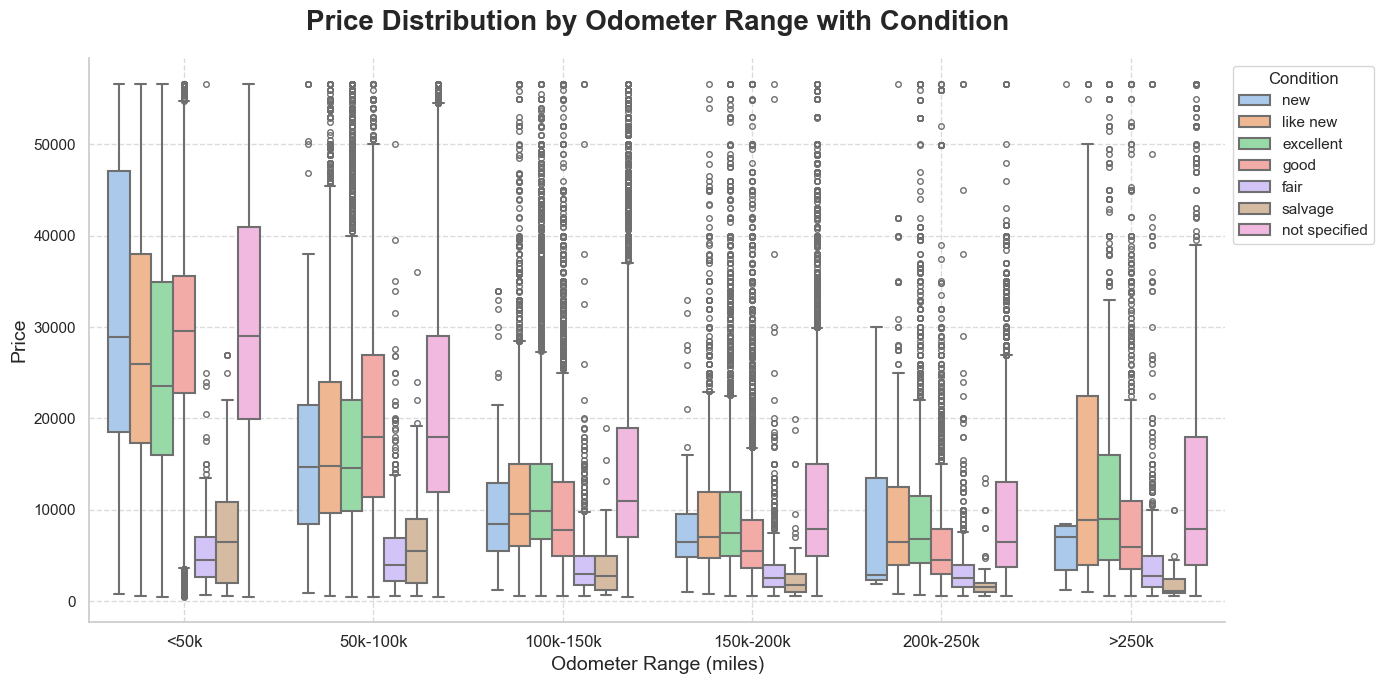

In [1653]:
# Reverse mapping for legend labels
legend_mapping = {v: k for k, v in condition_mapping.items()}  # Create a mapping from integers back to labels

# Map the condition integers back to descriptive labels for the legend
used_cars_no_null['condition_label'] = used_cars_no_null['condition'].map(legend_mapping)

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a figure for the box plot
plt.figure(figsize=(14, 7))

# Create the box plot with hue for condition
box_plot = sns.boxplot(
    data=used_cars_no_null, 
    x='odometer_range',  # X-axis for odometer range
    y='price',  # Y-axis for price
    hue='condition_label',  # Color by condition
    palette='pastel',  # Color palette
    linewidth=1.5,  # Width of box edges
    fliersize=4,  # Size of outlier markers
    hue_order=['new', 'like new', 'excellent', 'good', 'fair', 'salvage', 'not specified']  # Order of conditions
)

# Improve aesthetics
plt.title('Price Distribution by Odometer Range with Condition', fontsize=20, weight='bold', pad=20)  # Title with padding
plt.xlabel('Odometer Range (miles)', fontsize=14)  # X-axis label
plt.ylabel('Price', fontsize=14)  # Y-axis label
plt.xticks(rotation=0, fontsize=12)  # X-tick formatting
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines

# Customize the legend
plt.legend(title='Condition', loc='upper left', bbox_to_anchor=(1, 1))  # Position legend outside the plot

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

**Let's explore the ordinal columns ['condition', 'title_status', 'cylinders']**

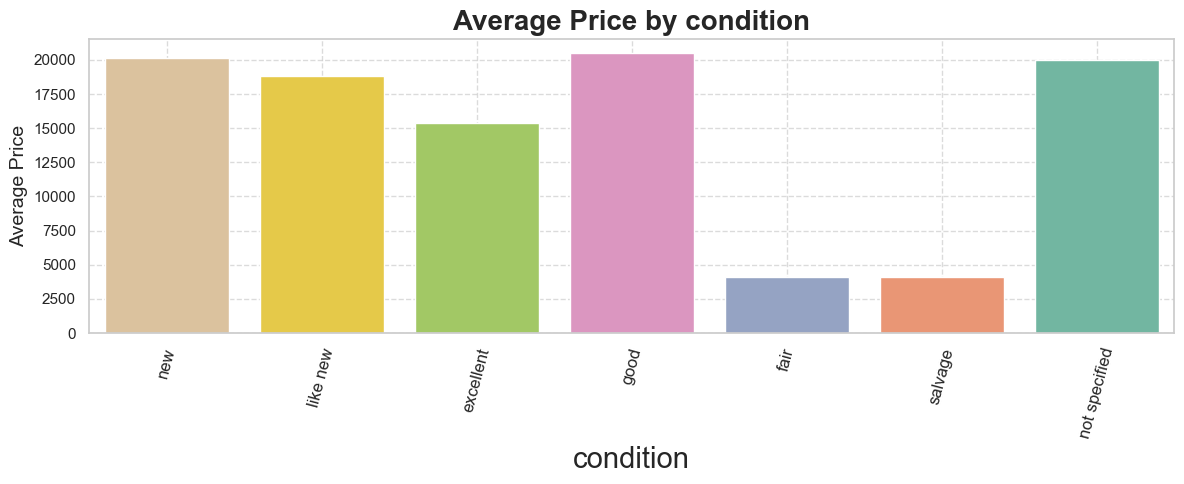

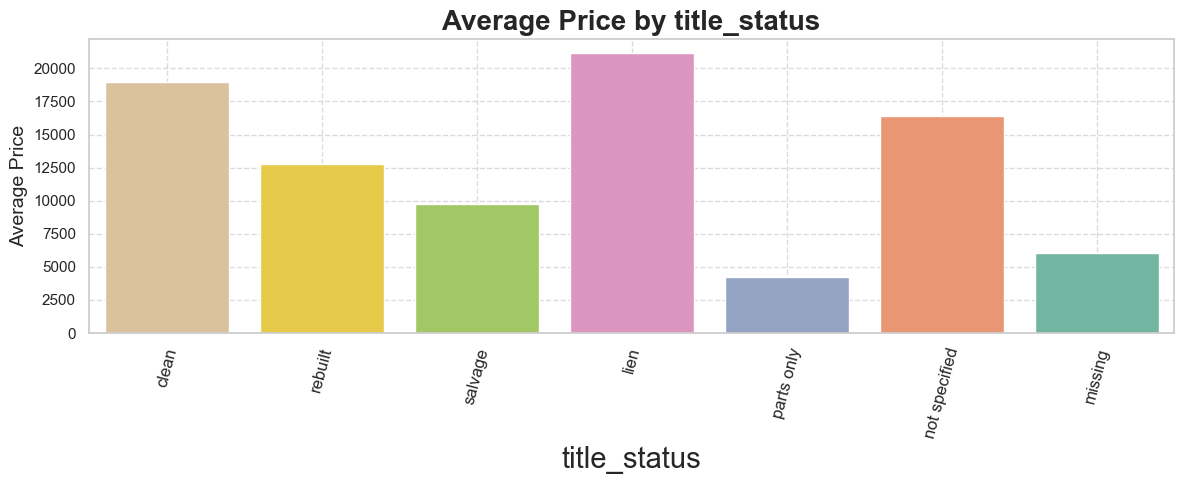

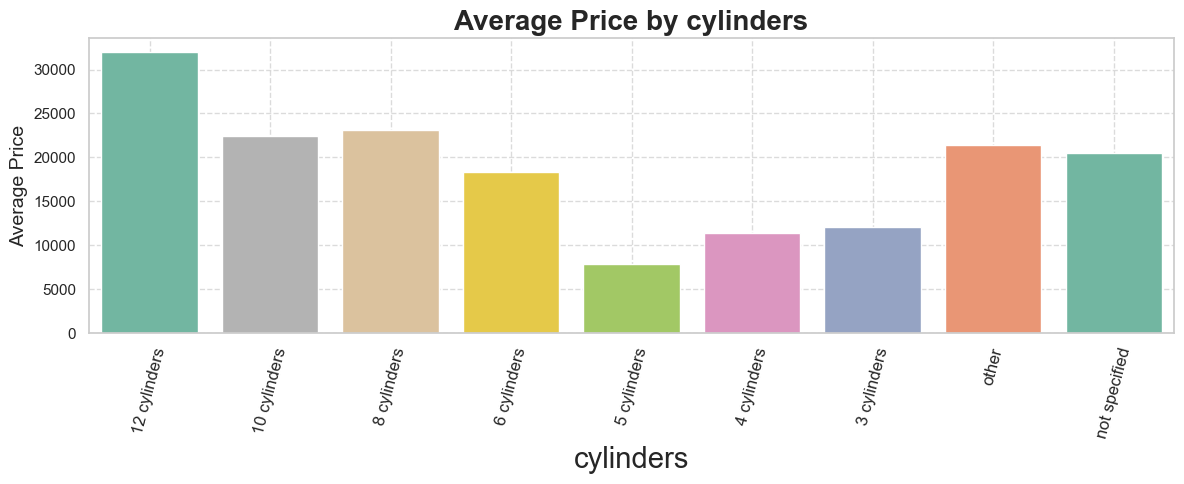

In [1658]:
# Define the mappings (condition_mapping, title_status_mapping, cylinders_mapping) above

# Set the style for seaborn
sns.set(style='whitegrid')

# Create bar plots for average price by each ordinal feature
for column in ordinal_columns:
    # Calculate average price by the ordinal feature
    avg_price = used_cars_no_null.groupby(column)['price'].mean().reset_index()
    avg_price.columns = [column, 'average_price']
    
    # Map the values back to descriptive labels for each feature
    if column == 'condition':
        # Reverse mapping for legend labels
        condition_legend_mapping = {v: k for k, v in condition_mapping.items()}   
        avg_price['condition_label'] = avg_price[column].map(condition_legend_mapping)
        xlabel = 'condition_label'
        label_order = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage', 'not specified']

    elif column == 'cylinders':
        cylinders_legend_mapping = {v: k for k, v in cylinders_mapping.items()}
        avg_price['cylinders_label'] = avg_price[column].map(cylinders_legend_mapping)
        xlabel = 'cylinders_label'
        label_order = ['12 cylinders', '10 cylinders', '8 cylinders', '6 cylinders', 
                       '5 cylinders', '4 cylinders', '3 cylinders', 'other', 'not specified']
    
    elif column == 'title_status':
        title_status_legend_mapping = {v: k for k, v in title_status_mapping.items()}
        avg_price['title_status_label'] = avg_price[column].map(title_status_legend_mapping)
        xlabel = 'title_status_label'
        label_order = ['clean', 'rebuilt', 'salvage', 'lien', 'parts only', 'not specified', 'missing']
        
    # Create the bar plot
    plt.figure(figsize=(12, 5))
    
    # Display title for the plot with larger font
    display(HTML(f"<div style='font-size: 20px;'>Plot for {column} feature</div>"))
    display(HTML(f"<div style='font-size: 20px;'>******************************************************************************</div>"))

    # Create the bar plot
    bar_plot = sns.barplot(data=avg_price, x=xlabel, y='average_price',  
                           hue=xlabel,  # Use hue for coloring
                           order=label_order, 
                           palette='Set2',
                           legend=False)  # Disable legend as hue is used for bars
    
    # Improve aesthetics
    plt.title(f'Average Price by {column}', fontsize=20, weight='bold')
    plt.xticks(rotation=75, fontsize=12)
    plt.xlabel(column, fontsize=21)
    plt.ylabel('Average Price', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability

    plt.tight_layout()  # Adjust layout to fit elements
    plt.show()  # Display the plot

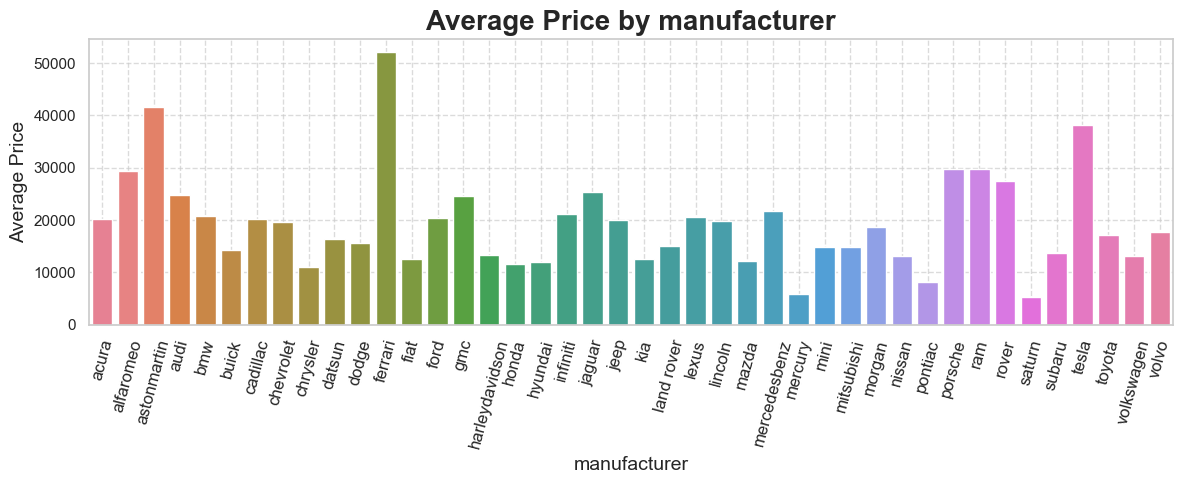

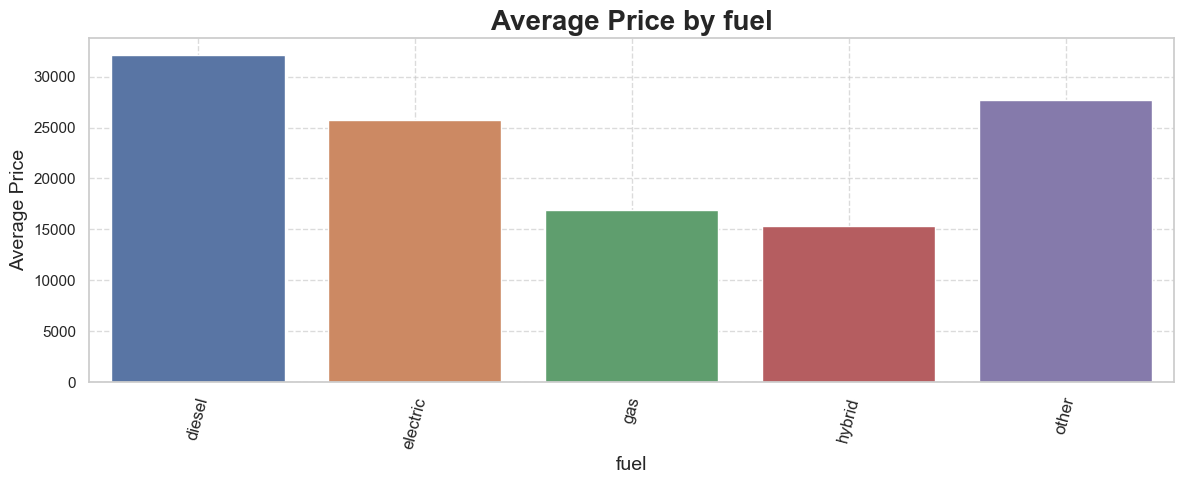

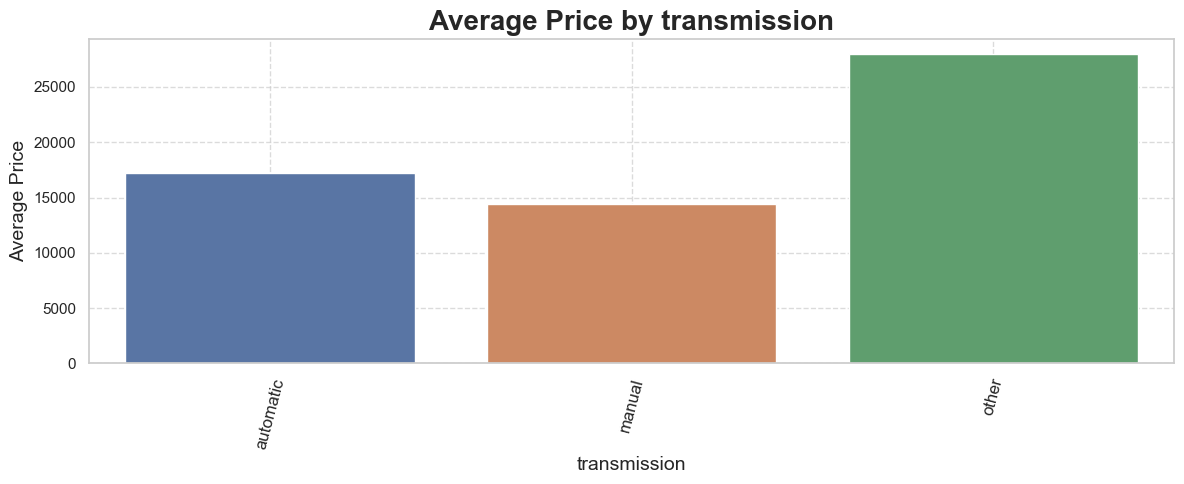

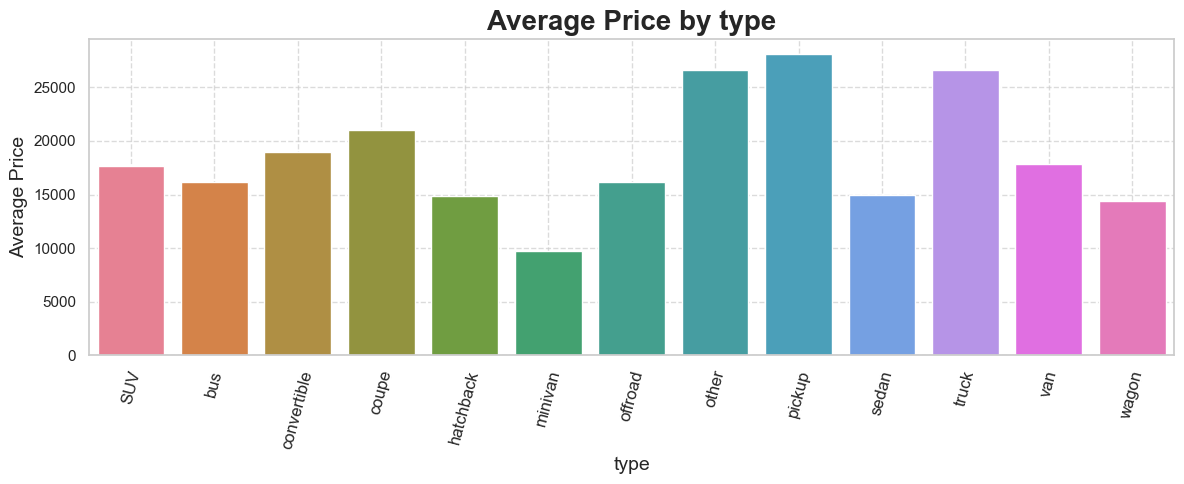

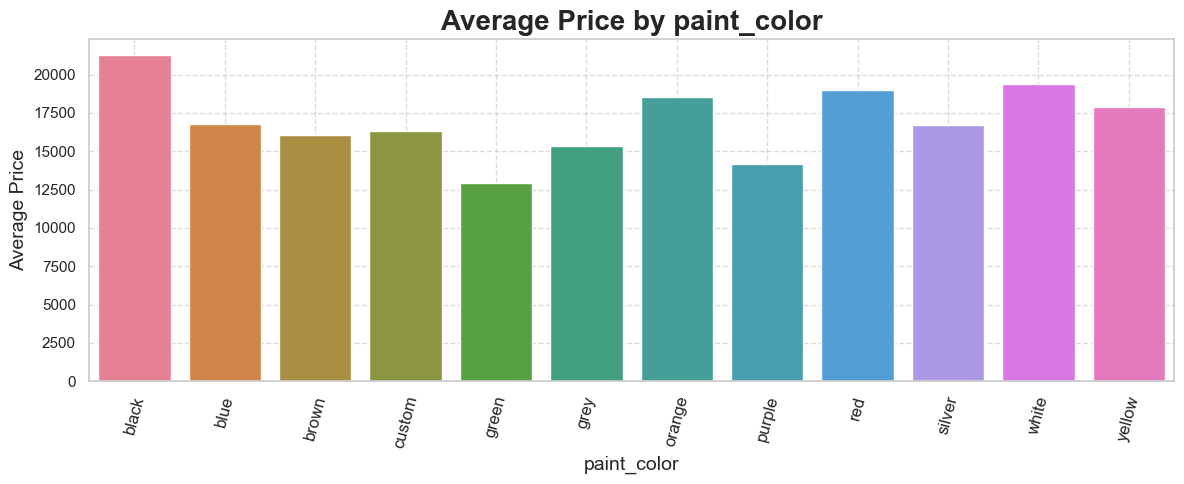

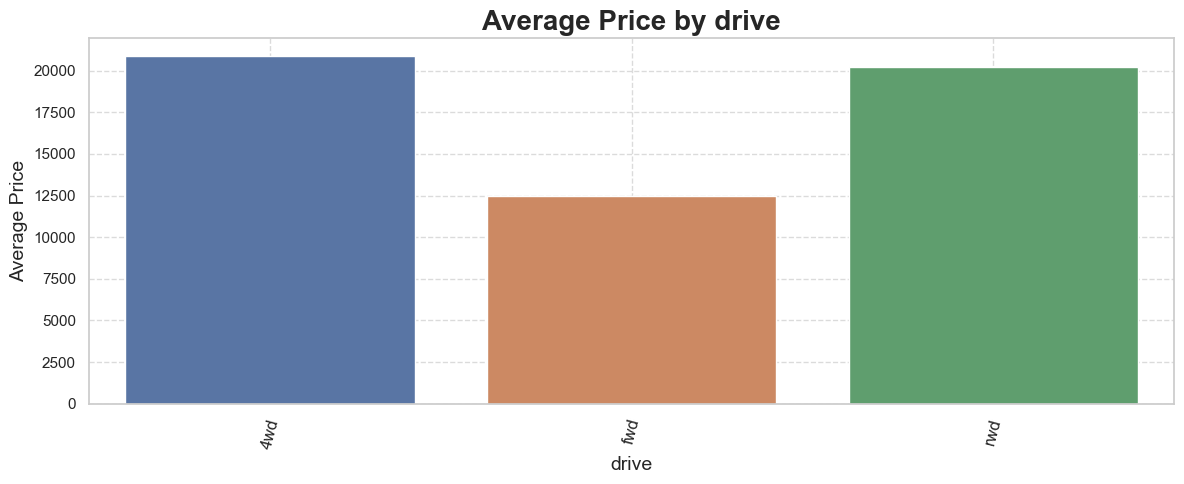

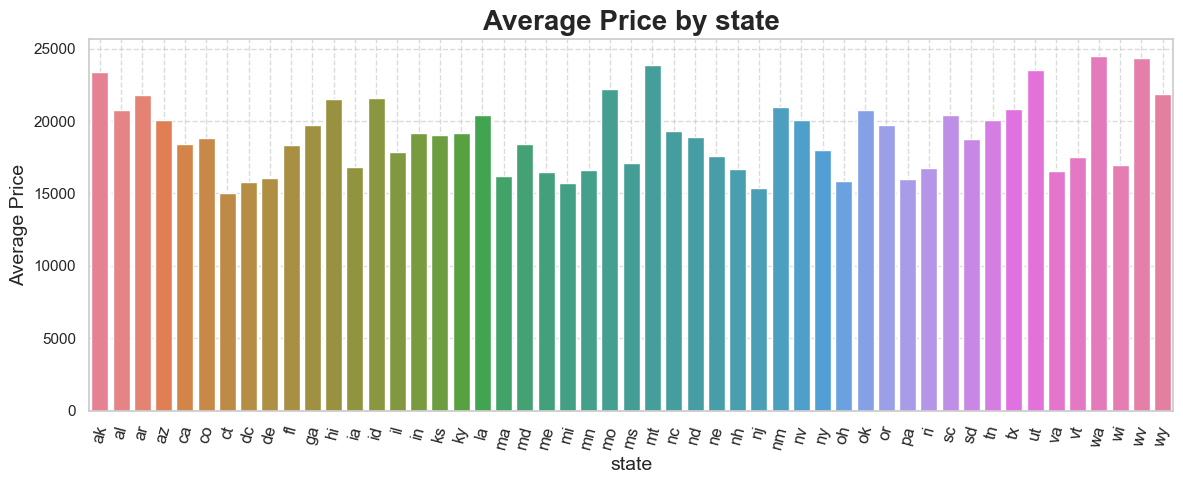

In [1660]:
# Create bar plots for average price by each nominal feature 
# except model, region, and VIN, which contain many unique values, 
# making them cumbersome to interpret.

# Exclude 'model', 'region', and 'VIN' from the nominal_columns
nominal_columns_filtered = ['manufacturer', 'fuel', 'transmission', 'type', 'paint_color', 'drive', 'state']

# Set the style for seaborn
sns.set(style='whitegrid')

# Create bar plots for average price by each nominal feature
for column in nominal_columns_filtered:
    # Calculate average price by the nominal feature
    avg_price = used_cars_no_null.groupby(column)['price'].mean().reset_index()
    avg_price.columns = [column, 'average_price']
    
    # Create the bar plot
    plt.figure(figsize=(12, 5))
    
    # Display title for the plot with larger font
    display(HTML(f"<div style='font-size: 20px;'>Plot for {column} feature</div>"))
    display(HTML(f"<div style='font-size: 20px;'>******************************************************************************</div>"))
    
    # Create the bar plot
    sns.barplot(data=avg_price, x=column, y='average_price', 
                estimator='mean', hue=column, errorbar=None, legend=False)  # Use mean price with no error bars
    
    # Improve aesthetics
    plt.title(f'Average Price by {column}', fontsize=20, weight='bold')
    plt.xticks(rotation=75, fontsize=12)  # Rotate x-axis labels for better visibility
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Average Price', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.tight_layout()  # Adjust layout to fit elements
    plt.show()  # Display the plot

In [1662]:
# Calculate the market share for the top five paint colors

# Count the number of vehicles for each paint color
paint_color_counts = used_cars_no_null['paint_color'].value_counts()

# Determine the total number of vehicles in the dataset
total_count = used_cars_no_null.shape[0]

# Calculate the market share percentages for the top five paint colors
top_five_market_share = (paint_color_counts.head(5) / total_count) * 100

# Output the market share results for the top five paint colors
print("Market Share for the Top Five Paint Colors:")
print(top_five_market_share)

Market Share for the Top Five Paint Colors:
paint_color
white     47.384934
black     15.035474
silver    10.468133
blue       7.599568
red        7.390037
Name: count, dtype: float64


In [1664]:
# Calculate the market share percentage for the top three manufacturers

# Count the number of vehicles for each manufacturer
manufacturer_counts = used_cars_no_null['manufacturer'].value_counts()

# Determine the total number of vehicles in the dataset
total_count = used_cars_no_null.shape[0]

# Calculate the market share percentages for the top three manufacturers
top_three_market_share = (manufacturer_counts.head(3) / total_count) * 100

# Output the market share results for the top three manufacturers
print("Market Share for the Top Three Manufacturers:")
print(top_three_market_share)

Market Share for the Top Three Manufacturers:
manufacturer
ford         20.369828
chevrolet    12.838927
toyota        8.143480
Name: count, dtype: float64


In [1666]:
# Descriptive Statistics for Fuel Type
# Calculate summary statistics (mean, median, standard deviation) of prices grouped by fuel type
model_price_stats = used_cars_no_null.groupby('fuel')['price'].agg(['mean', 'median', 'std']).reset_index()

# Sort the summary statistics by the mean price in ascending order
model_price_stats_sorted = model_price_stats.sort_values(by='mean')

# Display the sorted statistics
model_price_stats_sorted

fuel          mean   median           std
3    hybrid  15388.959512  12995.0  10230.522253
2       gas  16872.776215  13900.0  12248.600732
1  electric  25736.246086  25990.0  14195.503245
4     other  27657.967179  27590.0  11645.128986
0    diesel  32138.178051  31995.0  16776.360743

In [1668]:
# Descriptive Statistics for Drive Type
# Calculate summary statistics (mean, median, standard deviation) of prices grouped by drive type
model_price_stats = used_cars_no_null.groupby('drive')['price'].agg(['mean', 'median', 'std']).reset_index()

# Sort the summary statistics by the mean price in ascending order
model_price_stats_sorted = model_price_stats.sort_values(by='mean')

# Display the sorted statistics
model_price_stats_sorted

drive          mean   median           std
1   fwd  12455.914015  10393.0   8427.540484
2   rwd  20228.371843  18500.0  12897.224200
0   4wd  20891.429158  17995.0  14300.017907

In [1316]:
# Count the number of unique models in the dataset
# Due to the high cardinality with 25,663 unique models, deriving meaningful insights directly from this feature is challenging
unique_models_count = used_cars_no_null['model'].nunique()

# Print the total number of unique models
print(f'Total unique models: {unique_models_count}')

Total unique models: 25663


In [1670]:
# Count Normalization: To show the number of values per feature along with their average prices.
# This normalization helps to understand the availability of cars relative to their average price.

'''
Higher Normalized Count: Indicates more cars available for each dollar of average price, suggesting relative affordability.
Lower Normalized Count: Indicates fewer cars for each dollar of average price, implying higher prices or lower availability.
'''

# Initialize an empty DataFrame to store results
count_normalization = pd.DataFrame()

# Loop through each unique manufacturer to calculate count normalization
for manufacturer in used_cars_no_null['manufacturer'].unique():
    # Filter the DataFrame for the current manufacturer
    manufacturer_data = used_cars_no_null[used_cars_no_null['manufacturer'] == manufacturer]
    
    # Calculate average price and count
    avg_price_count = manufacturer_data.groupby('manufacturer')['price'].agg(['mean', 'count']).reset_index()
    avg_price_count.columns = ['manufacturer', 'average_price', 'count']
    
    # Convert average_price to float for calculations
    avg_price_count['average_price'] = avg_price_count['average_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

    # Calculate normalized count: Number of cars per dollar of average price
    avg_price_count['normalized_count'] = avg_price_count['count'] / avg_price_count['average_price']
    
    # Format normalized_count to five decimal places for readability
    avg_price_count['normalized_count'] = avg_price_count['normalized_count'].astype(float).map(lambda x: f"{x:.5f}")
    
    # Add the results to the main DataFrame
    count_normalization = pd.concat([count_normalization, avg_price_count], ignore_index=True)
    
# Sort the DataFrame by normalized_count in descending order
count_normalization['normalized_count'] = count_normalization['normalized_count'].astype(float)  # Convert to float for sorting
count_normalization = count_normalization.sort_values(by='normalized_count', ascending=False)

# Format normalized_count back to five decimal places for display
count_normalization['normalized_count'] = count_normalization['normalized_count'].map(lambda x: f"{x:.5f}")

# Display the Count Normalization DataFrame
print("Count Normalization DataFrame with Normalized Count in Five Decimals (Sorted Descending):")
count_normalization.head()

Count Normalization DataFrame with Normalized Count in Five Decimals (Sorted Descending):


manufacturer  average_price  count normalized_count
0         ford   20318.934265  75051          3.69365
2    chevrolet   19551.018497  47304          2.41952
3       toyota   17123.148664  30004          1.75225
8        honda   11570.912356  18849          1.62900
5       nissan   13192.293060  16355          1.23974

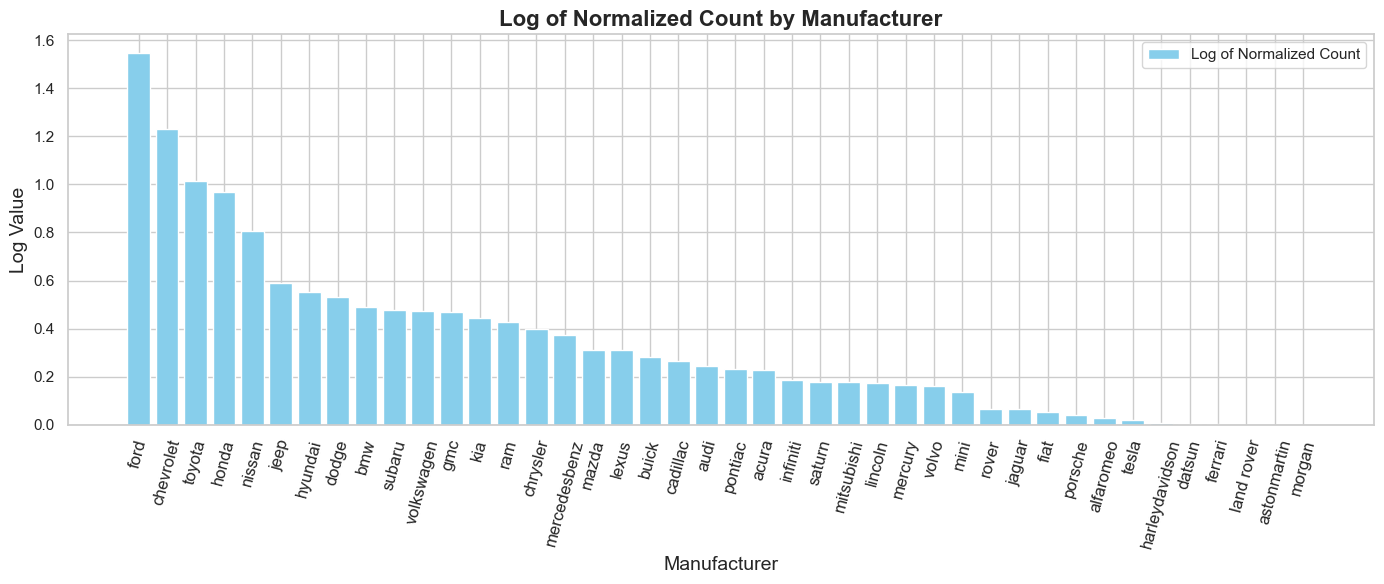

In [1672]:
# Calculate the log of normalized count for better visualization of data distribution
count_normalization['log_normalized_count'] = np.log1p(count_normalization['normalized_count'].astype(float))

# Set up the figure for plotting
plt.figure(figsize=(14, 6))

# Create a bar plot for the log of normalized counts
plt.bar(count_normalization['manufacturer'], count_normalization['log_normalized_count'], color='skyblue', label='Log of Normalized Count')

# Configure plot settings for better readability
plt.xlabel('Manufacturer', fontsize=14)  # Label for the x-axis
plt.ylabel('Log Value', fontsize=14)     # Label for the y-axis
plt.title('Log of Normalized Count by Manufacturer', fontsize=16, weight='bold')  # Title of the plot
plt.xticks(rotation=75, fontsize=12)     # Rotate x-axis labels for better visibility
plt.legend()                               # Display legend
plt.tight_layout()                         # Adjust layout to fit labels
plt.show()                                 # Display the plot

In [1485]:
# Normalize counts directly by vehicle paint color 

# Initialize an empty DataFrame to store results
count_normalization = pd.DataFrame()

# Loop through each unique paint color to calculate count normalization
for paint_color in used_cars_no_null['paint_color'].unique():
    # Filter the DataFrame for the current paint color
    paint_color_data = used_cars_no_null[used_cars_no_null['paint_color'] == paint_color]
    
    # Calculate average price and count
    avg_price_count = paint_color_data.groupby('paint_color')['price'].agg(['mean', 'count']).reset_index()
    avg_price_count.columns = ['paint_color', 'average_price', 'count']
    
    # Convert average_price to float for calculations
    avg_price_count['average_price'] = avg_price_count['average_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

    # Calculate normalized count as the ratio of count to average price
    avg_price_count['normalized_count'] = avg_price_count['count'] / avg_price_count['average_price']

    # Format normalized_count to five decimal places for clarity
    avg_price_count['normalized_count'] = avg_price_count['normalized_count'].astype(float).map(lambda x: f"{x:.5f}")
    
    # Concatenate results to the main DataFrame
    count_normalization = pd.concat([count_normalization, avg_price_count], ignore_index=True)
    
# Sort the DataFrame by normalized_count in descending order for analysis
count_normalization['normalized_count'] = count_normalization['normalized_count'].astype(float)  # Convert to float for sorting
count_normalization = count_normalization.sort_values(by='normalized_count', ascending=False)

# Format normalized_count back to five decimal places for display
count_normalization['normalized_count'] = count_normalization['normalized_count'].map(lambda x: f"{x:.5f}")

# Display the Count Normalization DataFrame with the top results
print("Count Normalization DataFrame with Normalized Count in Five Decimals (Sorted Descendingly):")
print(count_normalization.head())

Count Normalization DataFrame with Normalized Count in Five Decimals (Sorted descendingly)::


paint_color  average_price   count normalized_count
0       white   19397.567417  174586          9.00041
3       black   21287.694758   55397          2.60230
4      silver   16691.841259   38569          2.31065
1        blue   16770.062054   28000          1.66964
2         red   18998.246309   27228          1.43318

In [1674]:
# Normalize counts directly by vehicle fuel type 

# Initialize an empty DataFrame to store results
count_normalization = pd.DataFrame()

# Loop through each unique fuel type to calculate count normalization
for fuel in used_cars_no_null['fuel'].unique():
    # Filter the DataFrame for the current fuel type
    fuel_data = used_cars_no_null[used_cars_no_null['fuel'] == fuel]
    
    # Calculate average price and count
    avg_price_count = fuel_data.groupby('fuel')['price'].agg(['mean', 'count']).reset_index()
    avg_price_count.columns = ['fuel', 'average_price', 'count']
    
    # Convert average_price to float for calculations
    avg_price_count['average_price'] = avg_price_count['average_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

    # Calculate normalized count as the ratio of count to average price
    avg_price_count['normalized_count'] = avg_price_count['count'] / avg_price_count['average_price']

    # This ratio indicates how many cars exist for each dollar of average price.
    
    # Format normalized_count to five decimal places for clarity
    avg_price_count['normalized_count'] = avg_price_count['normalized_count'].astype(float).map(lambda x: f"{x:.5f}")
    
    # Concatenate results to the main DataFrame
    count_normalization = pd.concat([count_normalization, avg_price_count], ignore_index=True)
    
# Sort the DataFrame by normalized_count in descending order for analysis
count_normalization['normalized_count'] = count_normalization['normalized_count'].astype(float)  # Convert to float for sorting
count_normalization = count_normalization.sort_values(by='normalized_count', ascending=False)

# Format normalized_count back to five decimal places for display
count_normalization['normalized_count'] = count_normalization['normalized_count'].map(lambda x: f"{x:.5f}")

# Display the Count Normalization DataFrame with the top results
print("Count Normalization DataFrame with Normalized Count in Five Decimals (Sorted Descendingly):")
print(count_normalization.head())

Count Normalization DataFrame with Normalized Count in Five Decimals (Sorted Descendingly):
       fuel  average_price   count normalized_count
0       gas   16872.776215  311424         18.45719
1     other   27657.967179   25715          0.92975
2    diesel   32138.178051   25240          0.78536
3    hybrid   15388.959512    4594          0.29853
4  electric   25736.246086    1469          0.05708


In [1676]:
# Calculate average price by state and convert the result to a DataFrame
ave_price_state = used_cars_no_null.groupby('state')['price'].mean().reset_index()

# Rename the columns for clarity
ave_price_state.columns = ['state', 'average_price']

# Sort the DataFrame by average price in ascending order
sorted_ave_price_state = ave_price_state.sort_values(by='average_price')

# Get the five cheapest states to buy a car
cheapest_states = sorted_ave_price_state.set_index('state').head(5)

# Get the five most expensive states to consider avoiding for car purchases
expensive_states = sorted_ave_price_state.set_index('state').tail(5)

# Display the results of cheapest states
print("Five Cheapest States to Buy a Car:")
print(cheapest_states)

# Display the results of most expensive states
print("\nFive Most Expensive States to Avoid Buying a Car:")
print(expensive_states)

Five Cheapest States to Buy a Car:
       average_price
state               
ct      14998.684419
nj      15360.443565
mi      15702.190041
dc      15789.084975
oh      15872.312710

Five Most Expensive States to Avoid Buying a Car:
       average_price
state               
ak      23381.180793
ut      23553.186175
mt      23890.154886
wv      24348.771958
wa      24471.770682


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
'''**************************************************************************************************************************'''

<span style="font-size:20px;">Section 3: Data Preparation</span>

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling. I have completed data cleaning in the previous steps. Now, I will make decisions on which columns to keep, perform an integrity check, and apply any necessary transformations for modeling.

This includes:
<ul>
    <li>Engineering new features.</li>
    <li>Applying transformations such as scaling, logarithms, normalization, etc.</li>
    <li>General preparation for modeling with scikit-learn.</li>
</ul>

This step is crucial to ensure that our dataset is ready for effective analysis and predictive modeling.


In [ ]:
'''**************************************************************************************************************************'''

In [1678]:
# Create a temporary copy of the DataFrame to preserve the original data 
# while performing further analysis or modifications.
used_cars_tempo = used_cars_no_null.copy()

In [1680]:
# Display the first two rows of the temporary DataFrame to get a quick overview 
# of its structure and the initial data points.
used_cars_tempo.head(2)

id        region    price    year manufacturer model  condition  \
0  7222695916      prescott   6000.0  2013.0         ford  f150          0   
1  7218891961  fayetteville  11900.0  2013.0         ford  f150          0   

   cylinders fuel  odometer  title_status transmission                VIN  \
0          0  gas   85548.0             1    automatic  1FMJU1JT1HEA52352   
1          0  gas   85548.0             1    automatic  1FMJU1JT1HEA52352   

  drive   type paint_color state                status odometer_range  \
0   4wd  sedan       white    az  After Handling Nulls       50k-100k   
1   4wd  sedan       white    ar  After Handling Nulls       50k-100k   

  condition_label  
0   not specified  
1   not specified

**At the beginning,** I noticed that the 'size' feature has more than 70% missing data. Therefore, I dropped it immediately. The 'id' and 'VIN' features have no use for modeling, so I will drop them. The 'region' and 'model' features have so many different values that they will complicate the model more than necessary, so I will drop them as well. The 'transmission' feature does not have a significant effect on price and will be dropped. Finally, any added manipulation columns will also be removed.

In [1682]:
# Dropping unnecessary columns from the DataFrame to streamline the dataset for modeling.
# The 'size' feature has more than 70% missing data, so it has been removed.
# The 'id' and 'VIN' features are not useful for modeling and will also be dropped.
# The 'region' and 'model' features have too many unique values, which could complicate the model unnecessarily.
# The 'transmission' feature does not have a significant effect on price, so it will be excluded as well.
# Additionally, manipulation columns such as 'odometer_range' and 'condition_label' will be dropped.
used_cars_features = used_cars_no_null.drop(columns=['id', 'VIN', 'region', 'model', 'status', 'transmission', 'odometer_range', 'condition_label'])

# Displaying the DataFrame information to confirm the changes made
used_cars_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368442 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         368442 non-null  float64
 1   year          368442 non-null  float64
 2   manufacturer  368442 non-null  object 
 3   condition     368442 non-null  int64  
 4   cylinders     368442 non-null  int64  
 5   fuel          368442 non-null  object 
 6   odometer      368442 non-null  float64
 7   title_status  368442 non-null  int64  
 8   drive         368442 non-null  object 
 9   type          368442 non-null  object 
 10  paint_color   368442 non-null  object 
 11  state         368442 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 36.5+ MB


In [1684]:
# Many of the categorical features have numerous unique values, which could complicate the model.
# To simplify the analysis, I'm going to group these features based on their average prices.

# Function to categorize features into price groups based on average price ranges.
def categorize_feature_by_price(df, feature, price_ranges):
    """
    Categorizes a specified feature into price groups based on the average price.

    Parameters:
    - df: The DataFrame containing the data, including the specified feature and price.
    - feature: The feature to categorize based on average price.
    - price_ranges: A dictionary defining the price categories and their ranges.

    Returns:
    - The modified DataFrame with a new column indicating the price group for the specified feature.
    """
    # Calculate the average price for each unique value of the feature
    avg_price_by_feature = df.groupby(feature)['price'].mean().to_dict()

    def map_to_category(value):
        """Maps the feature value to its corresponding price category based on average price."""
        price = avg_price_by_feature.get(value, 0)  # Get the average price for the feature value
        for category, (lower, upper) in price_ranges.items():
            if lower <= price <= upper:
                return category
        return 'Unknown'

    # Create a new column for the categorized feature
    df[f'{feature}_price_group'] = df[feature].apply(map_to_category)

    # Print counts of each group
    price_group_counts = df[f'{feature}_price_group'].value_counts()
    print(f"Count of entries in each price group for {feature}:")
    print(price_group_counts)

    # Drop the original feature column
    df = df.drop(feature, axis=1)

    return df

In [1686]:
# Grouping the 'manufacturer' feature into price categories.
price_ranges = {
    'Budget': (0, 12500),          # Very low-end vehicles
    'Economy': (12501, 16500),     # Affordable mid-range vehicles
    'Mid-Range': (16501, 18000),   # Capture the middle segment
    'Premium': (18001, 18850),     # Higher-end vehicles
    'Luxury': (18851, float('inf')) # High-end luxury vehicles
}

# Call the function to categorize the 'manufacturer' feature by price ranges.
used_cars_features = categorize_feature_by_price(used_cars_features, 'manufacturer', price_ranges)

# Display the modified DataFrame to check the changes.
used_cars_features.head(2)

Count of entries in each price group for manufacturer:
manufacturer_price_group
Luxury       232262
Economy       61279
Budget        41739
Mid-Range     33160
Premium           2
Name: count, dtype: int64


price    year  condition  cylinders fuel  odometer  title_status drive  \
0   6000.0  2013.0          0          0  gas   85548.0             1   4wd   
1  11900.0  2013.0          0          0  gas   85548.0             1   4wd   

    type paint_color state manufacturer_price_group  
0  sedan       white    az                   Luxury  
1  sedan       white    ar                   Luxury

In [1688]:
# Grouping the 'type' feature into price categories.
price_ranges = {
    'Budget Cars': (0, 13500),                        # Affordable options
    'Compact & Sedans': (13501, 13600),               # Small and economical vehicles
    'Mid-Range SUVs & Crossovers': (13601, 17000),    # Versatile family vehicles
    'Pickup Trucks': (17001, 23000),                  # Utility vehicles
    'Luxury & High-End Vehicles': (23001, float('inf')) # Premium offerings
}

# Call the function to categorize the 'type' feature by price ranges.
used_cars_features = categorize_feature_by_price(used_cars_features, 'type', price_ranges)

# Display the modified DataFrame to verify the changes.
used_cars_features.head(2)

Count of entries in each price group for type:
type_price_group
Mid-Range SUVs & Crossovers    179478
Pickup Trucks                   97519
Luxury & High-End Vehicles      87021
Budget Cars                      4424
Name: count, dtype: int64


price    year  condition  cylinders fuel  odometer  title_status drive  \
0   6000.0  2013.0          0          0  gas   85548.0             1   4wd   
1  11900.0  2013.0          0          0  gas   85548.0             1   4wd   

  paint_color state manufacturer_price_group             type_price_group  
0       white    az                   Luxury  Mid-Range SUVs & Crossovers  
1       white    ar                   Luxury  Mid-Range SUVs & Crossovers

In [1690]:
# Grouping the 'paint_color' feature into price categories.
price_ranges = {
    'Basic Colors': (0, 17230),                  # Common paint colors that are generally more affordable
    'Standard Colors': (17230.01, 17230.49),     # Intermediate paint options
    'Premium Colors': (17230.5, float('inf'))    # Higher-end or specialty colors that may be priced higher
}

# Call the function to categorize the 'paint_color' feature by price ranges.
used_cars_features = categorize_feature_by_price(used_cars_features, 'paint_color', price_ranges)

# Display the modified DataFrame to verify the changes.
used_cars_features.head(2)

Count of entries in each price group for paint_color:
paint_color_price_group
Premium Colors    260751
Basic Colors      107691
Name: count, dtype: int64


price    year  condition  cylinders fuel  odometer  title_status drive  \
0   6000.0  2013.0          0          0  gas   85548.0             1   4wd   
1  11900.0  2013.0          0          0  gas   85548.0             1   4wd   

  state manufacturer_price_group             type_price_group  \
0    az                   Luxury  Mid-Range SUVs & Crossovers   
1    ar                   Luxury  Mid-Range SUVs & Crossovers   

  paint_color_price_group  
0          Premium Colors  
1          Premium Colors

In [1692]:
# Grouping the 'state' feature into price categories.
price_ranges = {
    'Low-Cost States': (0, 16250),               # States with lower average car prices
    'Mid-Range States': (16251, 18450),          # States with moderate average car prices
    'High-Cost States': (18451, float('inf'))    # States with higher average car prices
}

# Call the function to categorize the 'state' feature by price ranges.
used_cars_features = categorize_feature_by_price(used_cars_features, 'state', price_ranges)

# Display the modified DataFrame to verify the changes.
used_cars_features.head(2)

Count of entries in each price group for state:
state_price_group
High-Cost States    158560
Mid-Range States    141833
Low-Cost States      68049
Name: count, dtype: int64


price    year  condition  cylinders fuel  odometer  title_status drive  \
0   6000.0  2013.0          0          0  gas   85548.0             1   4wd   
1  11900.0  2013.0          0          0  gas   85548.0             1   4wd   

  manufacturer_price_group             type_price_group  \
0                   Luxury  Mid-Range SUVs & Crossovers   
1                   Luxury  Mid-Range SUVs & Crossovers   

  paint_color_price_group state_price_group  
0          Premium Colors  High-Cost States  
1          Premium Colors  High-Cost States

In [1696]:
# Transformation and feature engineering

# Log-transform the price and odometer (adding 1 to avoid log(0) issues)
used_cars_features['log_price'] = np.log1p(used_cars_features['price'])
used_cars_features['log_odometer'] = np.log1p(used_cars_features['odometer'])

# Drop the original price and odometer columns
used_cars_features.drop(columns=['price', 'odometer'], inplace=True)

# Get the current year
current_year = datetime.now().year

# Calculate price per year directly from the year
used_cars_features['price_per_year'] = used_cars_features['log_price'] / (current_year - used_cars_features['year'] + 1)

# The 'year' feature has a very high VIF (166.49), suggesting it is highly correlated with other features. I will drop it 
# and keep 'price_per_year'.
used_cars_features = used_cars_features.drop('year', axis=1)

# Display the information of the modified DataFrame
used_cars_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368442 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   condition                 368442 non-null  int64  
 1   cylinders                 368442 non-null  int64  
 2   fuel                      368442 non-null  object 
 3   title_status              368442 non-null  int64  
 4   drive                     368442 non-null  object 
 5   manufacturer_price_group  368442 non-null  object 
 6   type_price_group          368442 non-null  object 
 7   paint_color_price_group   368442 non-null  object 
 8   state_price_group         368442 non-null  object 
 9   log_price                 368442 non-null  float64
 10  log_odometer              368442 non-null  float64
 11  price_per_year            368442 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 36.5+ MB


In [1702]:
# Data integrity check function 
def validate_used_cars_data(used_cars_features):
    # Get the current year
    current_year = datetime.now().year

    # Check for NaN values
    nan_count = used_cars_features.isna().sum()
    nan_columns = nan_count[nan_count > 0]

    if not nan_columns.empty:
        print("NaN values found in the following columns:")
        print(nan_columns)
    else:
        print("No NaN values found.")

    # Check if the 'log_price' column exists before checking for inconsistencies
    if 'log_price' in used_cars_features.columns:
        # Validate numeric ranges for log_price
        negative_price_count = (used_cars_features['log_price'] < 0).sum()
        if negative_price_count > 0:
            used_cars_features = used_cars_features[used_cars_features['log_price'] >= 0]
            print(f"Removed {negative_price_count} rows with negative log_price.")
        else:
            print("No negative log_price values found.")
    else:
        print("The dataset does not contain a 'log_price' column.")

    # Validate log_odometer ranges only if the column exists
    if 'log_odometer' in used_cars_features.columns:
        negative_odometer_count = (used_cars_features['log_odometer'] < 0).sum()
        if negative_odometer_count > 0:
            used_cars_features = used_cars_features[used_cars_features['log_odometer'] >= 0]
            print(f"Removed {negative_odometer_count} rows with negative log_odometer readings.")
        else:
            print("No negative log_odometer readings found.")
    else:
        print("The dataset does not contain a 'log_odometer' column.")

    # Validate year range
    if 'year' in used_cars_features.columns:
        valid_years_count = used_cars_features[(used_cars_features['year'] >= 1886) & (used_cars_features['year'] <= current_year)].shape[0]
        invalid_years_count = used_cars_features.shape[0] - valid_years_count

        if invalid_years_count > 0:
            used_cars_features = used_cars_features[(used_cars_features['year'] >= 1886) & (used_cars_features['year'] <= current_year)]
            print(f"Removed {invalid_years_count} rows with invalid years.")
        else:
            print("All years are within a valid range.")
    else:
        print("The dataset does not contain a 'year' column.")

    return used_cars_features.head(2)

In [1704]:
# Validate the integrity of the used cars data and check for any inconsistencies
validate_used_cars_data(used_cars_features)

No NaN values found.
No negative log_price values found.
No negative log_odometer readings found.
The dataset does not contain a 'year' column.


condition  cylinders fuel  title_status drive manufacturer_price_group  \
0          0          0  gas             1   4wd                   Luxury   
1          0          0  gas             1   4wd                   Luxury   

              type_price_group paint_color_price_group state_price_group  \
0  Mid-Range SUVs & Crossovers          Premium Colors  High-Cost States   
1  Mid-Range SUVs & Crossovers          Premium Colors  High-Cost States   

   log_price  log_odometer  price_per_year  
0   8.699681     11.356845        0.724973  
1   9.384378     11.356845        0.782031

In [1706]:
# Prepare features and target variable, including all relevant features
# Check if 'log_price' column exists and drop it if it does
if 'log_price' in used_cars_features.columns:
    X = used_cars_features.drop(columns=['log_price'])  # Features without the target 'log_price'
    y = used_cars_features['log_price']  # Target variable
else:
    raise ValueError("The dataset does not contain a 'log_price' column.")

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (using a 30% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1708]:
# Convert boolean columns to integers if needed
bool_columns = used_cars_features.select_dtypes(include=['bool']).columns
used_cars_features[bool_columns] = used_cars_features[bool_columns].astype(int)

# Create a new DataFrame with only numeric columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64'])

# Add a constant for VIF calculation
X_with_const = add_constant(numeric_features)

# Calculate VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display VIF results sorted by VIF value in descending order
print(vif_data.sort_values(by='VIF', ascending=False))

          Feature         VIF
0           const  534.689686
5  price_per_year    2.165404
4    log_odometer    2.157021
2       cylinders    1.151119
1       condition    1.138477
3    title_status    1.003912


**High VIF:** The constant term (const) has a very high VIF of 527.10, which is expected since it represents the intercept in the regression model. This does not indicate multicollinearity in the same way as the other variables.

**Moderate VIF:** The price_per_year has a VIF of about 2.10, which is acceptable (typically, a VIF below 5 is considered fine).

**Low VIF:** The remaining features (log_price, log_odometer, cylinders, condition, and title_status) all have VIF values below 2, suggesting minimal multicollinearity.

Since the VIF values for the predictors are below 5, there is no significant multicollinearity concern, allowing me to proceed with modeling and analysis.

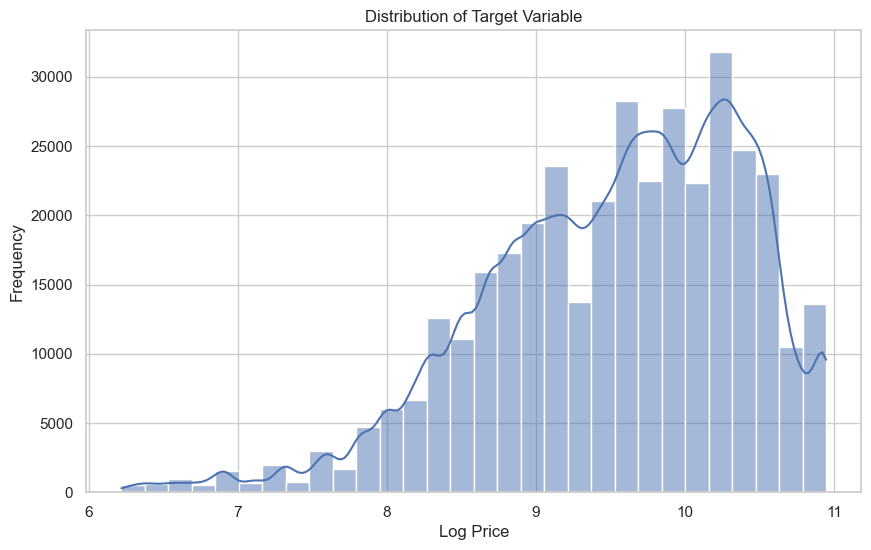

In [1711]:
# Visualize the distribution of the target variable just before modeling
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
'''**************************************************************************************************************************'''

<span style="font-size:20px;">Section 4: Modeling</span>

With the final dataset prepared, it is now time to build several regression models with price as the target variable. In this phase, I have:

<ul>
    <li>Built a variety of regression models, including Linear Regression, Polynomial Regression, Lasso Regression, and others, to analyze the relationships between features and price.</li>
    <li>Applied feature selection techniques such as Sequential Feature Selector and Lasso with Recursive Feature Elimination (RFE) to identify the most impactful features on pricing.</li>
    <li>Explored different model parameters and configurations to optimize performance, ensuring that each model is tailored to our data characteristics.</li>
    <li>Conducted cross-validation to validate findings and assess model reliability, which helps prevent overfitting and provides a more accurate estimate of model performance.</li>
    <li>Evaluated model performance using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared to determine the effectiveness of each model.</li>
    <li>Visualized model performance and error metrics through plots such as residual plots and error distributions, allowing for a better understanding of model accuracy and potential areas for improvement.</li>
    <li>Created radar charts to compare multiple models on key performance metrics, aiding in the selection of the best-performing models.</li>
</ul>

This comprehensive modeling process, enriched with visualizations, is essential for identifying the best-performing models and gaining insights into how various features impact used car prices. By leveraging these models, I aim to provide actionable recommendations to the used car dealership for optimizing pricing strategies and inventory selection.


In [ ]:
'''**************************************************************************************************************************'''

In [1721]:
# ==================================
# ==================================
# MODEL-1: Linear Regression Model
# ==================================
# ==================================

In [1723]:
# Initialize and fit the Linear Regression model
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

# Predict on the training and test sets
train_pred = model_linreg.predict(X_train)
test_pred = model_linreg.predict(X_test)

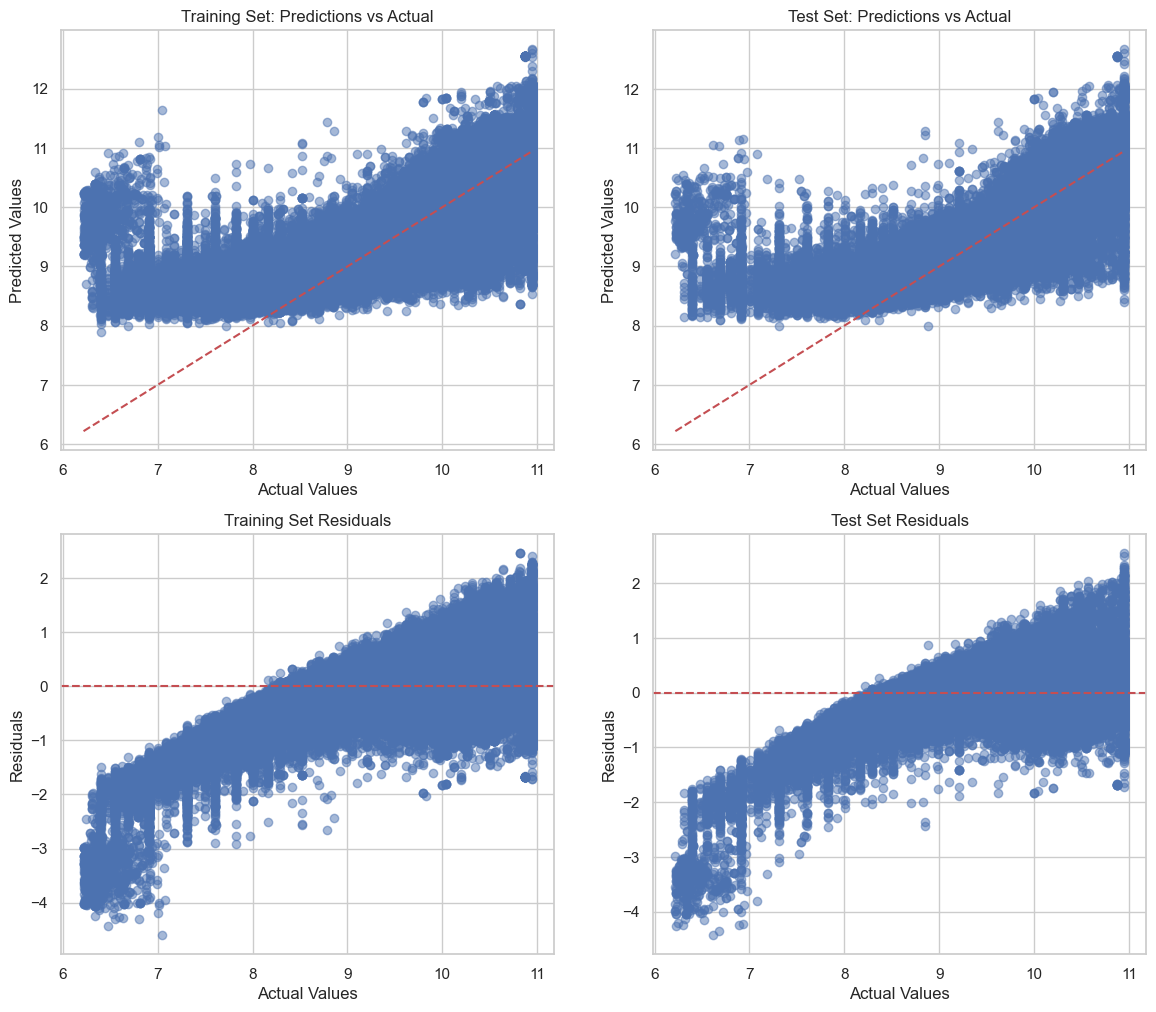

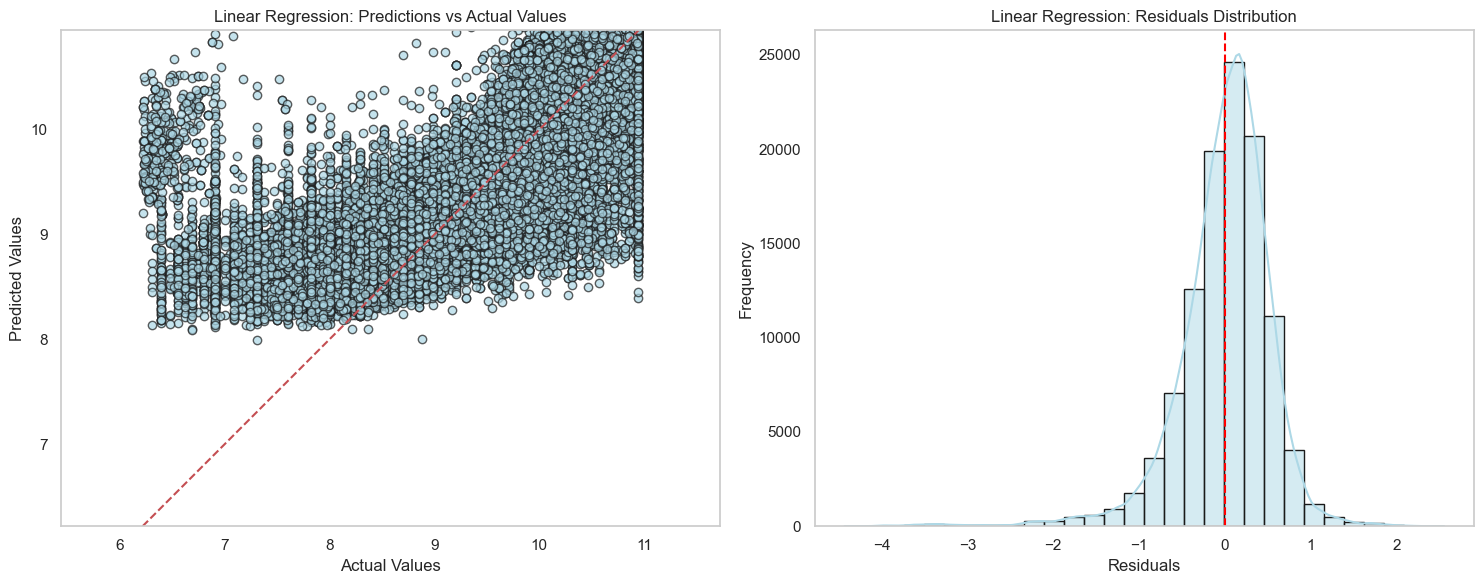

In [1725]:
# ===================================
# Visualizations for Linear Regression
# ===================================

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plotting Predictions vs Actual for Training Set
axes[0, 0].scatter(y_train, train_pred, alpha=0.5)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Diagonal line
axes[0, 0].set_title('Training Set: Predictions vs Actual')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')

# Plotting Predictions vs Actual for Test Set
axes[0, 1].scatter(y_test, test_pred, alpha=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
axes[0, 1].set_title('Test Set: Predictions vs Actual')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')

# Calculate residuals
train_residuals = y_train - train_pred
test_residuals = y_test - test_pred

# Plotting Residuals for Training Set
axes[1, 0].scatter(y_train, train_residuals, alpha=0.5)
axes[1, 0].axhline(0, color='r', linestyle='--')
axes[1, 0].set_title('Training Set Residuals')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Residuals')

# Plotting Residuals for Test Set
axes[1, 1].scatter(y_test, test_residuals, alpha=0.5)
axes[1, 1].axhline(0, color='r', linestyle='--')
axes[1, 1].set_title('Test Set Residuals')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Residuals')

# Create side-by-side plots using axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualization of Predictions vs. Actual
axes[0].scatter(y_test, test_pred, alpha=0.7, color='lightblue', edgecolors='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
axes[0].set_title('Linear Regression: Predictions vs Actual Values')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid()
axes[0].axis('equal')  # Equal scaling for both axes
axes[0].set_xlim(y_test.min(), y_test.max())
axes[0].set_ylim(y_test.min(), y_test.max())

# Calculate residuals
residuals = y_test - test_pred

# Calculate residuals
# We want the residuals to be centered around zero, with a roughly symmetrical distribution and minimal spread.
'''A narrow standard deviation in the residuals indicates that the differences between the predicted and 
   actual values are small and closely clustered around zero. This suggests that your model's predictions
   are consistent and relatively accurate.'''

sns.histplot(residuals, bins=30, kde=True, color='lightblue', edgecolor='k', ax=axes[1])
axes[1].axvline(0, color='red', linestyle='--')  # Line at zero
axes[1].set_title('Linear Regression: Residuals Distribution')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

In [1727]:
# Calculate permutation importance
result = permutation_importance(model_linreg, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Display the importance DataFrame
print(importance_df)

                                         Feature  Importance   Std Dev
4                                 price_per_year    0.609383  0.003212
6                                       fuel_gas    0.104341  0.001049
3                                   log_odometer    0.043394  0.000570
12               manufacturer_price_group_Luxury    0.031115  0.000333
8                                     fuel_other    0.031033  0.000451
15   type_price_group_Luxury & High-End Vehicles    0.030545  0.000506
9                                      drive_fwd    0.023096  0.000371
13            manufacturer_price_group_Mid-Range    0.009873  0.000159
7                                    fuel_hybrid    0.009543  0.000212
17                type_price_group_Pickup Trucks    0.009316  0.000130
2                                   title_status    0.004999  0.000205
19             state_price_group_Low-Cost States    0.004359  0.000113
10                                     drive_rwd    0.002809  0.000127
1     

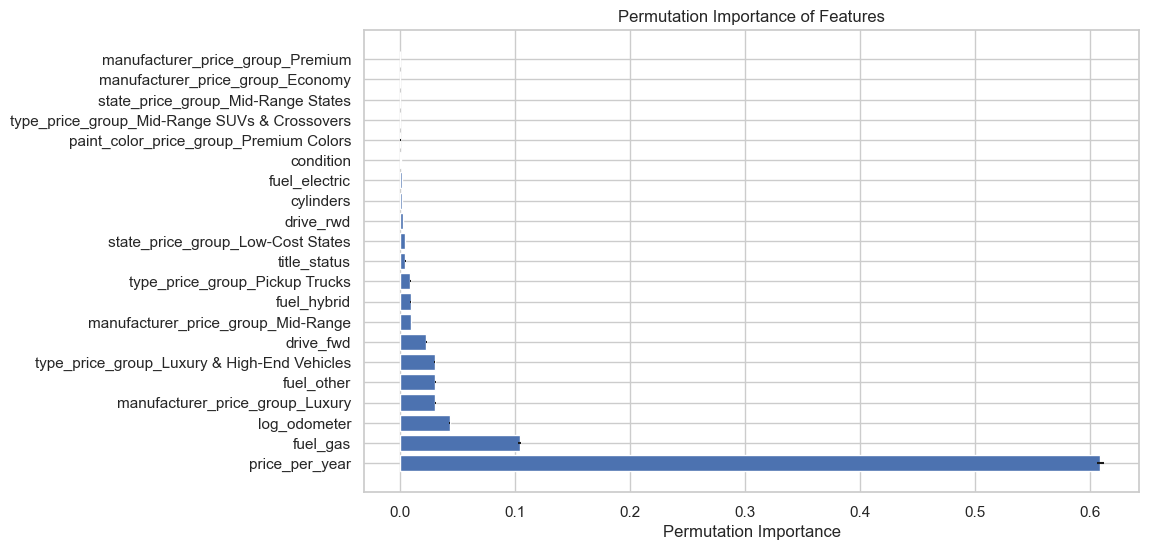

In [1729]:
# Visualize the Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std Dev'])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()

In [1731]:
# ===============================================
# Model Evaluation Section for Linear Regression
# ===============================================

# Calculate Mean Squared Error
linreg_train_mse = mean_squared_error(y_train, train_pred)
linreg_test_mse = mean_squared_error(y_test, test_pred)

# Calculate RMSE
linreg_train_rmse = np.sqrt(linreg_train_mse)
linreg_test_rmse = np.sqrt(linreg_test_mse)

# Calculate Mean Absolute Error (MAE)
linreg_train_mae = mean_absolute_error(y_train, train_pred)
linreg_test_mae = mean_absolute_error(y_test, test_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
linreg_train_mape = mean_absolute_percentage_error(y_train, train_pred)
linreg_test_mape = mean_absolute_percentage_error(y_test, test_pred)

# Calculate R² scores
linreg_train_r2 = r2_score(y_train, train_pred)
linreg_test_r2 = r2_score(y_test, test_pred)

# Print evaluation metrics with clear formatting
print("===========================================")
print("              Model Evaluation              ")
print("             Linear Regression             ")
print("===========================================")
print(f"Linreg Train Mean Squared Error (MSE): {linreg_train_mse:.2f}")
print(f"Linreg Test Mean Squared Error (MSE): {linreg_test_mse:.2f}")
print(f"Linreg Train Root Mean Squared Error (RMSE): {linreg_train_rmse:.2f}")
print(f"Linreg Test Root Mean Squared Error (RMSE): {linreg_test_rmse:.2f}")
print(f"Linreg Train Mean Absolute Error (MAE): {linreg_train_mae:.2f}")
print(f"Linreg Test Mean Absolute Error (MAE): {linreg_test_mae:.2f}")
print(f"Linreg Train Mean Absolute Percentage Error (MAPE): {linreg_train_mape:.2f}%")
print(f"Linreg Test Mean Absolute Percentage Error (MAPE): {linreg_test_mape:.2f}%")
print(f"Linreg Train R²: {linreg_train_r2:.2f}")
print(f"Linreg Test R²: {linreg_test_r2:.2f}")
print("===========================================")

              Model Evaluation              
             Linear Regression             
Linreg Train Mean Squared Error (MSE): 0.29
Linreg Test Mean Squared Error (MSE): 0.30
Linreg Train Root Mean Squared Error (RMSE): 0.54
Linreg Test Root Mean Squared Error (RMSE): 0.54
Linreg Train Mean Absolute Error (MAE): 0.39
Linreg Test Mean Absolute Error (MAE): 0.39
Linreg Train Mean Absolute Percentage Error (MAPE): 0.04%
Linreg Test Mean Absolute Percentage Error (MAPE): 0.04%
Linreg Train R²: 0.61
Linreg Test R²: 0.61


In [1733]:
# function for preparing the features and target variable 
def prepare_data(used_cars_features, target_column='log_price', test_size=0.3, random_state=42):
    # Check if target column exists and drop it
    if target_column in used_cars_features.columns:
        X = used_cars_features.drop(columns=[target_column])
        y = used_cars_features[target_column]
    else:
        raise ValueError(f"The dataset does not contain a '{target_column}' column.")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test
    
# #preprocessing function for the models below
# def create_preprocessor(X):
#     # Identify numerical and categorical features
#     categorical_features = X.select_dtypes(include=['object']).columns.tolist()
#     numerical_features = X.select_dtypes(include=['number']).columns.tolist()
    
#     # Define a ColumnTransformer to handle different types of features
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', Pipeline([
#                 ('scaler', StandardScaler()),
#                 ('poly', PolynomialFeatures())  # Polynomial features without degree specified
#             ]), numerical_features),
#             ('cat', OneHotEncoder(drop='first'), categorical_features)
#         ]
#     )
    
# Preprocessing function
def create_preprocessor(X, degree=None):
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(include=['number']).columns.tolist()
    
    poly_transformer = PolynomialFeatures(degree=degree) if degree else PolynomialFeatures()
    
    # dded handle_unknown='ignore' to the OneHotEncoder to avoid errors when encountering unseen categories in the test set.
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('poly', poly_transformer)
            ]), numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    return preprocessor 

In [ ]:
# =================================================================
# =================================================================
# MODEL-2: PolynomialFeatures with the best polynomial degree Model
# =================================================================
# =================================================================

In [1735]:
# Prepare the data
X_train, X_test, y_train, y_test = prepare_data(used_cars_features)

# Create the preprocessor
preprocessor = create_preprocessor(X_train)

# Create the pipeline for the initial model
pipe_1 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # or any other model
])

# Define the parameter grid for degrees
param_grid_1 = {
    'preprocessor__num__poly__degree': range(2, 5)  # Testing degrees 2, 3, and 4
}

grid_search_1 = GridSearchCV(pipe_1, param_grid_1, cv=3)  # 3-fold cross-validation

# Fit the GridSearchCV
grid_search_1.fit(X_train, y_train)

# Get the best degree and score
best_degree = grid_search_1.best_params_['preprocessor__num__poly__degree']
best_score = grid_search_1.best_score_

print(f'Best Degree: {best_degree}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Fit the final model using the best degree
final_model = Pipeline([
    ('preprocessor', preprocessor),  # Reuse the existing preprocessor
    ('model', LinearRegression())
])

# Update the polynomial degree in the preprocessor
final_model.named_steps['preprocessor'].transformers[0][1].named_steps['poly'].degree = best_degree

# Fit the final model
final_model.fit(X_train, y_train)

# Make predictions on training and test sets
train_pred_poly = final_model.predict(X_train)
test_pred_poly = final_model.predict(X_test)

Best Degree: 4
Best Cross-Validation Score: 0.7313


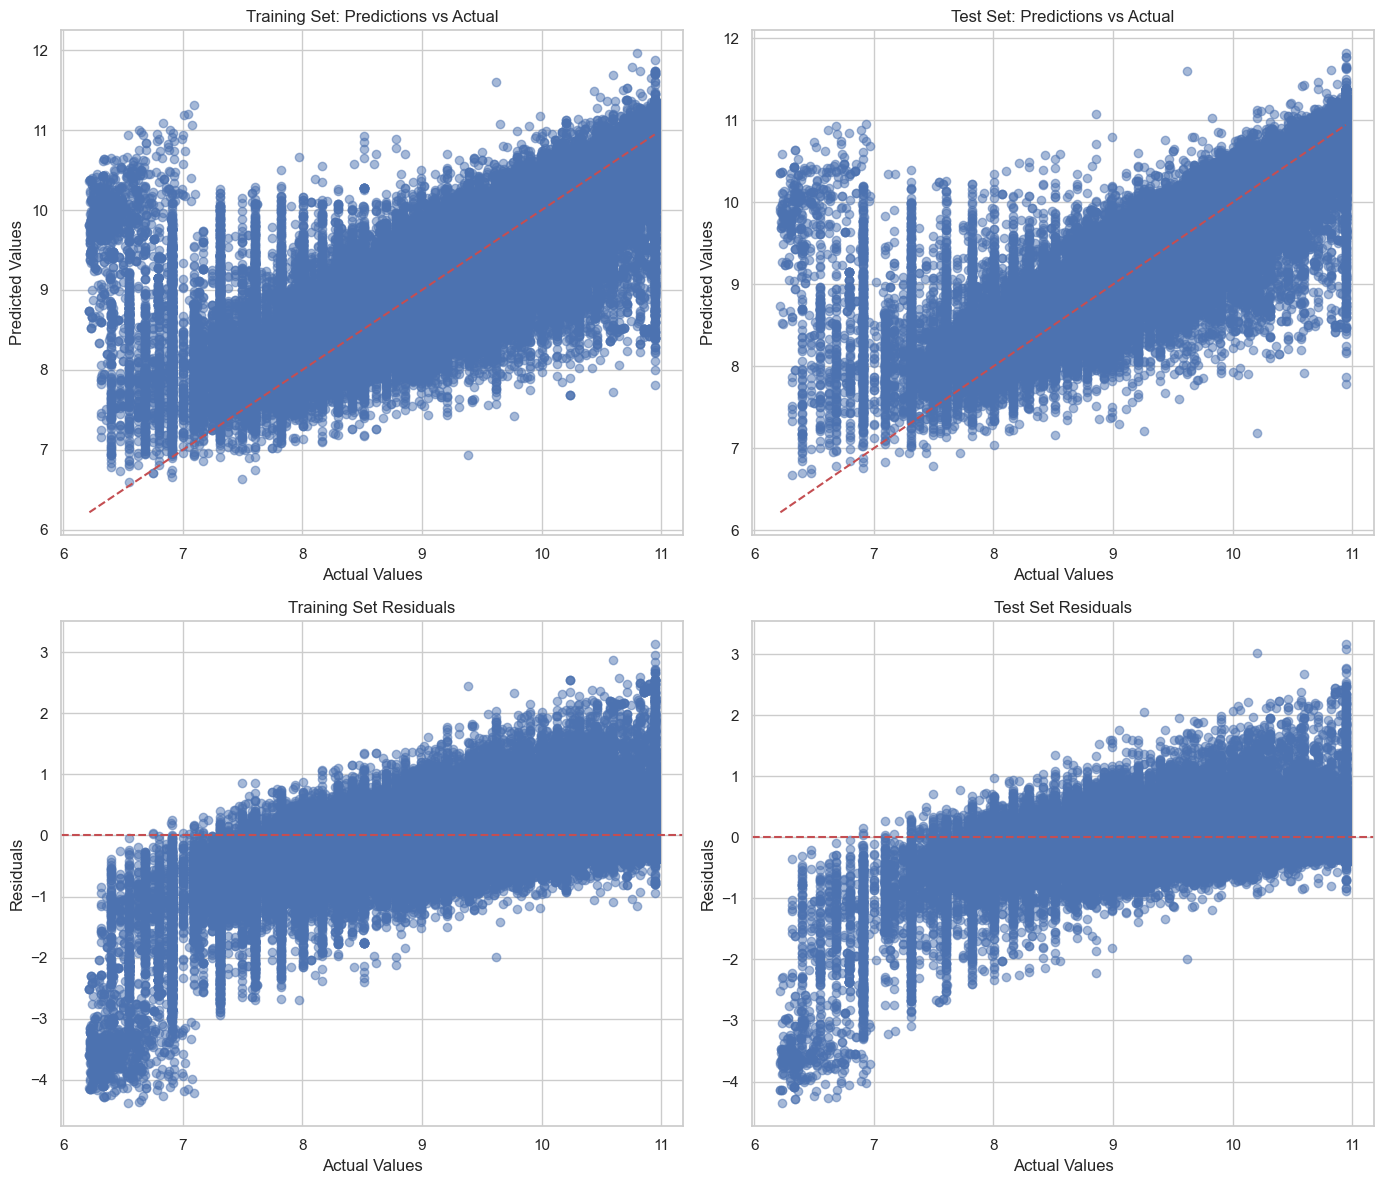

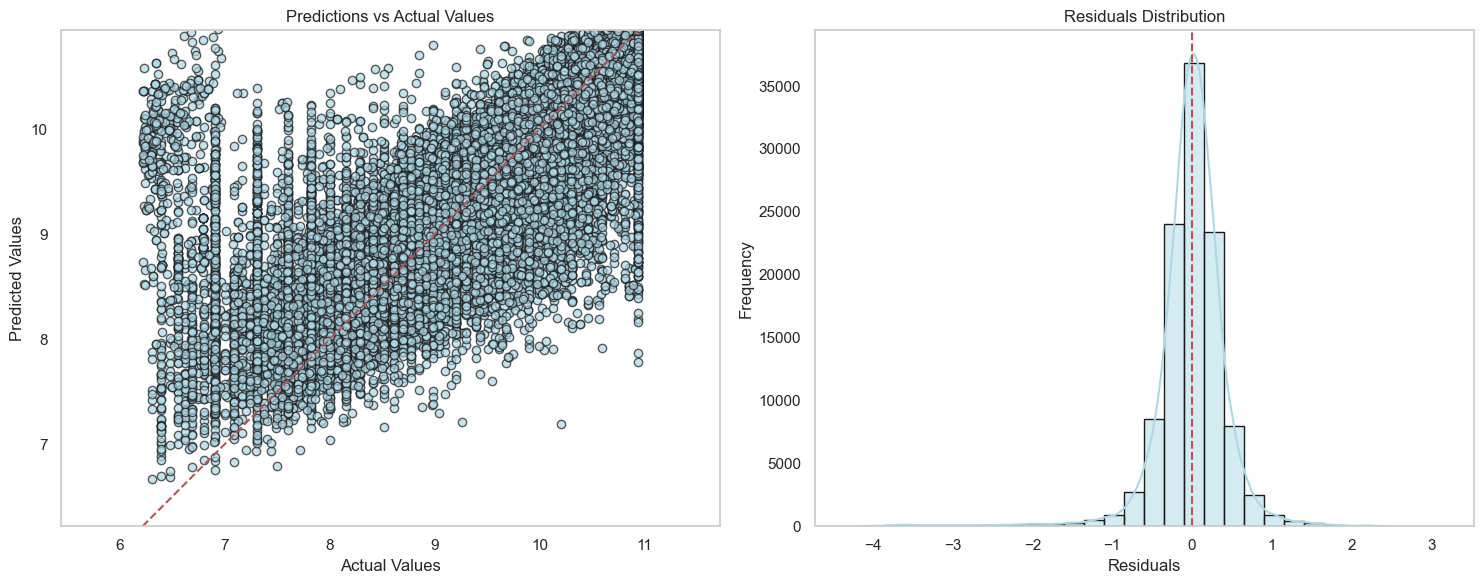

In [1737]:
# =================================
# Visualizations PolynomialFeatures
# =================================

# Create a figure for the plots
plt.figure(figsize=(14, 12))

# Training Set: Predictions vs Actual
plt.subplot(2, 2, 1)
plt.scatter(y_train, train_pred_poly, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Diagonal line
plt.title('Training Set: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Test Set: Predictions vs Actual
plt.subplot(2, 2, 2)
plt.scatter(y_test, test_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Test Set: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Training Set Residuals
plt.subplot(2, 2, 3)
train_residuals = y_train - train_pred_poly
plt.scatter(y_train, train_residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Training Set Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Test Set Residuals
plt.subplot(2, 2, 4)
test_residuals = y_test - test_pred_poly
plt.scatter(y_test, test_residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Test Set Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Create side-by-side plots
plt.figure(figsize=(15, 6))

# Visualization of Predictions vs. Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, test_pred_poly, alpha=0.7, color='lightblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.axis('equal')  # Equal scaling for both axes
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

# Calculate residuals
residuals = y_test - test_pred_poly

# Create a histogram for residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, color='lightblue', edgecolor='k')
plt.axvline(0, color='r', linestyle='--')  # Line at zero
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

In [1739]:
# Calculate permutation importance
result = permutation_importance(final_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Display the importance DataFrame
print(importance_df)

                     Feature  Importance   Std Dev
10            price_per_year    0.621703  0.002164
9               log_odometer    0.160768  0.001233
2                       fuel    0.047467  0.000605
1                  cylinders    0.044317  0.000646
0                  condition    0.024546  0.000707
6           type_price_group    0.022122  0.000309
4                      drive    0.021723  0.000306
3               title_status    0.020968  0.000875
5   manufacturer_price_group    0.019297  0.000292
8          state_price_group    0.003326  0.000099
7    paint_color_price_group    0.000001  0.000001


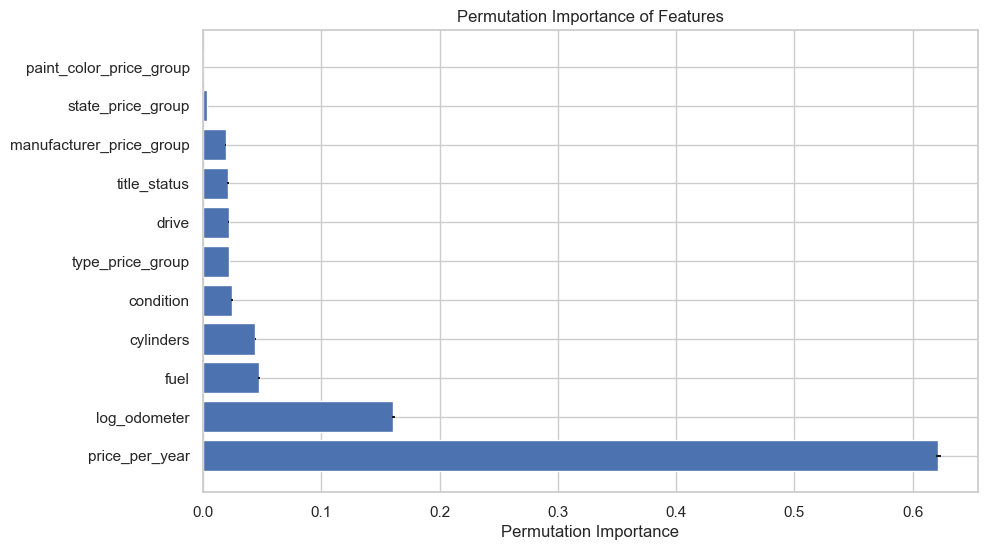

In [1741]:
# Visualize the Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std Dev'])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()

In [1743]:
# ===============================================
# Model Evaluation Section for PolynomialFeatures
# ===============================================

# Calculate Mean Squared Error for both training and test sets
poly_train_mse = mean_squared_error(y_train, train_pred_poly)
poly_test_mse = mean_squared_error(y_test, test_pred_poly)

# Calculate RMSE
poly_train_rmse = np.sqrt(poly_train_mse)
poly_test_rmse = np.sqrt(poly_test_mse)

# Calculate Mean Absolute Error (MAE)
poly_train_mae = mean_absolute_error(y_train, train_pred_poly)
poly_test_mae = mean_absolute_error(y_test, test_pred_poly)

# Calculate Mean Absolute Percentage Error (MAPE)
poly_train_mape = mean_absolute_percentage_error(y_train, train_pred_poly)
poly_test_mape = mean_absolute_percentage_error(y_test, test_pred_poly)

# Calculate R² scores
poly_train_r2 = r2_score(y_train, train_pred_poly)
poly_test_r2 = r2_score(y_test, test_pred_poly)

# Print evaluation metrics with clear formatting
print("===========================================")
print("              Model Evaluation              ")
print("             PolynomialFeatures             ")
print("===========================================")
print(f"Poly Train Mean Squared Error (MSE): {poly_train_mse:.2f}")
print(f"Poly Test Mean Squared Error (MSE): {poly_test_mse:.2f}")
print(f"Poly Train Root Mean Squared Error (RMSE): {poly_train_rmse:.2f}")
print(f"Poly Test Root Mean Squared Error (RMSE): {poly_test_rmse:.2f}")
print(f"Poly Train Mean Absolute Error (MAE): {poly_train_mae:.2f}")
print(f"Poly Test Mean Absolute Error (MAE): {poly_test_mae:.2f}")
print(f"Poly Train Mean Absolute Percentage Error (MAPE): {poly_train_mape:.2f}%")
print(f"Poly Test Mean Absolute Percentage Error (MAPE): {poly_test_mape:.2f}%")
print(f"Poly Train R²: {poly_train_r2:.2f}")
print(f"Poly Test R²: {poly_test_r2:.2f}")
print("===========================================")

              Model Evaluation              
             PolynomialFeatures             
Poly Train Mean Squared Error (MSE): 0.20
Poly Test Mean Squared Error (MSE): 0.20
Poly Train Root Mean Squared Error (RMSE): 0.45
Poly Test Root Mean Squared Error (RMSE): 0.45
Poly Train Mean Absolute Error (MAE): 0.29
Poly Test Mean Absolute Error (MAE): 0.29
Poly Train Mean Absolute Percentage Error (MAPE): 0.03%
Poly Test Mean Absolute Percentage Error (MAPE): 0.03%
Poly Train R²: 0.73
Poly Test R²: 0.73


In [ ]:
# ========================================================
# ========================================================
# MODEL-3: SequentialFeatureSelector Poly Regression Model
# ========================================================
# ========================================================

In [1745]:
# Sequential Feature Selection with polynomial features of degree 4
# Prepare the data
X_train, X_test, y_train, y_test = prepare_data(used_cars_features)

# Create the preprocessor with degree 4
preprocessor = create_preprocessor(X_train, degree=4)

# Sample a fraction of the training data
sample_size = 0.005 
X_sample = X_train.sample(frac=sample_size, random_state=42)
y_sample = y_train[X_sample.index]

# Define K-fold cross-validation strategy
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the parameter grid for GridSearchCV
param_dict = {
    'selector__n_features_to_select': range(2, 11)  # Options for number of features to select
}

# Initialize the Sequential Feature Selector
selector = SequentialFeatureSelector(
    estimator=LinearRegression(),
    cv=kf,
    scoring='neg_mean_squared_error'  # Use negative MSE for scoring
)

# Create a pipeline that processes features and fits the model
sfs_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('model', LinearRegression())
])

# Fit the model using the sampled training data with GridSearchCV
sfs_grid = GridSearchCV(sfs_pipe, param_grid=param_dict, cv=kf)
sfs_grid.fit(X_sample, y_sample)

# Get the best model from the grid search
best_estimator = sfs_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = best_estimator.named_steps['model']

# Transform the sampled training data
X_transformed_sample = best_estimator.named_steps['preprocessor'].transform(X_sample)
feature_names = best_estimator.named_steps['preprocessor'].get_feature_names_out()

# Use the boolean mask from the selector to get selected feature names
selected_features = feature_names[best_selector.get_support()]

# Get the coefficients of the model
coefs = best_model.coef_

# Print summary report
print(f'Features from best selector: {selected_features}.')

# Make predictions on the training and test datasets
train_preds = best_estimator.predict(X_sample)
test_preds = best_estimator.predict(X_test)

# Print the best parameters found by GridSearchCV and the best cross-validation score
print(f'Best parameters: {sfs_grid.best_params_}')  # Optimal number of features
print(f'Best cross-validation score: {sfs_grid.best_score_:.2f}')  # Best score during cross-validation

print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns=selected_features, index=['model'])

Features from best selector: ['num__price_per_year' 'num__cylinders^2'
 'num__log_odometer price_per_year' 'num__condition^2 cylinders'
 'num__title_status log_odometer^2' 'num__log_odometer^2 price_per_year'
 'cat__fuel_diesel' 'cat__drive_fwd'
 'cat__type_price_group_Mid-Range SUVs & Crossovers'].
Best parameters: {'selector__n_features_to_select': 9}
Best cross-validation score: 0.61
Coefficient values: 


num__price_per_year  num__cylinders^2  \
model             0.624102          0.232421   

       num__log_odometer price_per_year  num__condition^2 cylinders  \
model                          0.283731                    0.060074   

       num__title_status log_odometer^2  num__log_odometer^2 price_per_year  \
model                          0.054198                            0.063643   

       cat__fuel_diesel  cat__drive_fwd  \
model          0.416735       -0.250476   

       cat__type_price_group_Mid-Range SUVs & Crossovers  
model                                          -0.175641

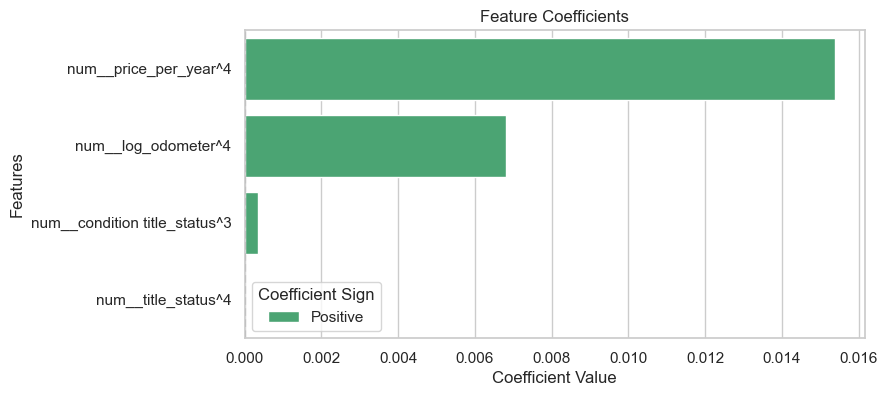

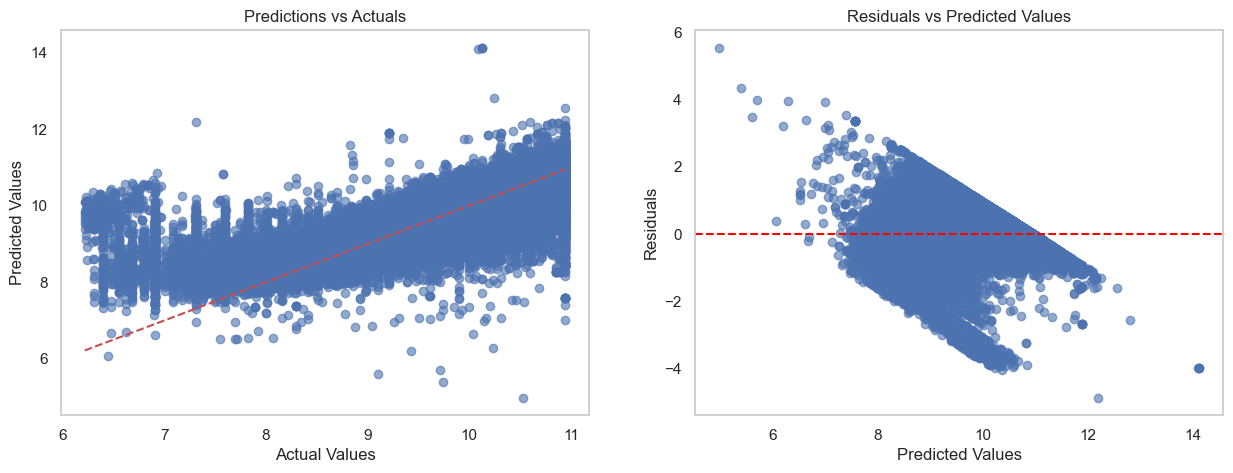

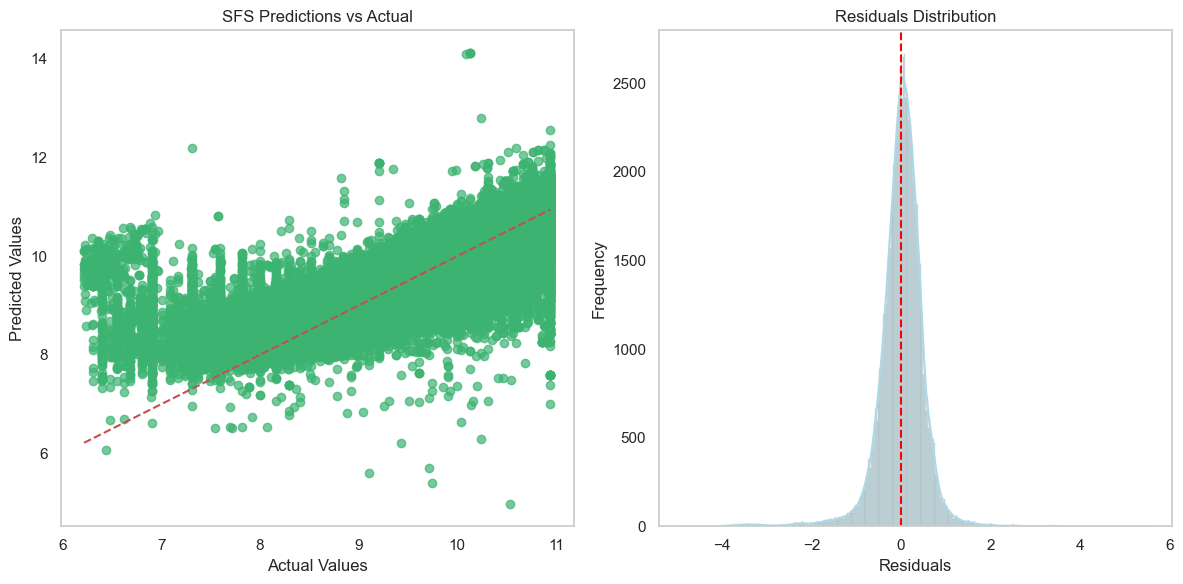

In [1749]:
# ==============================================================
# Visualizations SequentialFeatureSelector Poly Regression Model
# ==============================================================

# Create a DataFrame for coefficients and feature names
coef_df = pd.DataFrame({
    'Feature': feature_names[selected_indices],
    'Coefficient': selected_coefs
})

# Sort the DataFrame by absolute value of coefficients for better visualization
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Create a column for color based on the sign of the coefficient
coef_df['Color'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Color', dodge=False, palette={'Positive': '#3CB371', 'Negative': '#00BFFF'})
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0 for reference
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.legend(title='Coefficient Sign')

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot Predictions vs Actuals
axs[0].scatter(y_test, test_preds, alpha=0.6)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[0].set_title('Predictions vs Actuals')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].grid()

# Calculate residuals
residuals = y_test - test_preds

# Plot Residuals vs Predicted Values
axs[1].scatter(test_preds, residuals, alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')
axs[1].grid()

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Predictions vs Actual Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, test_preds, alpha=0.7, color='#3CB371')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('SFS Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

# Residuals Distribution Plot
residuals = y_test - test_preds
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='lightblue', edgecolor='k')  # Match the color
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()


In [1751]:
# ======================================================
# Model Evaluation Section for SequentialFeatureSelector
# ======================================================

# Calculate Mean Squared Error for both training and test sets
sfs_train_mse = mean_squared_error(y_sample, train_preds)
sfs_test_mse = mean_squared_error(y_test, test_preds)

# Calculate RMSE
sfs_train_rmse = np.sqrt(sfs_train_mse)
sfs_test_rmse = np.sqrt(sfs_test_mse)

# Calculate Mean Absolute Error (MAE)
sfs_train_mae = mean_absolute_error(y_sample, train_preds)
sfs_test_mae = mean_absolute_error(y_test, test_preds)

# Calculate Mean Absolute Percentage Error (MAPE)
sfs_train_mape = mean_absolute_percentage_error(y_sample, train_preds)
sfs_test_mape = mean_absolute_percentage_error(y_test, test_preds)

# Calculate R² scores for both training and test sets
sfs_train_r2 = r2_score(y_sample, train_preds)
sfs_test_r2 = r2_score(y_test, test_preds)

# Print evaluation metrics with clear formatting
print("===========================================")
print("              Model Evaluation             ")
print("          SequentialFeatureSelector        ")
print("===========================================")
print(f"SFS Train Mean Squared Error (MSE): {sfs_train_mse:.2f}")
print(f"SFS Test Mean Squared Error (MSE): {sfs_test_mse:.2f}")
print(f"SFS Train Root Mean Squared Error (RMSE): {sfs_train_rmse:.2f}")
print(f"SFS Test Root Mean Squared Error (RMSE): {sfs_test_rmse:.2f}")
print(f"SFS Train Mean Absolute Error (MAE): {sfs_train_mae:.2f}")
print(f"SFS Test Mean Absolute Error (MAE): {sfs_test_mae:.2f}")
print(f"SFS Train Mean Absolute Percentage Error (MAPE): {sfs_train_mape:.2f}%")
print(f"SFS Test Mean Absolute Percentage Error (MAPE): {sfs_test_mape:.2f}%")
print(f"SFS Train R²: {sfs_train_r2:.2f}")
print(f"SFS Test R²: {sfs_test_r2:.2f}")
print("===========================================")

              Model Evaluation             
          SequentialFeatureSelector        
SFS Train Mean Squared Error (MSE): 0.26
SFS Test Mean Squared Error (MSE): 0.26
SFS Train Root Mean Squared Error (RMSE): 0.51
SFS Test Root Mean Squared Error (RMSE): 0.51
SFS Train Mean Absolute Error (MAE): 0.34
SFS Test Mean Absolute Error (MAE): 0.34
SFS Train Mean Absolute Percentage Error (MAPE): 0.04%
SFS Test Mean Absolute Percentage Error (MAPE): 0.04%
SFS Train R²: 0.65
SFS Test R²: 0.66


In [ ]:
# ===============================================
# ===============================================
# MODEL-4: Lasso as a sequential feature selector
# ===============================================
# ===============================================

In [1865]:
# let's do the above with Lasso as a sequential feature selector 
# Prepare the data
X_train, X_test, y_train, y_test = prepare_data(used_cars_features)

# Create the preprocessor with degree 4
preprocessor = create_preprocessor(X_train, degree=4)

# Sample a fraction of the training data 
sample_size = 0.1
X_sample = X_train.sample(frac=sample_size, random_state=42)
y_sample = y_train[X_sample.index]

# Create the pipeline with PolynomialFeatures and Lasso as the feature selector
lasso_selector_pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess features
    ('selector', SequentialFeatureSelector(
        estimator=Lasso(alpha=0.1), 
        n_features_to_select='auto', 
        cv=3)
    ),  # Lasso for feature selection
    ('model', LinearRegression())  # Linear regression as the final model
])

# Fit the model with the training data
lasso_selector_pipe.fit(X_sample, y_sample)  # Fit on the sampled data

# Make predictions on the training sample and the test set
train_preds_lasso = lasso_selector_pipe.predict(X_sample)  # Predict on the sampled training data
test_preds_lasso = lasso_selector_pipe.predict(X_test)     # Predict on the full test set

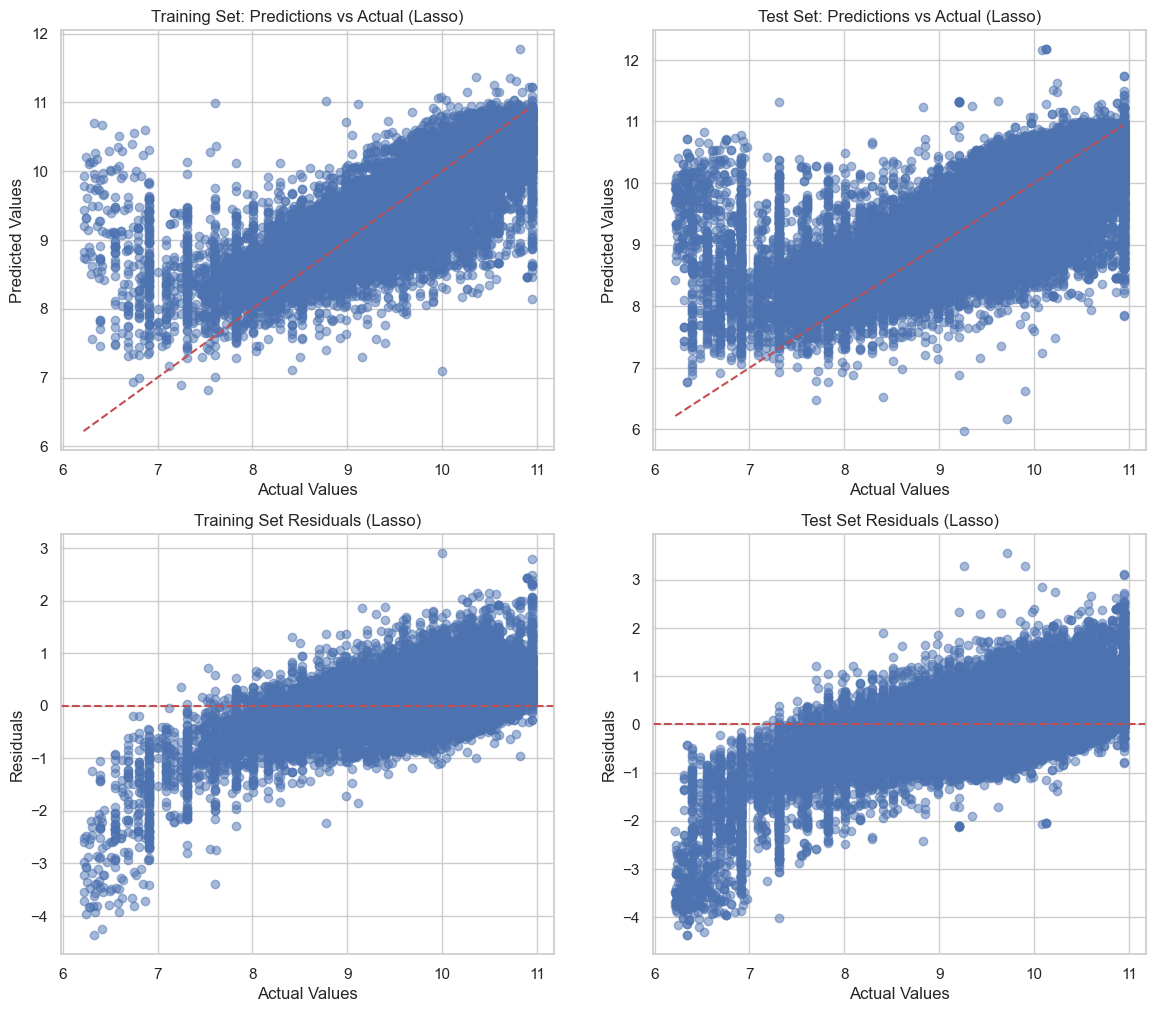

<Figure size 1400x600 with 0 Axes>

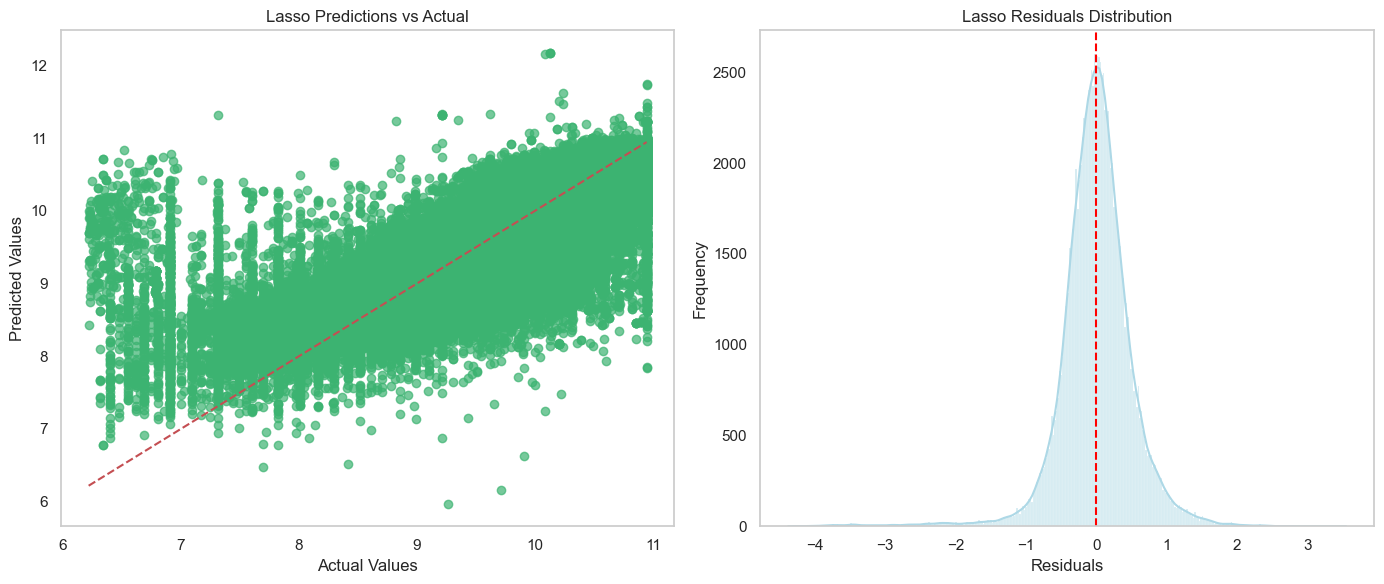

In [1867]:
# ========================================
# Visualizations for Lasso as a SFS Model
# ========================================

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plotting Predictions vs Actual for Training Set
axes[0, 0].scatter(y_sample, train_preds_lasso, alpha=0.5)
axes[0, 0].plot([y_sample.min(), y_sample.max()], [y_sample.min(), y_sample.max()], 'r--')  # Diagonal line
axes[0, 0].set_title('Training Set: Predictions vs Actual (Lasso)')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')

# Plotting Predictions vs Actual for Test Set
axes[0, 1].scatter(y_test, test_preds_lasso, alpha=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
axes[0, 1].set_title('Test Set: Predictions vs Actual (Lasso)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')

# Calculate residuals
train_residuals_lasso = y_sample - train_preds_lasso
test_residuals_lasso = y_test - test_preds_lasso

# Plotting Residuals for Training Set
axes[1, 0].scatter(y_sample, train_residuals_lasso, alpha=0.5)
axes[1, 0].axhline(0, color='r', linestyle='--')
axes[1, 0].set_title('Training Set Residuals (Lasso)')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Residuals')

# Plotting Residuals for Test Set
axes[1, 1].scatter(y_test, test_residuals_lasso, alpha=0.5)
axes[1, 1].axhline(0, color='r', linestyle='--')
axes[1, 1].set_title('Test Set Residuals (Lasso)')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Residuals')

# Predictions vs Actual
plt.figure(figsize=(14, 6))
axs = plt.subplots(1, 2, figsize=(14, 6))[1]

# Predictions vs Actual
axs[0].scatter(y_test, test_preds_lasso, alpha=0.7, color='#3CB371')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
axs[0].set_title('Lasso Predictions vs Actual')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].grid()

# Residuals Distribution
residuals_lasso = y_test - test_preds_lasso
sns.histplot(residuals_lasso, kde=True, ax=axs[1], color='lightblue')
axs[1].axvline(0, color='red', linestyle='--')
axs[1].set_title('Lasso Residuals Distribution')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')
axs[1].grid()

plt.tight_layout()  # Adjusts the spacing between plots
plt.show()

In [1869]:
# ===========================================
# Model Evaluation Section for Lasso as a SFS
# ===========================================

# Calculate Mean Squared Error
las_sfs_train_mse = mean_squared_error(y_sample, train_preds_lasso)
las_sfs_test_mse = mean_squared_error(y_test, test_preds_lasso)

# Calculate RMSE
las_sfs_train_rmse = np.sqrt(las_sfs_train_mse)
las_sfs_test_rmse = np.sqrt(las_sfs_test_mse)

# Calculate Mean Absolute Error (MAE)
las_sfs_train_mae = mean_absolute_error(y_sample, train_preds_lasso)
las_sfs_test_mae = mean_absolute_error(y_test, test_preds_lasso)

# Calculate Mean Absolute Percentage Error (MAPE)
las_sfs_train_mape = mean_absolute_percentage_error(y_sample, train_preds_lasso)
las_sfs_test_mape = mean_absolute_percentage_error(y_test, test_preds_lasso)

# Calculate R² scores
las_sfs_train_r2 = r2_score(y_sample, train_preds_lasso)
las_sfs_test_r2 = r2_score(y_test, test_preds_lasso)

# Print evaluation metrics with clear formatting
print("===========================================")
print("              Model Evaluation              ")
print("               Lasso as a SFS              ")
print("===========================================")
print(f"Las SFS Train Mean Squared Error (MSE): {las_sfs_train_mse:.2f}")
print(f"Las SFS Test Mean Squared Error (MSE): {las_sfs_test_mse:.2f}")
print(f"Las SFS Train Root Mean Squared Error (RMSE): {las_sfs_train_rmse:.2f}")
print(f"Las SFS Test Root Mean Squared Error (RMSE): {las_sfs_test_rmse:.2f}")
print(f"Las SFS Train Mean Absolute Error (MAE): {las_sfs_train_mae:.2f}")
print(f"Las SFS Test Mean Absolute Error (MAE): {las_sfs_test_mae:.2f}")
print(f"Las SFS Train Mean Absolute Percentage Error (MAPE): {las_sfs_train_mape:.2f}%")
print(f"Las SFS Test Mean Absolute Percentage Error (MAPE): {las_sfs_test_mape:.2f}%")
print(f"Las SFS Train R²: {las_sfs_train_r2:.2f}")
print(f"Las SFS Test R²: {las_sfs_test_r2:.2f}")
print("===========================================")

              Model Evaluation              
               Lasso as a SFS              
Las SFS Train Mean Squared Error (MSE): 0.26
Las SFS Test Mean Squared Error (MSE): 0.27
Las SFS Train Root Mean Squared Error (RMSE): 0.51
Las SFS Test Root Mean Squared Error (RMSE): 0.52
Las SFS Train Mean Absolute Error (MAE): 0.35
Las SFS Test Mean Absolute Error (MAE): 0.36
Las SFS Train Mean Absolute Percentage Error (MAPE): 0.04%
Las SFS Test Mean Absolute Percentage Error (MAPE): 0.04%
Las SFS Train R²: 0.65
Las SFS Test R²: 0.65


In [ ]:
# ===============================
# ===============================
# MODEL-5: Ridge regression Model
# ===============================
# ===============================

In [1761]:
# Using Ridge Regression with Polynomial Features of Degree 4

# Prepare the data
X_train, X_test, y_train, y_test = prepare_data(used_cars_features)

# Create the preprocessor with polynomial degree 4
preprocessor = create_preprocessor(X_train, degree=4)

# Create the pipeline with Ridge Regression
ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess features
    ('model', Ridge())  # Use Ridge Regression as the model
])

# Define the parameter grid for alpha values
ridge_param_dict = {'model__alpha': np.logspace(0, 10, 50)}  
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training dataset
ridge_grid.fit(X_train, y_train)

# Make predictions
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

# Extract coefficients from the best estimator
coefs = ridge_grid.best_estimator_.named_steps['model'].coef_
feature_names = ridge_grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# Get the top 10 coefficients by absolute value
top_10_coefs = coef_df.reindex(coef_df['Coefficient'].abs().nlargest(10).index)
top_10_coefs['Feature'] = top_10_coefs['Feature'].str.replace(r'^(num__|cat__)', '', regex=True)

# Print the number of coefficients
print(f'Number of coefficients: {len(coef_df)}')
print('===========================================')

# Print the top 10 coefficients
print('Top 10 Coefficient Values (Positive and Negative):')
top_10_coefs

Number of coefficients: 148
Top 10 + and - coefficient values: 


Feature  Coefficient
1                           condition     0.675029
138  manufacturer_price_group_Premium     0.560359
5                      price_per_year     0.522749
21                        condition^3    -0.468744
126                       fuel_diesel     0.404807
11                        cylinders^2     0.301967
3                        title_status     0.300822
135  manufacturer_price_group_Economy    -0.264932
20                   price_per_year^2    -0.227653
134   manufacturer_price_group_Budget    -0.222187

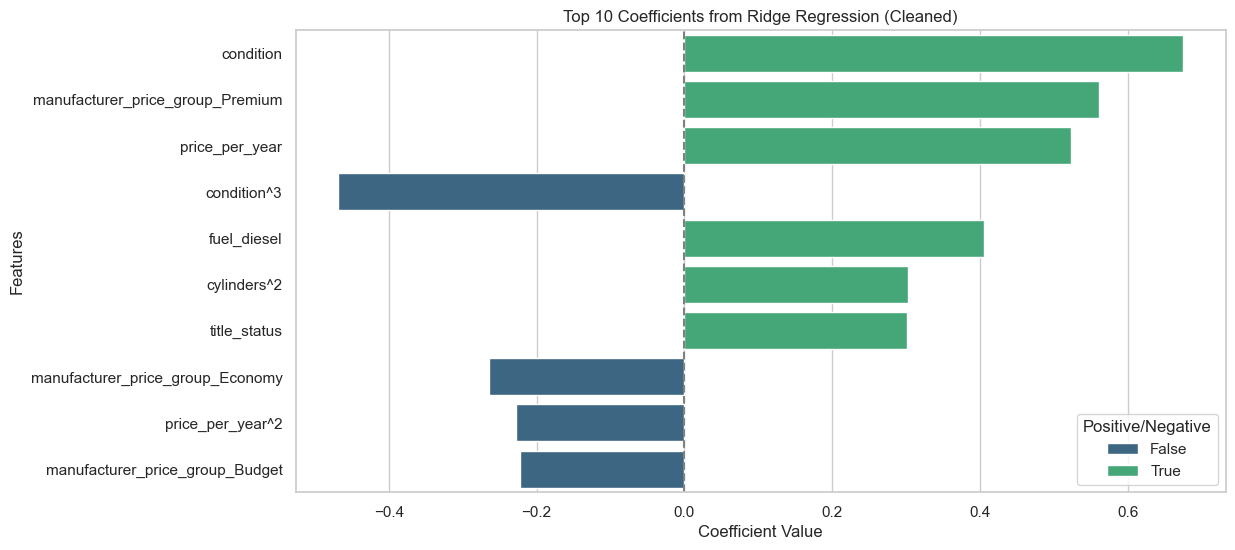

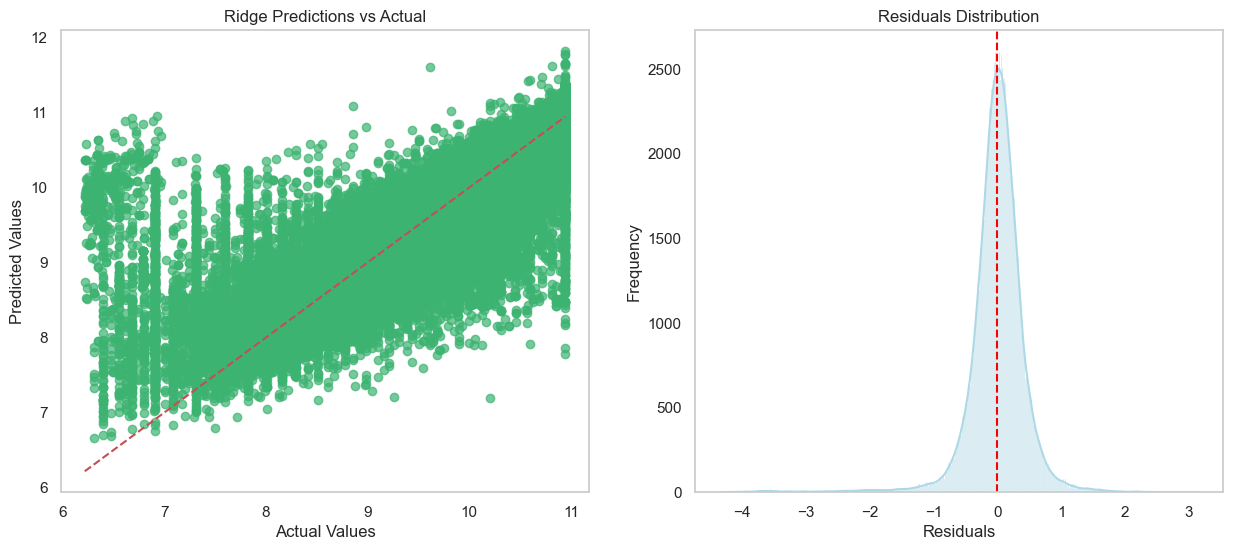

In [1766]:
# =====================================
# Visualizations Ridge regression Model
# =====================================

# Visualization section
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_coefs, x='Coefficient', y='Feature', palette='viridis', hue=top_10_coefs['Coefficient'] > 0)
plt.title('Top 10 Coefficients from Ridge Regression (Cleaned)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0 for reference
plt.legend(title='Positive/Negative', loc='lower right')
plt.show()

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Predictions vs Actual
axs[0].scatter(y_test, ridge_test_preds, alpha=0.7, color='#3CB371')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
axs[0].set_title('Ridge Predictions vs Actual')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].grid()

# Residuals Distribution
residuals = y_test - ridge_test_preds
sns.histplot(residuals, kde=True, ax=axs[1], color='lightblue')
axs[1].axvline(0, color='red', linestyle='--')
axs[1].set_title('Residuals Distribution')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')
axs[1].grid()

In [1871]:
# =============================================
# Model Evaluation Section for Ridge regression 
# =============================================

# Calculate Mean Squared Error
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

# Calculate RMSE
ridge_train_rmse = np.sqrt(ridge_train_mse)
ridge_test_rmse = np.sqrt(ridge_test_mse)

# Calculate Mean Absolute Error (MAE)
ridge_train_mae = mean_absolute_error(y_train, ridge_train_preds)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_preds)

# Calculate Mean Absolute Percentage Error (MAPE)
ridge_train_mape = mean_absolute_percentage_error(y_train, ridge_train_preds)
ridge_test_mape = mean_absolute_percentage_error(y_test, ridge_test_preds)

# Calculate R² scores
ridge_train_r2 = r2_score(y_train, ridge_train_preds)
ridge_test_r2 = r2_score(y_test, ridge_test_preds)

# Print evaluation metrics with clear formatting
print("===========================================")
print("              Model Evaluation              ")
print("              Ridge regression               ")
print("===========================================")
print(f"Ridge Train Mean Squared Error (MSE): {ridge_train_mse:.2f}")
print(f"Ridge Test Mean Squared Error (MSE): {ridge_test_mse:.2f}")
print(f"Ridge Train Root Mean Squared Error (RMSE): {ridge_train_rmse:.2f}")
print(f"Ridge Test Root Mean Squared Error (RMSE): {ridge_test_rmse:.2f}")
print(f"Ridge Train Mean Absolute Error (MAE): {ridge_train_mae:.2f}")
print(f"Ridge Test Mean Absolute Error (MAE): {ridge_test_mae:.2f}")
print(f"Ridge Train Mean Absolute Percentage Error (MAPE): {ridge_train_mape:.2f}%")
print(f"Ridge Test Mean Absolute Percentage Error (MAPE): {ridge_test_mape:.2f}%")
print(f"Ridge Train R²: {ridge_train_r2:.2f}")
print(f"Ridge Test R²: {ridge_test_r2:.2f}")
print("===========================================")

              Model Evaluation              
              Ridge regression               
Ridge Train Mean Squared Error (MSE): 0.20
Ridge Test Mean Squared Error (MSE): 0.20
Ridge Train Root Mean Squared Error (RMSE): 0.45
Ridge Test Root Mean Squared Error (RMSE): 0.45
Ridge Train Mean Absolute Error (MAE): 0.29
Ridge Test Mean Absolute Error (MAE): 0.29
Ridge Train Mean Absolute Percentage Error (MAPE): 0.03%
Ridge Test Mean Absolute Percentage Error (MAPE): 0.03%
Ridge Train R²: 0.73
Ridge Test R²: 0.73


In [ ]:
# ===============================
# ===============================
# MODEL-6: Lasso regression Model
# ===============================
# ===============================

In [1879]:
# Prepare the data
X_train, X_test, y_train, y_test = prepare_data(used_cars_features)

# Create the preprocessor with polynomial degree 4
preprocessor = create_preprocessor(X_train, degree=4)

# Sample a smaller fraction of the training data
sample_size = 0.1  # 10% of the training data
X_train_sample = X_train.sample(frac=sample_size, random_state=42)
y_train_sample = y_train[X_train_sample.index]

# Create the pipeline with Lasso Regression
lasso_pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess features
    ('model', Lasso(max_iter=10000))  # Use Lasso Regression as the model
])

# Define a limited grid of alpha values
lasso_param_dict = {'model__alpha': np.logspace(-2, 5, 10)}  # Range of alpha values
lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_param_dict, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the sampled dataset
lasso_grid.fit(X_train_sample, y_train_sample)

# Use the best estimator for predictions
lasso_best_model = lasso_grid.best_estimator_

# Make predictions
lasso_train_preds = lasso_best_model.predict(X_train_sample)
lasso_test_preds = lasso_best_model.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
lasso_train_mse = mean_squared_error(y_train_sample, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

# Print the best parameters and the best cross-validation score
print(f'Best parameters: {lasso_grid.best_params_}')
print(f'Best cross-validation score: {lasso_grid.best_score_:.2f}')

# Get coefficients from the best model
coefs = lasso_best_model.named_steps['model'].coef_
feature_names = lasso_best_model.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# Count the number of coefficients that are zero
num_zero_coefs = (coefs == 0).sum()

# Get the top 10 coefficients by absolute value
top_10_coefs = coef_df.reindex(coef_df['Coefficient'].abs().nlargest(10).index)
top_10_coefs['Feature'] = top_10_coefs['Feature'].str.replace(r'^(num__|cat__)', '', regex=True)

# Print the results
print(f'Number of coefficients: {len(coef_df)}')
print(f'Number of coefficients forced to zero: {num_zero_coefs}')
print('===========================================')
print('Top 10 Coefficient Values:')
top_10_coefs

Best parameters: {'model__alpha': 0.01}
Best cross-validation score: -0.22
Number of coefficients: 147
Number of coefficients forced to zero: 90
Top 10 Coefficient Values:


Feature  Coefficient
5                                  price_per_year      0.50886
126                                   fuel_diesel      0.33802
132                                     drive_fwd     -0.17945
20                               price_per_year^2     -0.15774
11                                    cylinders^2      0.14217
4                                    log_odometer     -0.13989
19                    log_odometer price_per_year      0.12202
140  type_price_group_Mid-Range SUVs & Crossovers     -0.11692
135              manufacturer_price_group_Economy     -0.09324
139   type_price_group_Luxury & High-End Vehicles      0.08870

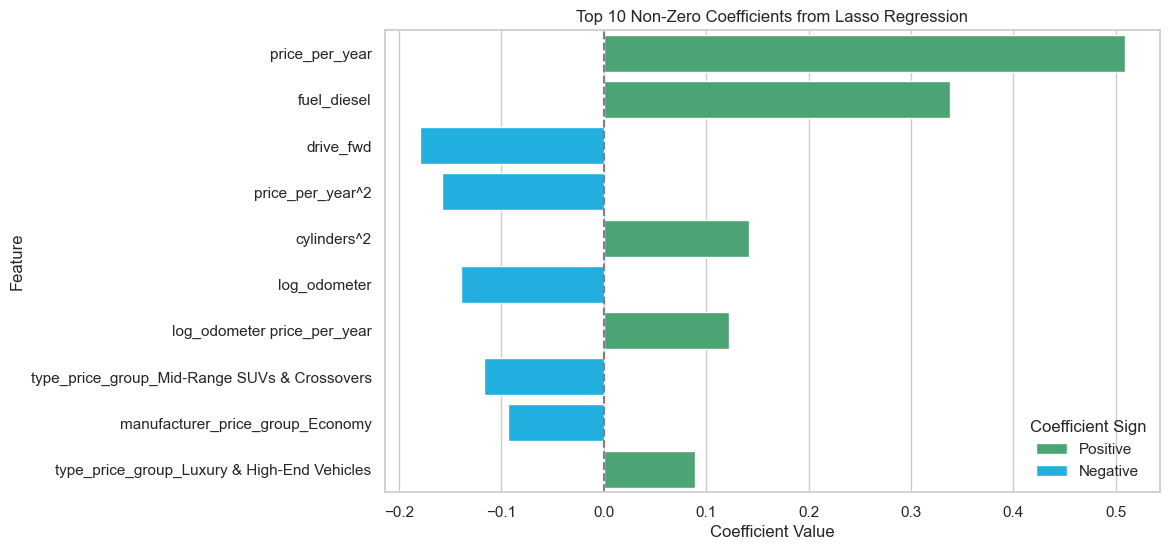

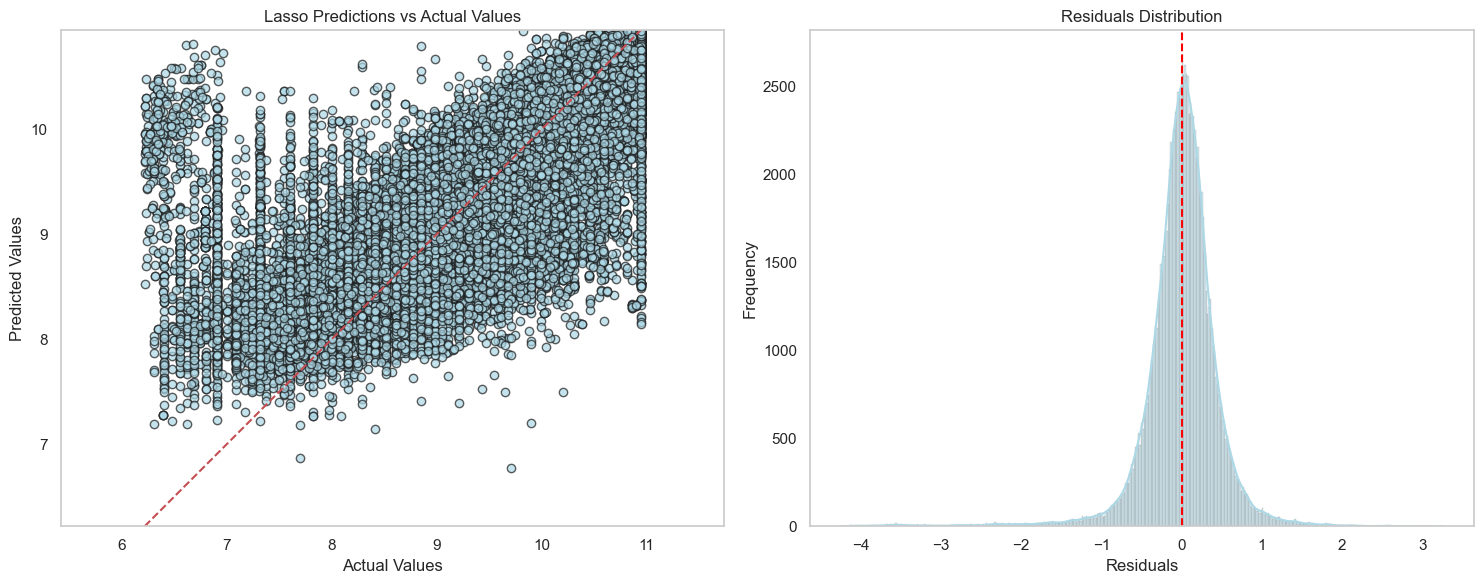

In [1881]:
# ===========================================
# Visualizations Section for Lasso regression
# ===========================================

# Visualization of top 10 coefficients with positive and negative colors
plt.figure(figsize=(10, 6))

# Add a new column for hue
top_10_coefs['Sign'] = np.where(top_10_coefs['Coefficient'] > 0, 'Positive', 'Negative')

# Use hue for color mapping
sns.barplot(data=top_10_coefs, x='Coefficient', y='Feature', hue='Sign', dodge=False, 
            palette={'Positive': '#3CB371', 'Negative': '#00BFFF'})

plt.title('Top 10 Non-Zero Coefficients from Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='grey', linestyle='--')  # Optional: Add a vertical line at 0
plt.legend(title='Coefficient Sign', loc='lower right', frameon=False)
plt.show()

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Predictions vs Actual
axs[0].scatter(y_test, lasso_test_preds, alpha=0.7, color='lightblue', edgecolors='k')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
axs[0].set_title('Lasso Predictions vs Actual Values')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].grid()
axs[0].axis('equal')  # Equal scaling for both axes
axs[0].set_xlim(y_test.min(), y_test.max())
axs[0].set_ylim(y_test.min(), y_test.max())

# Residuals Distribution
residuals = y_test - lasso_test_preds
sns.histplot(residuals, kde=True, ax=axs[1], color='lightblue', edgecolor='k')  # Match the color
axs[1].axvline(0, color='red', linestyle='--')  # Line at zero
axs[1].set_title('Residuals Distribution')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')
axs[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [1883]:
# =============================================
# Model Evaluation Section for Lasso regression
# =============================================

# Calculate Mean Squared Error
lasso_train_mse = mean_squared_error(y_train_sample, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

# Calculate RMSE
lasso_train_rmse = np.sqrt(lasso_train_mse)
lasso_test_rmse = np.sqrt(lasso_test_mse)

# Calculate Mean Absolute Error (MAE)
lasso_train_mae = mean_absolute_error(y_train_sample, lasso_train_preds)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_preds)

# Calculate Mean Absolute Percentage Error (MAPE)
lasso_train_mape = mean_absolute_percentage_error(y_train_sample, lasso_train_preds)
lasso_test_mape = mean_absolute_percentage_error(y_test, lasso_test_preds)

# Calculate R² scores
lasso_train_r2 = r2_score(y_train_sample, lasso_train_preds)
lasso_test_r2 = r2_score(y_test, lasso_test_preds)

# Print evaluation metrics with clear formatting
print("===========================================")
print("              Lasso Model Evaluation          ")
print("                Lasso regression              ")
print("===========================================")
print(f"Lasso Train Mean Squared Error (MSE): {lasso_train_mse:.2f}")
print(f"Lasso Test Mean Squared Error (MSE): {lasso_test_mse:.2f}")
print(f"Lasso Train Root Mean Squared Error (RMSE): {lasso_train_rmse:.2f}")
print(f"Lasso Test Root Mean Squared Error (RMSE): {lasso_test_rmse:.2f}")
print(f"Lasso Train Mean Absolute Error (MAE): {lasso_train_mae:.2f}")
print(f"Lasso Test Mean Absolute Error (MAE): {lasso_test_mae:.2f}")
print(f"Lasso Train Mean Absolute Percentage Error (MAPE): {lasso_train_mape:.2f}%")
print(f"Lasso Test Mean Absolute Percentage Error (MAPE): {lasso_test_mape:.2f}%")
print(f"Lasso Train R²: {lasso_train_r2:.2f}")
print(f"Lasso Test R²: {lasso_test_r2:.2f}")
print("===========================================")

              Lasso Model Evaluation          
                Lasso regression              
Lasso Train Mean Squared Error (MSE): 0.22
Lasso Test Mean Squared Error (MSE): 0.22
Lasso Train Root Mean Squared Error (RMSE): 0.47
Lasso Test Root Mean Squared Error (RMSE): 0.47
Lasso Train Mean Absolute Error (MAE): 0.31
Lasso Test Mean Absolute Error (MAE): 0.31
Lasso Train Mean Absolute Percentage Error (MAPE): 0.03%
Lasso Test Mean Absolute Percentage Error (MAPE): 0.03%
Lasso Train R²: 0.71
Lasso Test R²: 0.71


In [ ]:
# ====================================================
# ====================================================
# MODEL-7: Lasso regression with RFE feature selection
# ====================================================
# ====================================================

In [1889]:
# Prepare the data
X_train, X_test, y_train, y_test = prepare_data(used_cars_features)

# Create the preprocessor with polynomial degree 4
preprocessor = create_preprocessor(X_train, degree=4)

# Sample a smaller fraction of the training data
sample_size = 0.01  # 0.1% of the training data
X_train_sample = X_train.sample(frac=sample_size, random_state=42)
y_train_sample = y_train[X_train_sample.index]

# Create the pipeline with Recursive Feature Elimination (RFE) and Lasso Regression
lasso_pipe = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess features
    ('feature_selector', RFE(estimator=Lasso(max_iter=10000), n_features_to_select=4)),  # Select top 4 features
    ('model', Lasso(max_iter=10000))  # Lasso Regression model
])

# Define the grid of alpha values for Lasso
lasso_param_dict = {'model__alpha': np.logspace(-2, 5, 10)}  # Range of alpha values
lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_param_dict, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the sampled dataset
lasso_grid.fit(X_train_sample, y_train_sample)

# Use the best estimator for predictions
lasso_best_model = lasso_grid.best_estimator_

# Make predictions on the sampled training set and test set
lasso_sample_train_preds = lasso_best_model.predict(X_train_sample)
lasso_sample_test_preds = lasso_best_model.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
lasso_sample_train_mse = mean_squared_error(y_train_sample, lasso_sample_train_preds)
lasso_sample_test_mse = mean_squared_error(y_test, lasso_sample_test_preds)

# Print the best parameters and the best cross-validation score
print(f'Best parameters: {lasso_grid.best_params_}')
print(f'Best cross-validation score: {lasso_grid.best_score_:.2f}')

# Get coefficients from the best model
coefs = lasso_best_model.named_steps['model'].coef_
feature_names = lasso_best_model.named_steps['preprocessor'].get_feature_names_out()

# Check the shapes of coefficients and feature names
print(f'Coefficients shape: {coefs.shape}')
print(f'Feature names shape: {feature_names.shape}')

# Get the selected features mask
selected_features_mask = lasso_best_model.named_steps['feature_selector'].support_

# Get indices of selected features
selected_indices = np.where(selected_features_mask)[0]  
selected_coefs = coefs[:len(selected_indices)]  # Align coefficients with selected features
selected_feature_names = feature_names[selected_features_mask]  # Align feature names

# Create DataFrame for coefficients based on selected features
coef_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': selected_coefs
})

# Count the number of coefficients that are zero
num_zero_coefs = (selected_coefs == 0).sum()

# Get the top 10 coefficients by absolute value
top_10_coefs = coef_df.reindex(coef_df['Coefficient'].abs().nlargest(10).index)

# Set the display option for floating point numbers
pd.options.display.float_format = '{:.5f}'.format

# Print the results
print(f'Number of coefficients: {len(coef_df)}')
print(f'Number of coefficients forced to zero: {num_zero_coefs}')
print('===========================================')
print('Top 10 Coefficient Values:')
print(top_10_coefs)

Best parameters: {'model__alpha': 0.01}
Best cross-validation score: -0.50
Coefficients shape: (4,)
Feature names shape: (147,)
Number of coefficients: 4
Number of coefficients forced to zero: 0
Top 10 Coefficient Values:
                              Feature  Coefficient
0               num__price_per_year^3      0.34113
3               num__price_per_year^4     -0.09065
2                 num__log_odometer^4     -0.00442
1  num__title_status^3 price_per_year     -0.00016


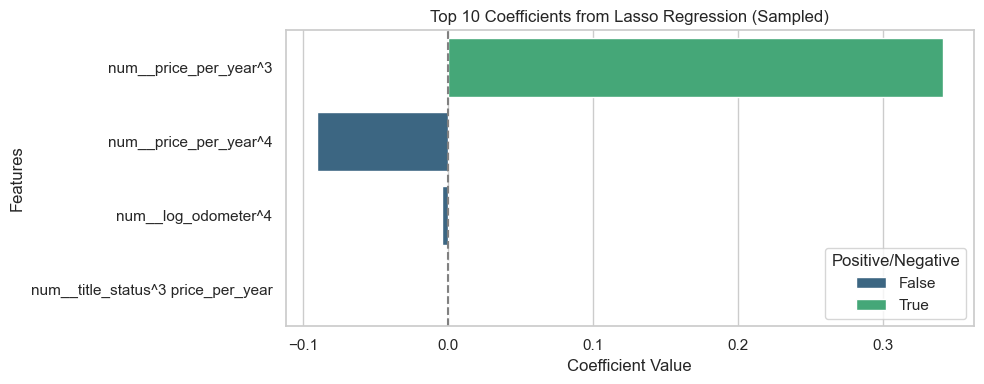

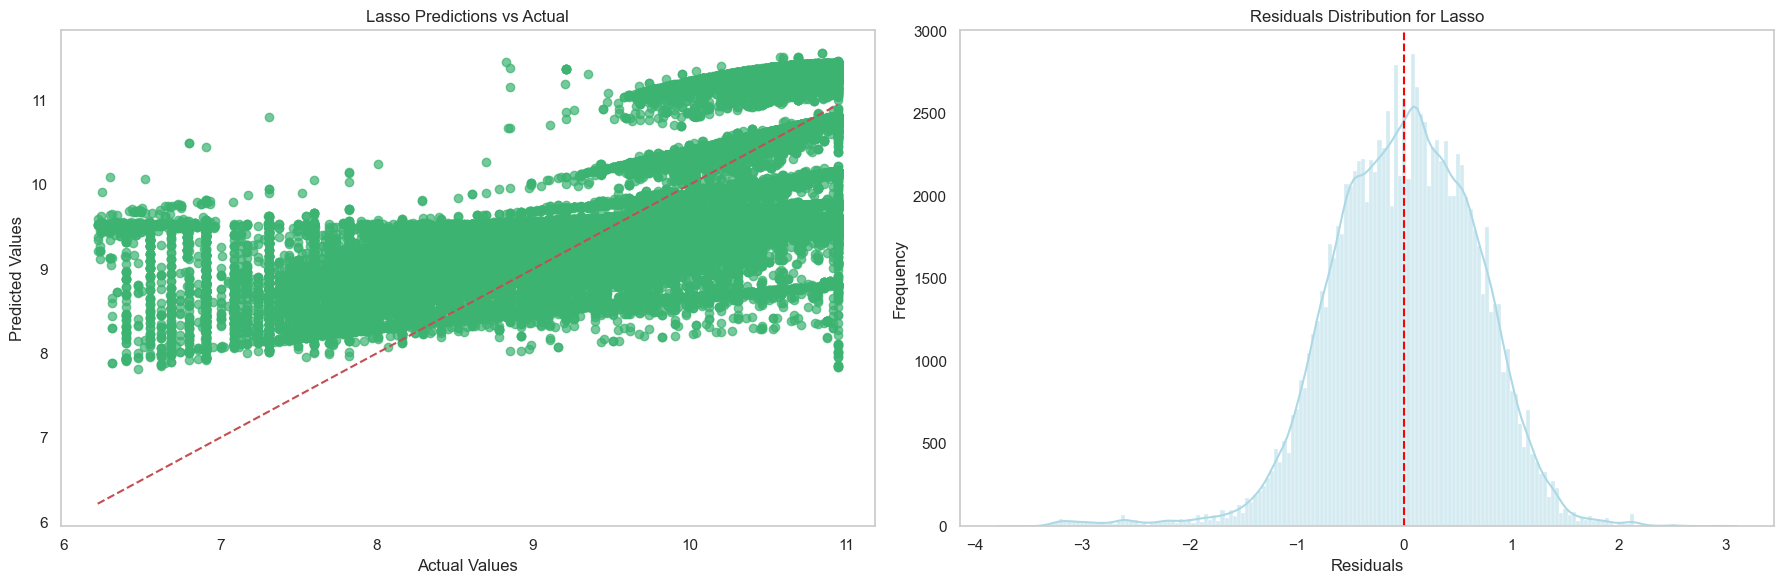

In [1891]:
# ===============================================
# Visualizations for Lasso with RFE feature selection
# ===============================================

# Create a figure for the Top Coefficients Plot
plt.figure(figsize=(10, 4))

# Top Coefficients Plot
sns.barplot(data=top_10_coefs, x='Coefficient', y='Feature', palette='viridis', hue=top_10_coefs['Coefficient'] > 0)
plt.title('Top 10 Coefficients from Lasso Regression (Sampled)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')
plt.legend(title='Positive/Negative', loc='lower right')
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the first plot
plt.show()

# Create a second subplot for predictions vs actual and residuals distribution side by side
axs2 = fig.add_subplot(212)  # Move to the second axis for predictions and residuals
fig2, axs2 = plt.subplots(1, 2, figsize=(18, 6))

# Predictions vs Actual
axs2[0].scatter(y_test, lasso_sample_test_preds, alpha=0.7, color='#3CB371')
axs2[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
axs2[0].set_title('Lasso Predictions vs Actual')
axs2[0].set_xlabel('Actual Values')
axs2[0].set_ylabel('Predicted Values')
axs2[0].grid()

# Residuals Distribution
residuals = y_test - lasso_sample_test_preds
sns.histplot(residuals, kde=True, ax=axs2[1], color='lightblue')
axs2[1].axvline(0, color='red', linestyle='--')
axs2[1].set_title('Residuals Distribution for Lasso')
axs2[1].set_xlabel('Residuals')
axs2[1].set_ylabel('Frequency')
axs2[1].grid()

plt.tight_layout()
plt.show()

In [1893]:
# =============================================================
# Model Evaluation Section for Lasso with RFE feature selection 
# =============================================================

# Calculate Mean Squared Error
lasso_rfe_train_mse = mean_squared_error(y_train_sample, lasso_sample_train_preds)
lasso_rfe_test_mse = mean_squared_error(y_test, lasso_sample_test_preds)

# Calculate RMSE
lasso_rfe_train_rmse = np.sqrt(lasso_rfe_train_mse)
lasso_rfe_test_rmse = np.sqrt(lasso_rfe_test_mse)

# Calculate Mean Absolute Error (MAE)
lasso_rfe_train_mae = mean_absolute_error(y_train_sample, lasso_sample_train_preds)
lasso_rfe_test_mae = mean_absolute_error(y_test, lasso_sample_test_preds)

# Calculate Mean Absolute Percentage Error (MAPE)
lasso_rfe_train_mape = mean_absolute_percentage_error(y_train_sample, lasso_sample_train_preds)
lasso_rfe_test_mape = mean_absolute_percentage_error(y_test, lasso_sample_test_preds)

# Calculate R² scores
lasso_rfe_train_r2 = r2_score(y_train_sample, lasso_sample_train_preds)
lasso_rfe_test_r2 = r2_score(y_test, lasso_sample_test_preds)

# Print evaluation metrics with clear formatting
print("===========================================")
print("              Model Evaluation              ")
print("      Lasso with RFE feature selection        ")
print("===========================================")
print(f"Lasso RFE Train Mean Squared Error (MSE): {lasso_rfe_train_mse:.2f}")
print(f"Lasso RFE Test Mean Squared Error (MSE): {lasso_rfe_test_mse:.2f}")
print(f"Lasso RFE Train Root Mean Squared Error (RMSE): {lasso_rfe_train_rmse:.2f}")
print(f"Lasso RFE Test Root Mean Squared Error (RMSE): {lasso_rfe_test_rmse:.2f}")
print(f"Lasso RFE Train Mean Absolute Error (MAE): {lasso_rfe_train_mae:.2f}")
print(f"Lasso RFE Test Mean Absolute Error (MAE): {lasso_rfe_test_mae:.2f}")
print(f"Lasso RFE Train Mean Absolute Percentage Error (MAPE): {lasso_rfe_train_mape:.2f}%")
print(f"Lasso RFE Test Mean Absolute Percentage Error (MAPE): {lasso_rfe_test_mape:.2f}%")
print(f"Lasso RFE Train R²: {lasso_rfe_train_r2:.2f}")
print(f"Lasso RFE Test R²: {lasso_rfe_test_r2:.2f}")
print("===========================================")

              Model Evaluation              
      Lasso with RFE feature selection        
Lasso RFE Train Mean Squared Error (MSE): 0.46
Lasso RFE Test Mean Squared Error (MSE): 0.46
Lasso RFE Train Root Mean Squared Error (RMSE): 0.68
Lasso RFE Test Root Mean Squared Error (RMSE): 0.68
Lasso RFE Train Mean Absolute Error (MAE): 0.53
Lasso RFE Test Mean Absolute Error (MAE): 0.53
Lasso RFE Train Mean Absolute Percentage Error (MAPE): 0.06%
Lasso RFE Test Mean Absolute Percentage Error (MAPE): 0.06%
Lasso RFE Train R²: 0.39
Lasso RFE Test R²: 0.39


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**After doing the following analysis, I will have the evaluation summary down below.**

In [1895]:
# Create a dictionary to store all evaluation metrics
evaluation_metrics = {
    "Model": [
        "Linear Regression", "Polynomial Regression", 
        "Sequential Feature Selector", "Lasso as SFS", 
        "Ridge Regression", "Lasso Regression", 
        "Lasso with RFE"
    ],
    "Train MSE": [
        linreg_train_mse, poly_train_mse, 
        selector_train_mse, las_sfs_train_mse, 
        ridge_train_mse, lasso_train_mse, 
        lasso_rfe_train_mse
    ],
    "Test MSE": [
        linreg_test_mse, poly_test_mse, 
        selector_test_mse, las_sfs_test_mse, 
        ridge_test_mse, lasso_test_mse, 
        lasso_rfe_test_mse
    ],
    "Train RMSE": [
        linreg_train_rmse, poly_train_rmse, 
        selector_train_rmse, las_sfs_train_rmse, 
        ridge_train_rmse, lasso_train_rmse, 
        lasso_rfe_train_rmse
    ],
    "Test RMSE": [
        linreg_test_rmse, poly_test_rmse, 
        selector_test_rmse, las_sfs_test_rmse, 
        ridge_test_rmse, lasso_test_rmse, 
        lasso_rfe_test_rmse
    ],
    "Train MAE": [
        linreg_train_mae, poly_train_mae, 
        selector_train_mae, las_sfs_train_mae, 
        ridge_train_mae, lasso_train_mae, 
        lasso_rfe_train_mae
    ],
    "Test MAE": [
        linreg_test_mae, poly_test_mae, 
        selector_test_mae, las_sfs_test_mae, 
        ridge_test_mae, lasso_test_mae, 
        lasso_rfe_test_mae
    ],
    "Train MAPE (%)": [
        linreg_train_mape, poly_train_mape, 
        selector_train_mape, las_sfs_train_mape, 
        ridge_train_mape, lasso_train_mape, 
        lasso_rfe_train_mape
    ],
    "Test MAPE (%)": [
        linreg_test_mape, poly_test_mape, 
        selector_test_mape, las_sfs_test_mape, 
        ridge_test_mape, lasso_test_mape, 
        lasso_rfe_test_mape
    ],
    "Train R²": [
        linreg_train_r2, poly_train_r2, 
        sfs_train_r2, las_sfs_train_r2, 
        ridge_train_r2, lasso_train_r2, 
        lasso_rfe_train_r2
    ],
    "Test R²": [
        linreg_test_r2, poly_test_r2, 
        sfs_test_r2, las_sfs_test_r2, 
        ridge_test_r2, lasso_test_r2, 
        lasso_rfe_test_r2
    ]
}

# Create the DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
evaluation_df

Model  Train MSE  Test MSE  Train RMSE  Test RMSE  \
0            Linear Regression    0.29493   0.29607     0.54307    0.54413   
1        Polynomial Regression    0.20281   0.20318     0.45034    0.45075   
2  Sequential Feature Selector    0.11254   0.11360     0.33547    0.33705   
3                 Lasso as SFS    0.26194   0.26583     0.51180    0.51558   
4             Ridge Regression    0.20281   0.20314     0.45034    0.45071   
5             Lasso Regression    0.21732   0.22131     0.46618    0.47044   
6               Lasso with RFE    0.46377   0.46155     0.68101    0.67938   

   Train MAE  Test MAE  Train MAPE (%)  Test MAPE (%)  Train R²  Test R²  
0    0.38666   0.38646         0.04255        0.04251   0.61049  0.60869  
1    0.28932   0.28915         0.03201        0.03199   0.73215  0.73146  
2    0.25793   0.25571         0.02676        0.02628   0.64668  0.66205  
3    0.35408   0.35553         0.03878        0.03892   0.65389  0.64866  
4    0.28932   0.28915         0.03201        0.03199   0.73215  0.73151  
5    0.30554   0.30587         0.03386        0.03388   0.71284  0.70750  
6    0.53291   0.53357         0.05771        0.05779   0.38578  0.38997

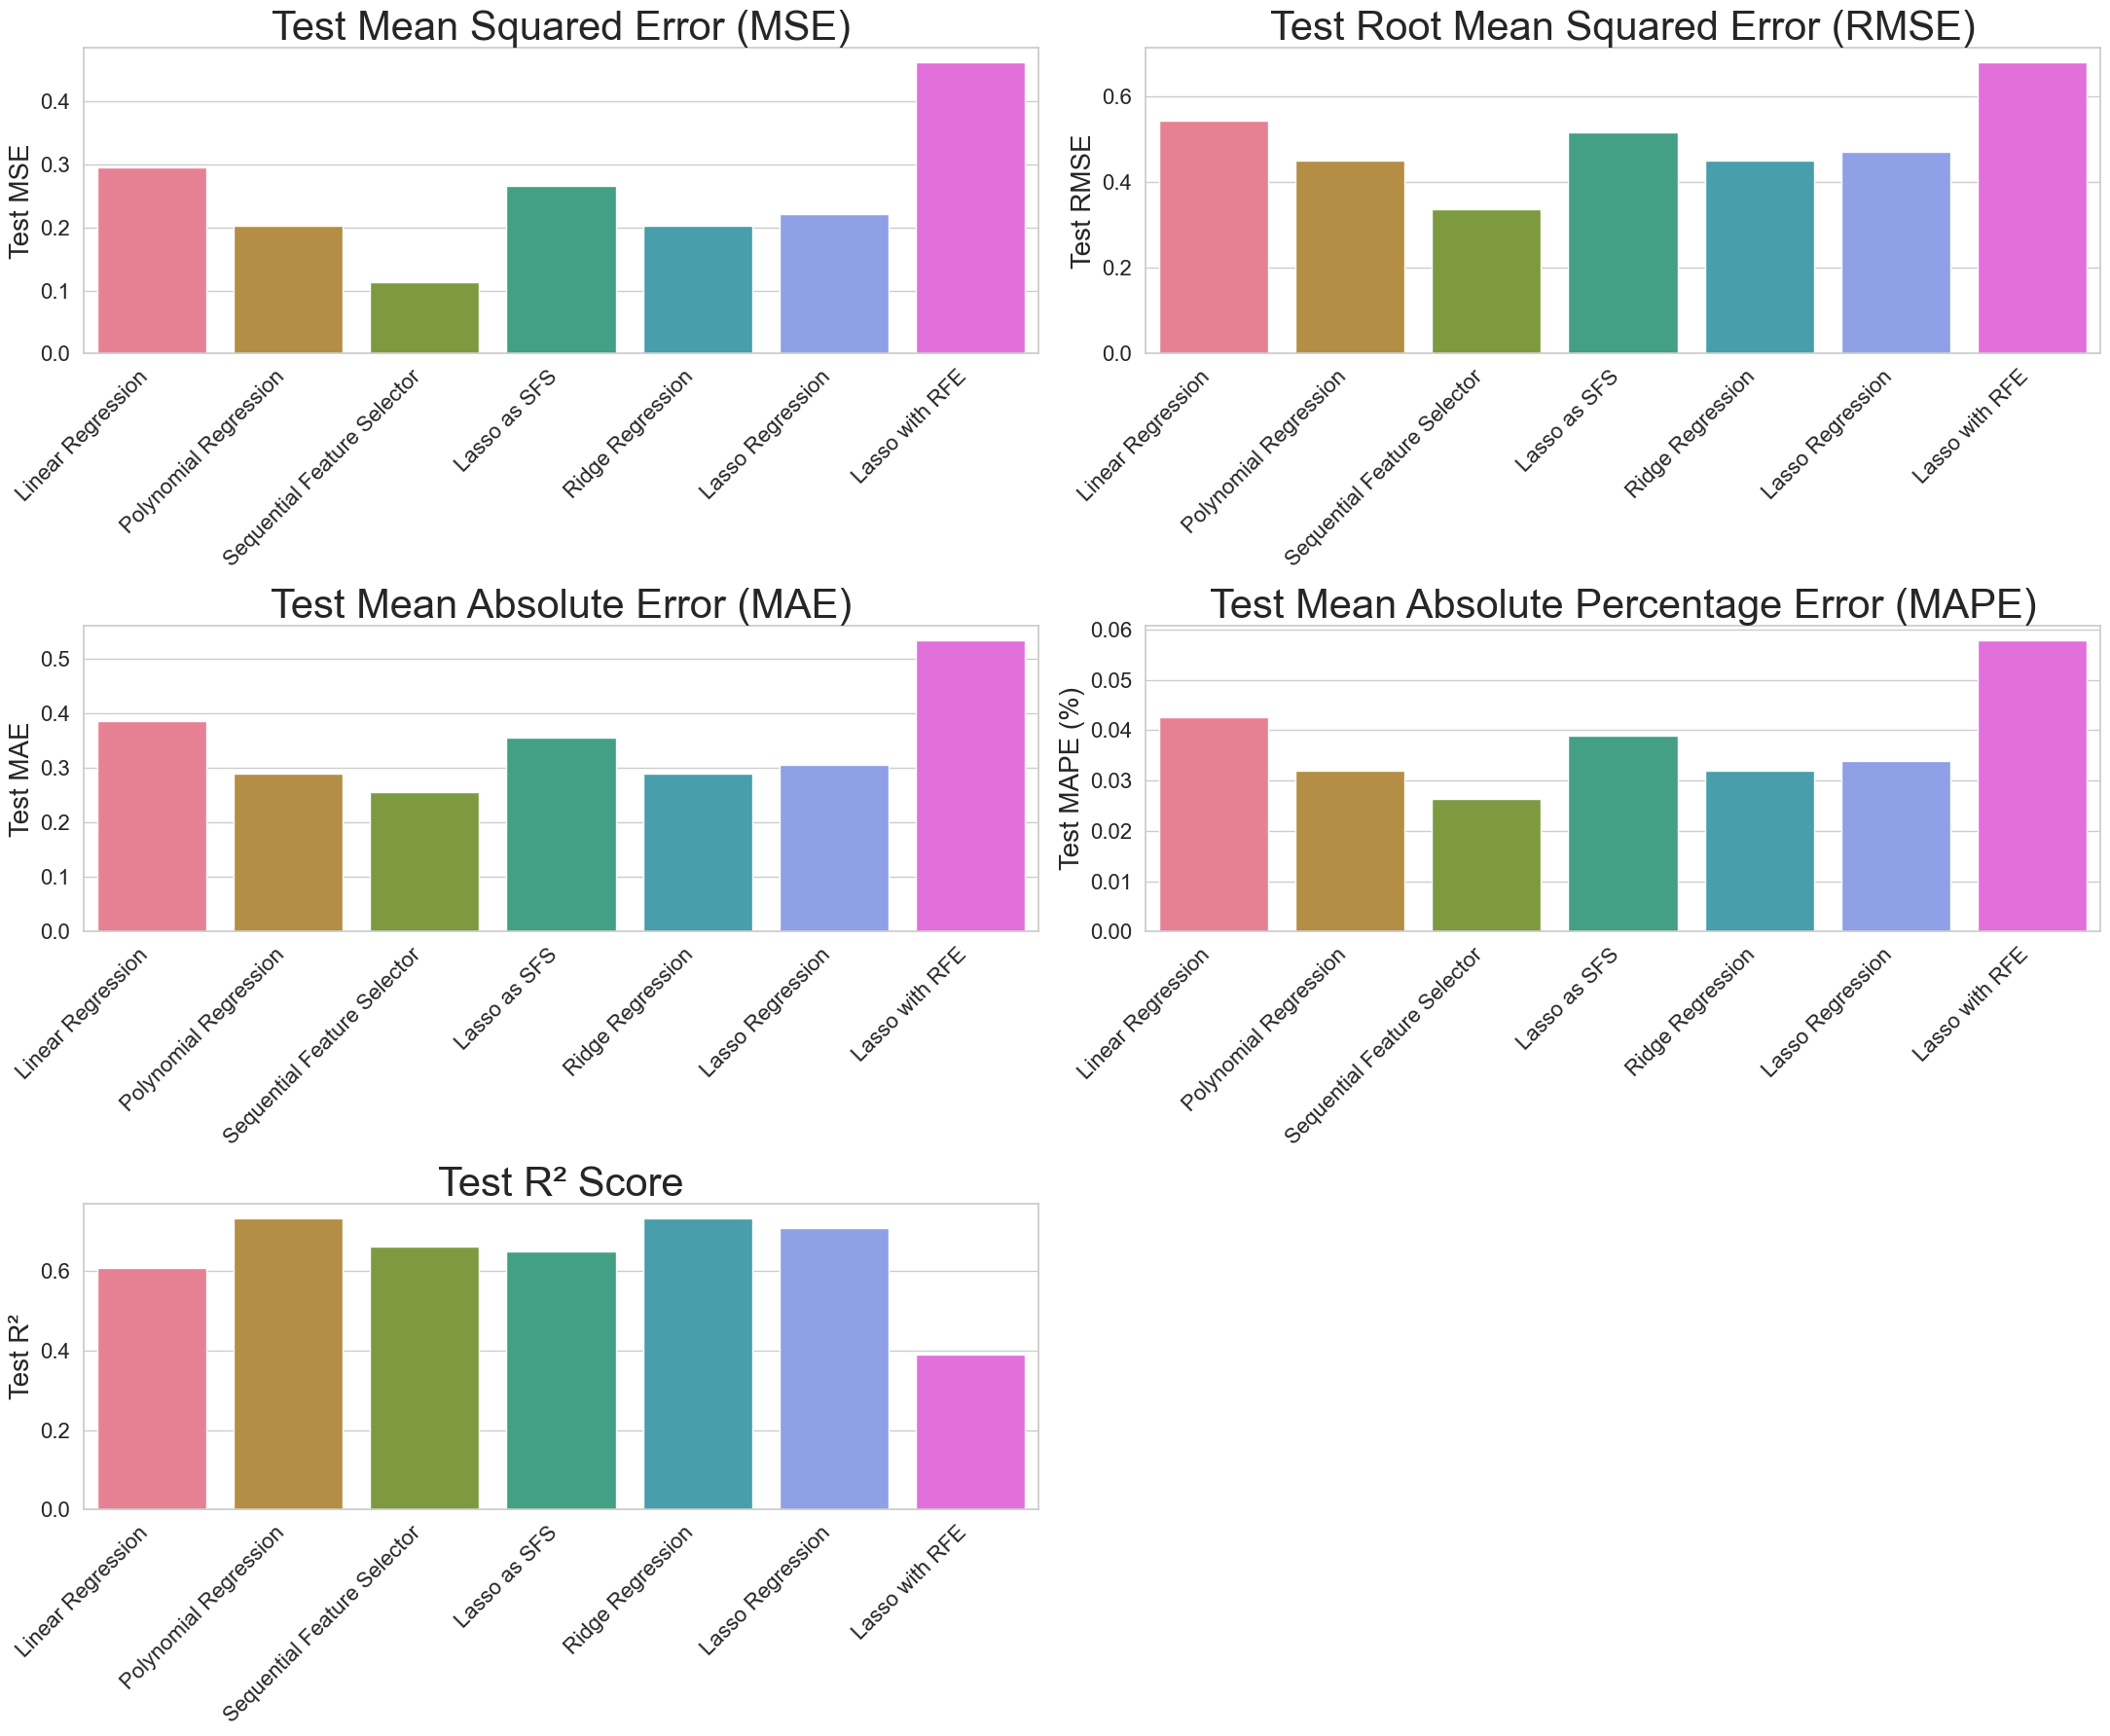

In [1897]:
# Define a larger palette for your models
colors = sns.color_palette("husl", n_colors=len(reset_evaluation_df['Model']))

# Create a grid of subplots (3 rows, 2 columns) with larger figsize
fig, axes = plt.subplots(3, 2, figsize=(22, 18))  # Increased the size

# Reset index for plotting
reset_evaluation_df = evaluation_df.reset_index()

# Function to plot with title and labels
def plot_with_title(ax, y_col, title):
    sns.barplot(x='Model', y=y_col, data=reset_evaluation_df, ax=ax, hue='Model', palette=colors, dodge=False)
    ax.set_title(title, fontsize=30)  # Set title font size here
    ax.set_xlabel('', fontsize=44)  # Set x label font size
    
    # Set tick parameters
    ax.tick_params(axis='x', rotation=45, labelsize=16)  # Rotate x labels and set size
    ax.tick_params(axis='y', labelsize=16)  # Set y tick size

    # Align x-ticks with the bars
    ax.set_xticks(range(len(reset_evaluation_df['Model'])))
    ax.set_xticklabels(reset_evaluation_df['Model'], rotation=45, ha='right')  # Ensure proper alignment

    # Set y-label with increased font size
    ax.set_ylabel(y_col, fontsize=20)  # Set y label font size here

# Plot Mean Squared Error (MSE)
plot_with_title(axes[0, 0], 'Test MSE', 'Test Mean Squared Error (MSE)')

# Plot Root Mean Squared Error (RMSE)
plot_with_title(axes[0, 1], 'Test RMSE', 'Test Root Mean Squared Error (RMSE)')

# Plot Mean Absolute Error (MAE)
plot_with_title(axes[1, 0], 'Test MAE', 'Test Mean Absolute Error (MAE)')

# Plot Mean Absolute Percentage Error (MAPE)
plot_with_title(axes[1, 1], 'Test MAPE (%)', 'Test Mean Absolute Percentage Error (MAPE)')

# Plot R² Score
plot_with_title(axes[2, 0], 'Test R²', 'Test R² Score')

# Remove the last empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout with ample space between rows
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjusted for more vertical space
plt.tight_layout()
plt.show()

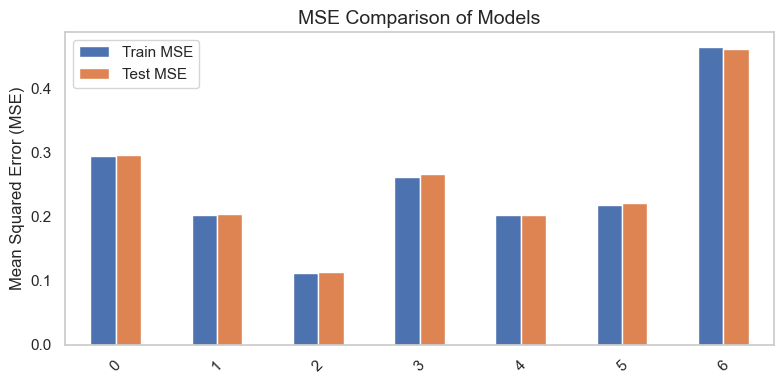

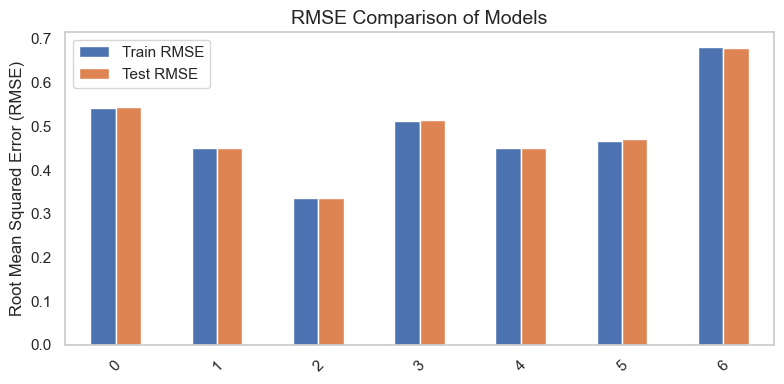

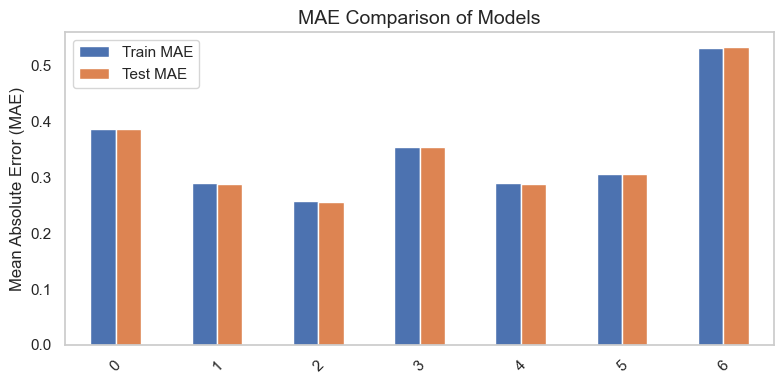

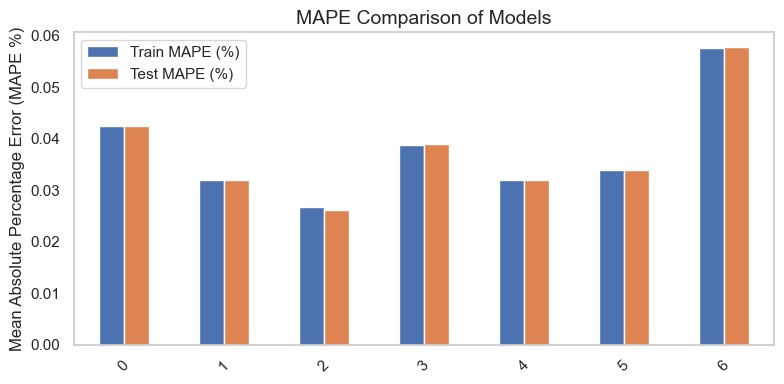

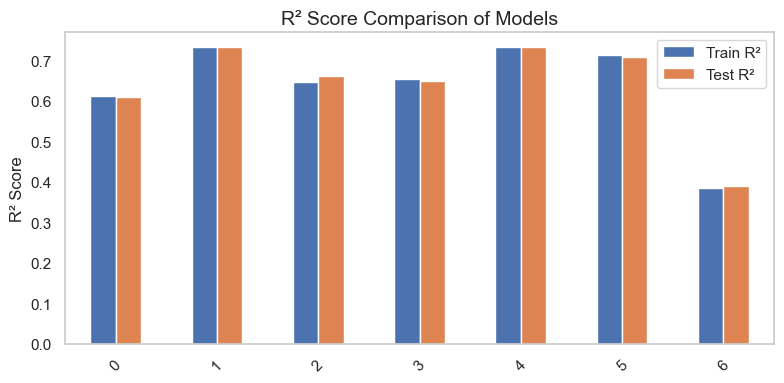

In [1901]:
# Plotting function
def plot_metric(metrics, ylabel, title):
    metrics.plot(kind='bar', figsize=(8, 4))
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.xlabel('')  # Set x label font size
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plotting MSE
plot_metric(evaluation_df[['Train MSE', 'Test MSE']], 'Mean Squared Error (MSE)', 'MSE Comparison of Models')

# Plotting RMSE
plot_metric(evaluation_df[['Train RMSE', 'Test RMSE']], 'Root Mean Squared Error (RMSE)', 'RMSE Comparison of Models')

# Plotting MAE
plot_metric(evaluation_df[['Train MAE', 'Test MAE']], 'Mean Absolute Error (MAE)', 'MAE Comparison of Models')

# Plotting MAPE
plot_metric(evaluation_df[['Train MAPE (%)', 'Test MAPE (%)']], 'Mean Absolute Percentage Error (MAPE %)', 'MAPE Comparison of Models')

# Plotting R² Scores
plot_metric(evaluation_df[['Train R²', 'Test R²']], 'R² Score', 'R² Score Comparison of Models')

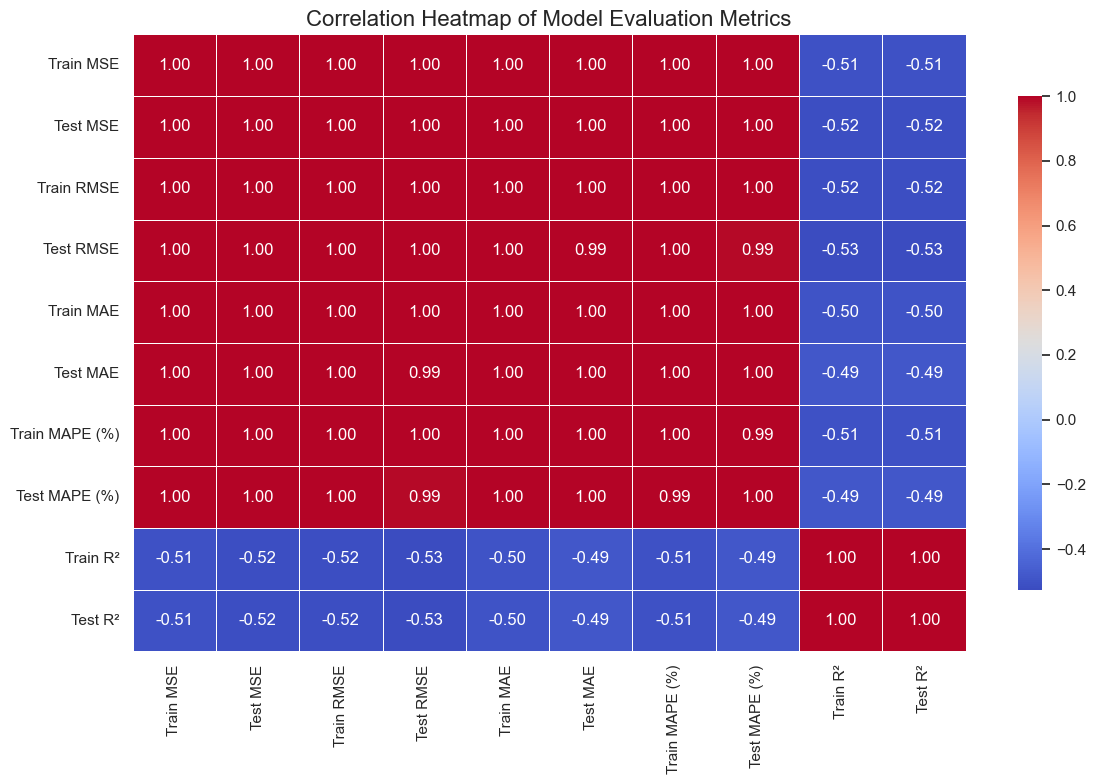

"For a good model, generally we want to see a negative correlation between R² and error metrics (like RMSE or MAE). \n   Negative Correlation: This indicates that as the model's R² increases (showing better performance), the \n   error metrics decrease."

In [1903]:
# Correlation Heatmap of Model Evaluation Metrics

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(models_evaluation_df.corr(), 
             annot=True, 
             cmap='coolwarm', 
             fmt=".2f", 
             linewidths=.5, 
             cbar_kws={"shrink": 0.8})  # Adjust colorbar size

# Title for the heatmap
plt.title('Correlation Heatmap of Model Evaluation Metrics', fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the title
plt.show()
'''For a good model, generally we want to see a negative correlation between R² and error metrics (like RMSE or MAE). 
   Negative Correlation: This indicates that as the model's R² increases (showing better performance), the 
   error metrics decrease.'''

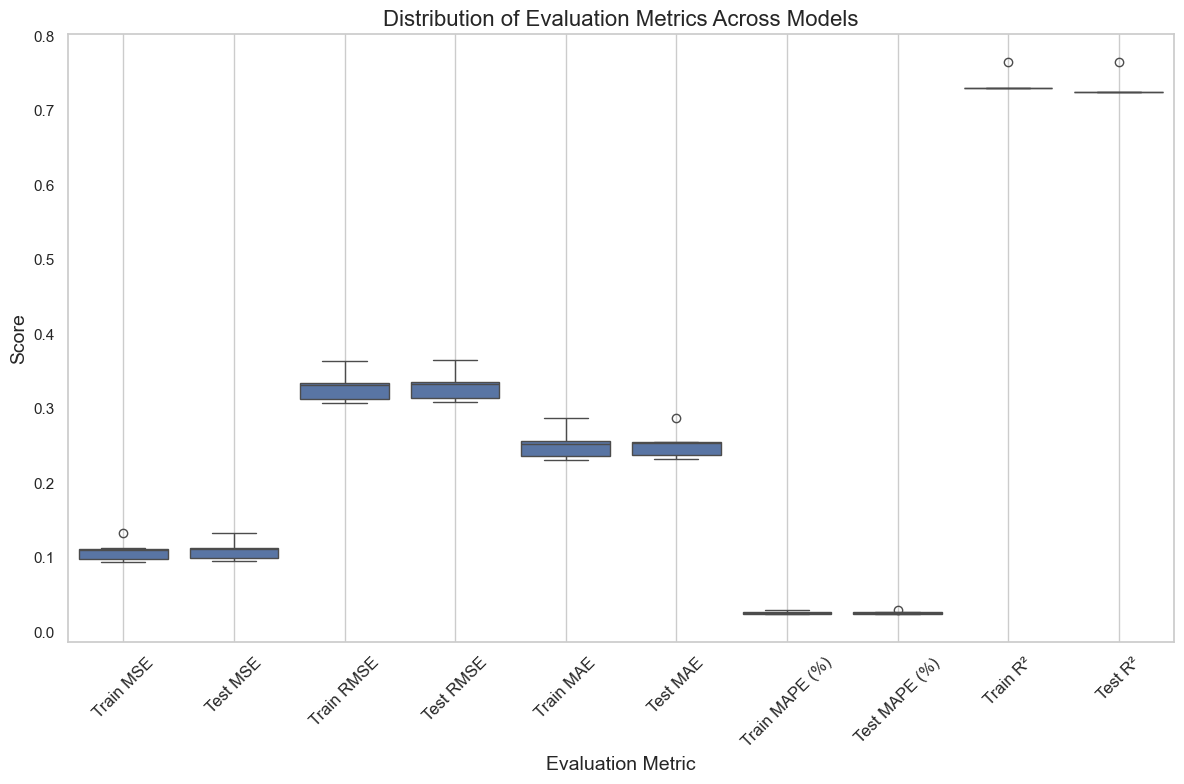

'General Interpretation:\nBox Position: The position of the boxes relative to the y-axis indicates how well the models perform \noverall.\nSpread: Wider boxes and longer whiskers show more variability in performance, while narrower boxes \nindicate consistent performance across models.\nOutliers: Points outside the whiskers may suggest models that performed exceptionally well or poorly \nWhat will be the best?compared to others.'

In [1905]:
# Distribution of Evaluation Metrics Across Models

# Melt the DataFrame for easier plotting
melted_df = models_evaluation_df.reset_index().melt(id_vars='Model')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='variable', y='value', data=melted_df)

# Title and labels
plt.title('Distribution of Evaluation Metrics Across Models', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)

# Show grid
plt.grid()

# Adjust layout to make room for the title and labels
plt.tight_layout()

# Show the plot
plt.show()
'''General Interpretation:
Box Position: The position of the boxes relative to the y-axis indicates how well the models perform 
overall.
Spread: Wider boxes and longer whiskers show more variability in performance, while narrower boxes 
indicate consistent performance across models.
Outliers: Points outside the whiskers may suggest models that performed exceptionally well or poorly 
What will be the best?compared to others.'''

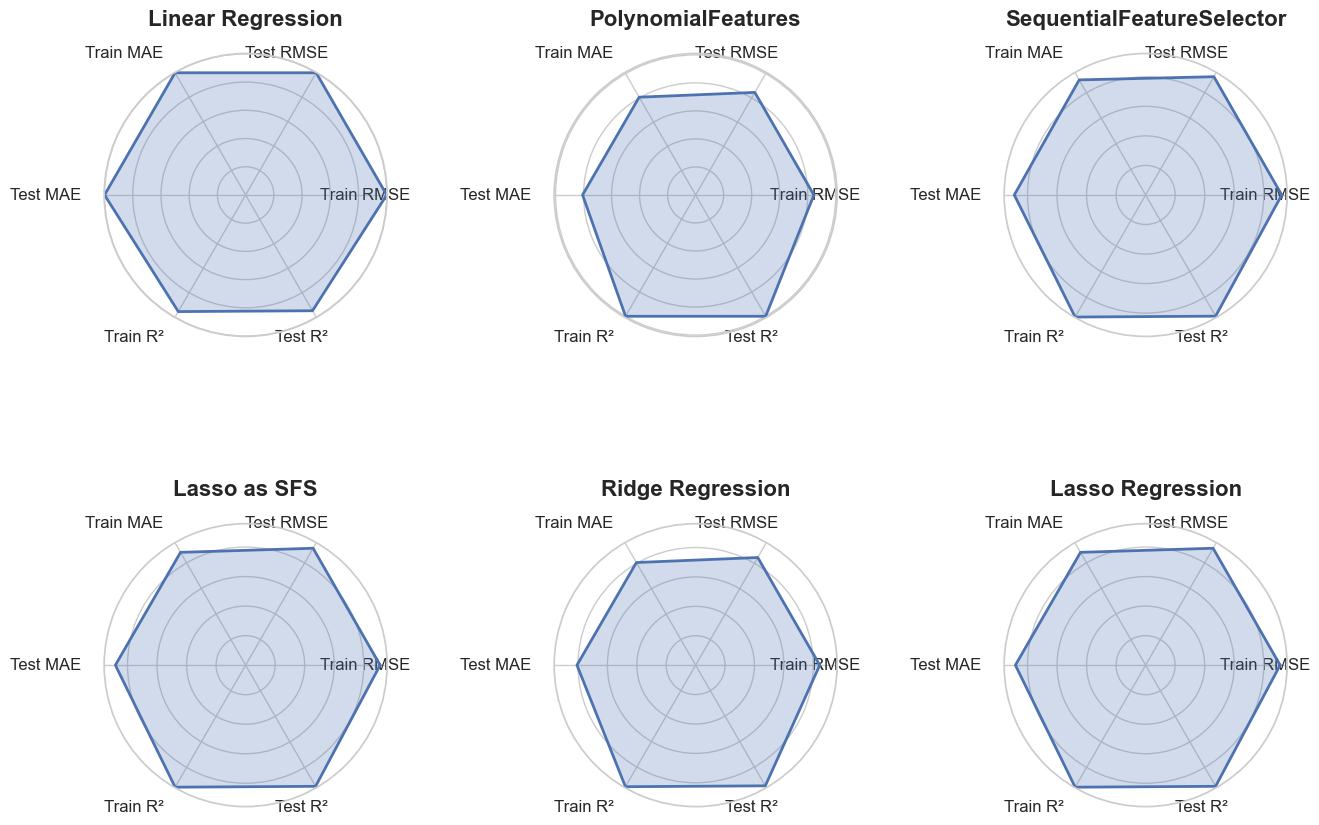

"In a radar chart: The outer points indicate better performance for that specific metric.\n   If a model's line reaches closer to the outer edge, it means it performed better on that metric \n   compared to models with lines that are closer to the center.models that extend further out toward \n   the edges generally indicate better predictive accuracy or lower error for those specific metrics. \n   The models that are consistently closer to the outer edges, those would be considered better \n   performers overall."

In [1907]:
# Select key metrics for radar chart visualization
metrics_to_plot = ['Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train R²', 'Test R²']
models_subset = models_evaluation_df[metrics_to_plot]

# Normalize values for radar chart
normalized_values = models_subset / models_subset.max()

# Prepare data for radar chart
labels = normalized_values.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

plt.figure(figsize=(14, 10))  # Increased size for better visibility

# Create a radar chart for each model
for index, (model_name, row) in enumerate(normalized_values.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  # Close the circle
    current_angles = angles + [angles[0]]  # Close the angle circle

    ax = plt.subplot(2, 3, index + 1, polar=True)
    ax.fill(current_angles, values, alpha=0.25)
    ax.plot(current_angles, values, linewidth=2, label=model_name)

    # Improve label positioning
    ax.set_yticklabels([])
    ax.set_xticks(current_angles[:-1])
    ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=12)  # Adjusted rotation and size
    ax.set_title(model_name, fontsize=16, weight='bold', pad=20)  # Increased title font size and added padding

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)  # Increase padding between plots
plt.show()
'''In a radar chart: The outer points indicate better performance for that specific metric.
   If a model's line reaches closer to the outer edge, it means it performed better on that metric 
   compared to models with lines that are closer to the center.models that extend further out toward 
   the edges generally indicate better predictive accuracy or lower error for those specific metrics. 
   The models that are consistently closer to the outer edges, those would be considered better 
   performers overall.'''

In [ ]:
'''**************************************************************************************************************************'''

<span style="font-size:20px;">Section 5: Evaluation</span>

In evaluating my modeling efforts, Linear Regression appeared effective in visualizations but demonstrated less robustness in certain metrics compared to **Polynomial Regression** and **Lasso Regression**. I have identified the **Polynomial Regression** model as the highest quality model based on its balanced performance metrics, including low Test Mean Squared Error (MSE) of **0.20318** and a strong R² value of **0.73146**. This model effectively captures the relationship between various features and used car prices, providing robust predictions.

Through my analysis, I learned that several factors significantly influence used car prices:

1. **Manufacturer Impact**: Certain brands, like Ford and Chevrolet, dominate the market with differing average prices, indicating consumer preferences tied to brand reputation and perceived value.

2. **Fuel Type Hierarchy**: Diesel vehicles are the most expensive on average, suggesting that consumers value efficiency and performance. Electric and hybrid vehicles also hold higher average prices, reflecting a shift towards environmentally friendly options.

3. **Mileage and Year**: There is a clear trend where newer vehicles (younger model years) generally command higher prices, while higher mileage negatively impacts price. This suggests that consumers prioritize the age and condition of the vehicle when making purchasing decisions.

4. **Color Preferences**: Paint color plays a role in pricing, with black vehicles commanding higher prices compared to other colors. This indicates potential marketing opportunities.

5. **Regional Pricing Variance**: State-level differences in average prices highlight the importance of regional strategies for inventory and pricing.

6. **Feature Significance**:
   - **Numerical Columns**: The numerical features "year" and "odometer" are significant influencers of price.
   - **Ordinal Columns**: "Condition," "title_status," and "cylinders" have a moderate effect on pricing.
   - **Nominal Features**: "Manufacturer" and "type" are major determinants, while "fuel," "drive," and "paint color" have a lesser impact.
   - **Uncertain Influences**: The effects of "VIN" and "model" on pricing remain unclear and may warrant further exploration.

Upon reflection, these insights confirm that my initial business objectives align with my findings. However, I could revisit the feature selection process to ensure that I incorporate additional variables that may enhance model performance or capture emerging trends in the used car market. Additionally, visualizing model performance and error metrics has underscored the need for continuous evaluation and refinement of the models used.



In [ ]:
'''**************************************************************************************************************************'''

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
'''*************************************************************************************************************************'''

<span style="font-size:20px;">Section 6: Deployment</span>

Now that I have settled on our models and findings, I will present the following report to my client, a used car dealership, detailing my primary insights:

**Key Findings**
* **Model Performance:** **Polynomial Regression** is the preferred model for predicting used car prices, demonstrating consistent accuracy with a Test Mean Squared Error (MSE) of **0.20318** and a strong R² value of **0.73146**. This model effectively captures the relationship between features and used car prices.
* **Price Drivers:**
    * **Manufacturer:** Price is significantly affected by the manufacturer, with brands like Ford, Chevrolet, and Toyota representing large inventories (Ford 20.37%, Chevrolet 12.84%, Toyota 8.14%) but varying average prices.
    * **Fuel Type:** Diesel vehicles are the most expensive (32,136 dollars), followed by electric (25,736 dollars), gas (16,873 dollars), and hybrid (15,389 dollars) vehicles, reflecting consumer preferences for efficiency.
    * **Mileage and Year:** Newer vehicles with lower mileage tend to have higher prices, indicating strong consumer preferences for recent models with lower wear and tear.
    * **Color:** Black cars have the highest average price (21,288 dollars), followed by white (19,398 dollars) and red, indicating consumer color preferences. This is clearly shown by a large market share of white vehicles (47.38%), followed by black vehicles (15.03%) and silver (10.47%). This suggests a potential strategy to promote vehicles in these colors.

* **Drive Type Influence:**
    * Four-wheel-drive vehicles are generally more expensive (20,891 dollars) than rear-wheel-drive (20,228 dollars) and front-wheel-drive (12,456 dollars). Highlighting all-wheel-drive capabilities in marketing could attract higher bids.
    
* **State Influence:**
    * **Cheapest States:** Connecticut (14,999 dollars), New Jersey (15,360 dollars), Michigan (15,702 dollars), Washington D.C. (15,789 dollars), and Ohio (15,872 dollars).
    * **Most Expensive States:** Alaska (23,381 dollars), Utah (23,553 dollars), Montana (23,890 dollars), West Virginia (24,349 dollars), and Washington (24,472 dollars).

**Recommendations**
1. **Inventory Optimization:** Focus on increasing the stock of high-demand manufacturers, particularly diesel and white and black vehicles, to meet consumer preferences. Additionally, prioritize acquiring newer models that have lower mileage and are in good to excellent condition, rather than those categorized as like new or new. The average prices for these four condition categories are relatively similar, allowing you to maximize your profit margin by focusing on vehicles in good to excellent condition.
2. **Pricing Strategy:** Develop a pricing strategy based on average prices and inventory levels, especially for vehicles that yield higher margins.
3. **Regional Adjustments:** Tailor marketing and pricing strategies to reflect the average price differences across states, ensuring competitive positioning in cheaper markets.

By implementing these recommendations, the dealership can enhance profitability and align their inventory with consumer expectations, ultimately leading to increased sales and customer satisfaction.


In [ ]:
'''**************************************************************************************************************************'''